## Importing the useful libraries

In [62]:
import warnings; 
warnings.simplefilter('ignore')

from sklearn import preprocessing
from sklearn.feature_extraction.text import CountVectorizer, TfidfVectorizer
from sklearn.model_selection import train_test_split, KFold
import seaborn as sns
import matplotlib
from matplotlib import pyplot as plt
import seaborn as sns
%matplotlib inline
%config InlineBackend.figure_format = 'retina'
import numpy as np # linear algebra
import pandas as pd
from collections import Counter
import time

### Data exporation

In [63]:
df_review = pd.read_csv("employee_reviews.csv", sep=',', error_bad_lines=False)
df_review.drop('Unnamed: 0',axis=1,inplace= True)
df_review.head(5)

company           location          dates  \
0  google               none   Dec 11, 2018   
1  google  Mountain View, CA   Jun 21, 2013   
2  google       New York, NY   May 10, 2014   
3  google  Mountain View, CA    Feb 8, 2015   
4  google    Los Angeles, CA   Jul 19, 2018   

                                  job-title  \
0     Current Employee - Anonymous Employee   
1         Former Employee - Program Manager   
2  Current Employee - Software Engineer III   
3     Current Employee - Anonymous Employee   
4       Former Employee - Software Engineer   

                                             summary  \
0                           Best Company to work for   
1  Moving at the speed of light, burn out is inev...   
2  Great balance between big-company security and...   
3  The best place I've worked and also the most d...   
4                    Unique, one of a kind dream job   

                                                pros  \
0                      People are smart and friendly   
1  1) Food, food, food. 15+ cafes on main campus ...   
2  * If you're a software engineer, you're among ...   
3  You can't find a more well-regarded company th...   
4  Google is a world of its own. At every other c...   

                                                cons  \
0                 Bureaucracy is slowing things down   
1  1) Work/life balance. What balance? All those ...   
2  * It *is* becoming larger, and with it comes g...   
3  I live in SF so the commute can take between 1...   
4  If you don't work in MTV (HQ), you will be giv...   

                                      advice-to-mgmt  overall-ratings  \
0                                               none              5.0   
1  1) Don't dismiss emotional intelligence and ad...              4.0   
2  Keep the focus on the user. Everything else wi...              5.0   
3  Keep on NOT micromanaging - that is a huge ben...              5.0   
4  Promote managers into management for their man...              5.0   

  work-balance-stars culture-values-stars carrer-opportunities-stars  \
0                4.0                  5.0                        5.0   
1                2.0                  3.0                        3.0   
2                5.0                  4.0                        5.0   
3                2.0                  5.0                        5.0   
4                5.0                  5.0                        5.0   

  comp-benefit-stars senior-mangemnet-stars  helpful-count  \
0                4.0                    5.0              0   
1                5.0                    3.0           2094   
2                5.0                    4.0            949   
3                4.0                    5.0            498   
4                5.0                    5.0             49   

                                                link  
0  https://www.glassdoor.com/Reviews/Google-Revie...  
1  https://www.glassdoor.com/Reviews/Google-Revie...  
2  https://www.glassdoor.com/Reviews/Google-Revie...  
3  https://www.glassdoor.com/Reviews/Google-Revie...  
4  https://www.glassdoor.com/Reviews/Google-Revie...

In [64]:
df_review.isnull().sum()

company                         0
location                        0
dates                           0
job-title                       0
summary                       120
pros                            0
cons                            0
advice-to-mgmt                297
overall-ratings                 0
work-balance-stars              0
culture-values-stars            0
carrer-opportunities-stars      0
comp-benefit-stars              0
senior-mangemnet-stars          0
helpful-count                   0
link                            0
dtype: int64

In [65]:
df_review.replace(to_replace = 'none', value = np.nan, inplace = True)

In [5]:
#df_review.replace(to_replace = 'None', value = np.nan, inplace = True)

In [66]:
df_review=df_review.rename(index=str, columns={"job-title":"job_title","advice-to-mgmt": "advice_to_mgmt", "overall-ratings": "overall_ratings","work-balance-stars":"work_balance_stars","culture-values-stars":"culture_values_stars","carrer-opportunities-stars":"carrer_opportunities_stars","comp-benefit-stars":"comp_benefit_stars","senior-mangemnet-stars":"senior_mangemnet_stars","helpful-count":"helpful_count"})

In [67]:
df_review.rename(columns = {'dates':'date'}, inplace = True)

In [68]:
df_copy = df_review.copy()

In [69]:
df=df_copy

In [70]:
#df.dropna(subset=['location'],inplace=True)  # col_list is a list of column names to consider for nan values.

In [71]:
#df.dropna(subset=['date'],inplace=True) 

In [72]:
df.head(1)

company location           date                              job_title  \
0  google      NaN   Dec 11, 2018  Current Employee - Anonymous Employee   

                    summary                           pros  \
0  Best Company to work for  People are smart and friendly   

                                 cons advice_to_mgmt  overall_ratings  \
0  Bureaucracy is slowing things down            NaN              5.0   

  work_balance_stars culture_values_stars carrer_opportunities_stars  \
0                4.0                  5.0                        5.0   

  comp_benefit_stars senior_mangemnet_stars  helpful_count  \
0                4.0                    5.0              0   

                                                link  
0  https://www.glassdoor.com/Reviews/Google-Revie...

In [73]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 67529 entries, 0 to 67528
Data columns (total 16 columns):
company                       67529 non-null object
location                      42444 non-null object
date                          67529 non-null object
job_title                     67529 non-null object
summary                       67400 non-null object
pros                          67529 non-null object
cons                          67528 non-null object
advice_to_mgmt                38068 non-null object
overall_ratings               67529 non-null float64
work_balance_stars            60369 non-null object
culture_values_stars          53983 non-null object
carrer_opportunities_stars    60421 non-null object
comp_benefit_stars            60368 non-null object
senior_mangemnet_stars        59754 non-null object
helpful_count                 67529 non-null int64
link                          67529 non-null object
dtypes: float64(1), int64(1), object(14)
memory usage: 8.8+ MB


In [74]:
df.isnull().sum()

company                           0
location                      25085
date                              0
job_title                         0
summary                         129
pros                              0
cons                              1
advice_to_mgmt                29461
overall_ratings                   0
work_balance_stars             7160
culture_values_stars          13546
carrer_opportunities_stars     7108
comp_benefit_stars             7161
senior_mangemnet_stars         7775
helpful_count                     0
link                              0
dtype: int64

In [75]:
df

company           location           date  \
0         google                NaN   Dec 11, 2018   
1         google  Mountain View, CA   Jun 21, 2013   
2         google       New York, NY   May 10, 2014   
3         google  Mountain View, CA    Feb 8, 2015   
4         google    Los Angeles, CA   Jul 19, 2018   
5         google  Mountain View, CA    Dec 9, 2018   
6         google       New York, NY   Dec 11, 2018   
7         google                NaN   Dec 11, 2018   
8         google       New York, NY   Dec 10, 2018   
9         google                NaN    Dec 9, 2018   
10        google  Mountain View, CA    Dec 8, 2018   
11        google                NaN    Dec 8, 2018   
12        google                NaN    Dec 4, 2018   
13        google  San Francisco, CA    Dec 3, 2018   
14        google                NaN    Dec 6, 2018   
15        google                NaN    Dec 6, 2018   
16        google                NaN   Nov 29, 2018   
17        google                NaN    Dec 2, 2018   
18        google                NaN    Dec 1, 2018   
19        google                NaN    Dec 3, 2018   
20        google       New York, NY   Nov 26, 2018   
21        google                NaN    Dec 2, 2018   
22        google                NaN    Dec 1, 2018   
23        google                NaN   Nov 30, 2018   
24        google    Los Angeles, CA   Nov 29, 2018   
25        google                NaN   Nov 29, 2018   
26        google                NaN   Nov 28, 2018   
27        google  San Francisco, CA   Nov 17, 2018   
28        google                NaN   Nov 27, 2018   
29        google                NaN   Nov 20, 2018   
...          ...                ...            ...   
67499  microsoft                NaN   Jan 13, 2011   
67500  microsoft                NaN   Jan 11, 2011   
67501  microsoft  Hyderabad (India)   Dec 26, 2010   
67502  microsoft                NaN    Jan 9, 2011   
67503  microsoft                NaN    Jan 7, 2011   
67504  microsoft  Hyderabad (India)    Jan 6, 2011   
67505  microsoft                NaN    Jan 6, 2011   
67506  microsoft                NaN    Jan 4, 2011   
67507  microsoft  Hyderabad (India)    Jan 3, 2011   
67508  microsoft                NaN    Jan 4, 2011   
67509  microsoft                NaN    Jan 4, 2011   
67510  microsoft  Hyderabad (India)    Jan 4, 2011   
67511  microsoft  Bengaluru (India)    Jan 1, 2011   
67512  microsoft                NaN    Jan 2, 2011   
67513  microsoft      Tokyo (Japan)    Jan 2, 2011   
67514  microsoft                NaN    Jan 3, 2011   
67515  microsoft                NaN   Dec 29, 2010   
67516  microsoft                NaN   Dec 31, 2010   
67517  microsoft                NaN   Dec 30, 2010   
67518  microsoft                NaN   Dec 29, 2010   
67519  microsoft  Hyderabad (India)   Dec 13, 2010   
67520  microsoft                NaN   Dec 20, 2010   
67521  microsoft                NaN   Dec 22, 2010   
67522  microsoft                NaN   Dec 18, 2010   
67523  microsoft                NaN   Dec 17, 2010   
67524  microsoft                NaN   Dec 16, 2010   
67525  microsoft                NaN   Dec 16, 2010   
67526  microsoft                NaN   Dec 15, 2010   
67527  microsoft                NaN   Dec 15, 2010   
67528  microsoft                NaN   Dec 14, 2010   

                                               job_title  \
0                  Current Employee - Anonymous Employee   
1                      Former Employee - Program Manager   
2               Current Employee - Software Engineer III   
3                  Current Employee - Anonymous Employee   
4                    Former Employee - Software Engineer   
5                                 Former Employee - SDE2   
6                   Current Employee - Software Engineer   
7                   Former Employee - Anonymous Employee   
8                  Current Employee - Anonymous Employee   
9                  Current Employee - Anonymous Employee   


### Data Visualization

#### Which company has the most Reviews on Glassdoor?

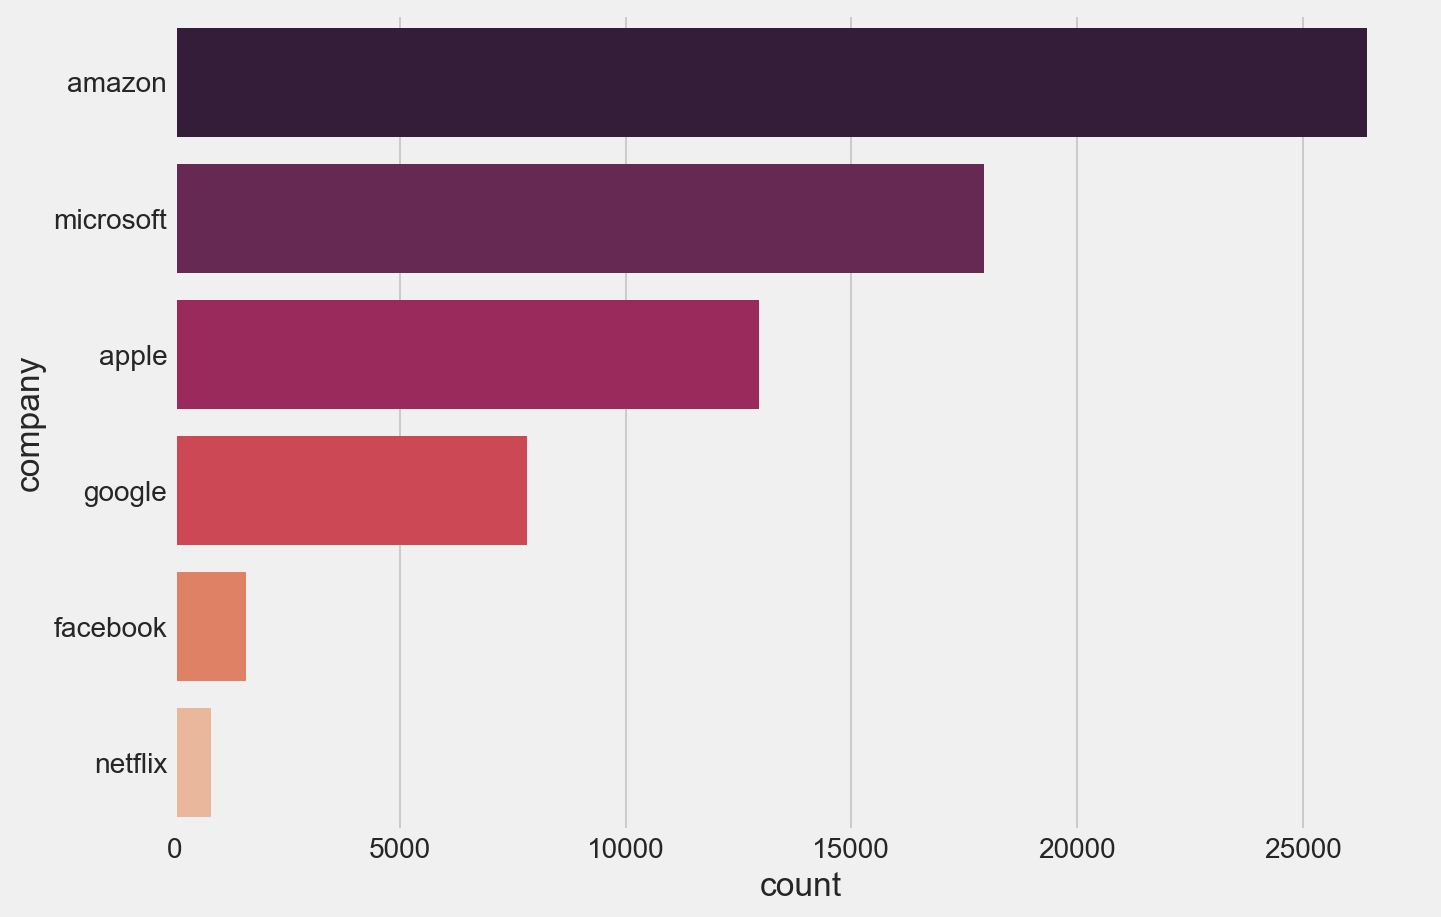

In [77]:
plt.style.use('fivethirtyeight')
plt.figure(1 , figsize = (10 , 7))
sns.countplot(y = 'company' , data = df , palette = 'rocket' , 
              order = df['company'].value_counts().index)
plt.show()

#### No of reviews on glassdoor every year or growth of reviews every year

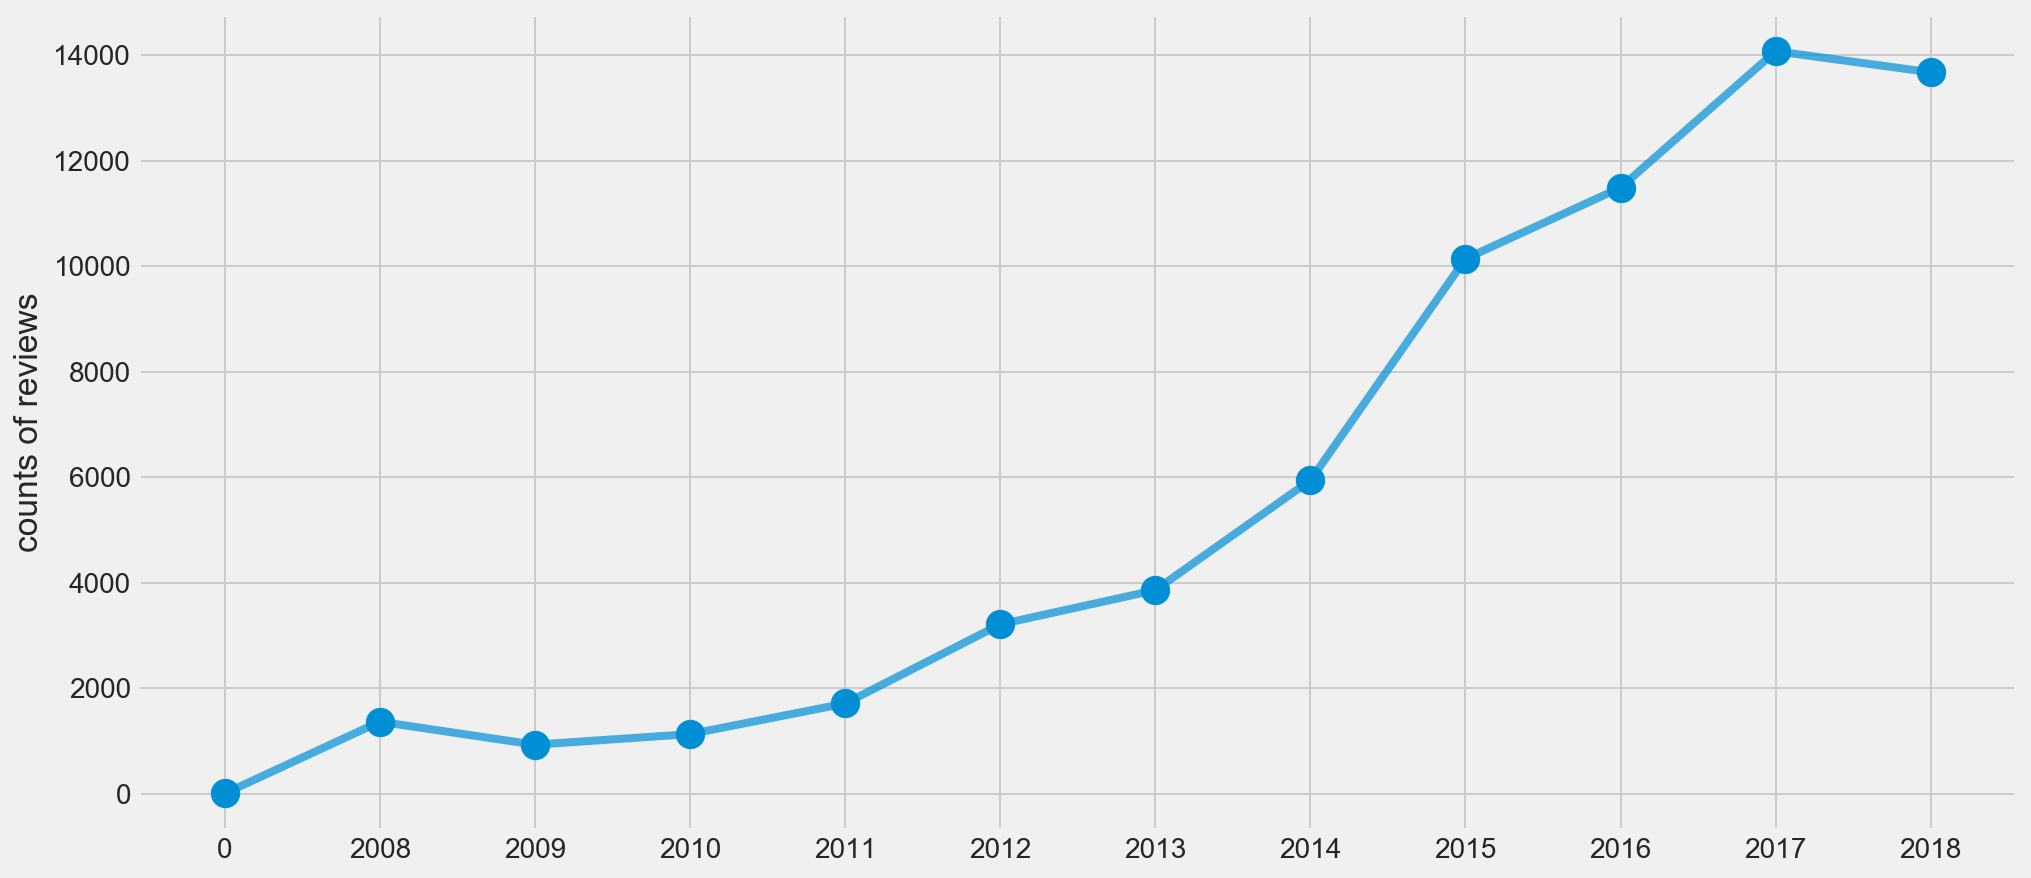

In [198]:
c = Counter(df['year'].sort_values())
plt.figure(1 , figsize = (15 , 7))
plt.scatter(x = np.arange(len(c.values())) , y =  c.values() , s = 200 )
plt.plot(np.arange(len(c.values())) , c.values() , alpha = 0.7)
plt.xticks(np.arange(len(c.values())) , c.keys())
plt.ylabel('counts of reviews')
plt.show()

### top 15 locations of the users who have reviewed on glassdoor

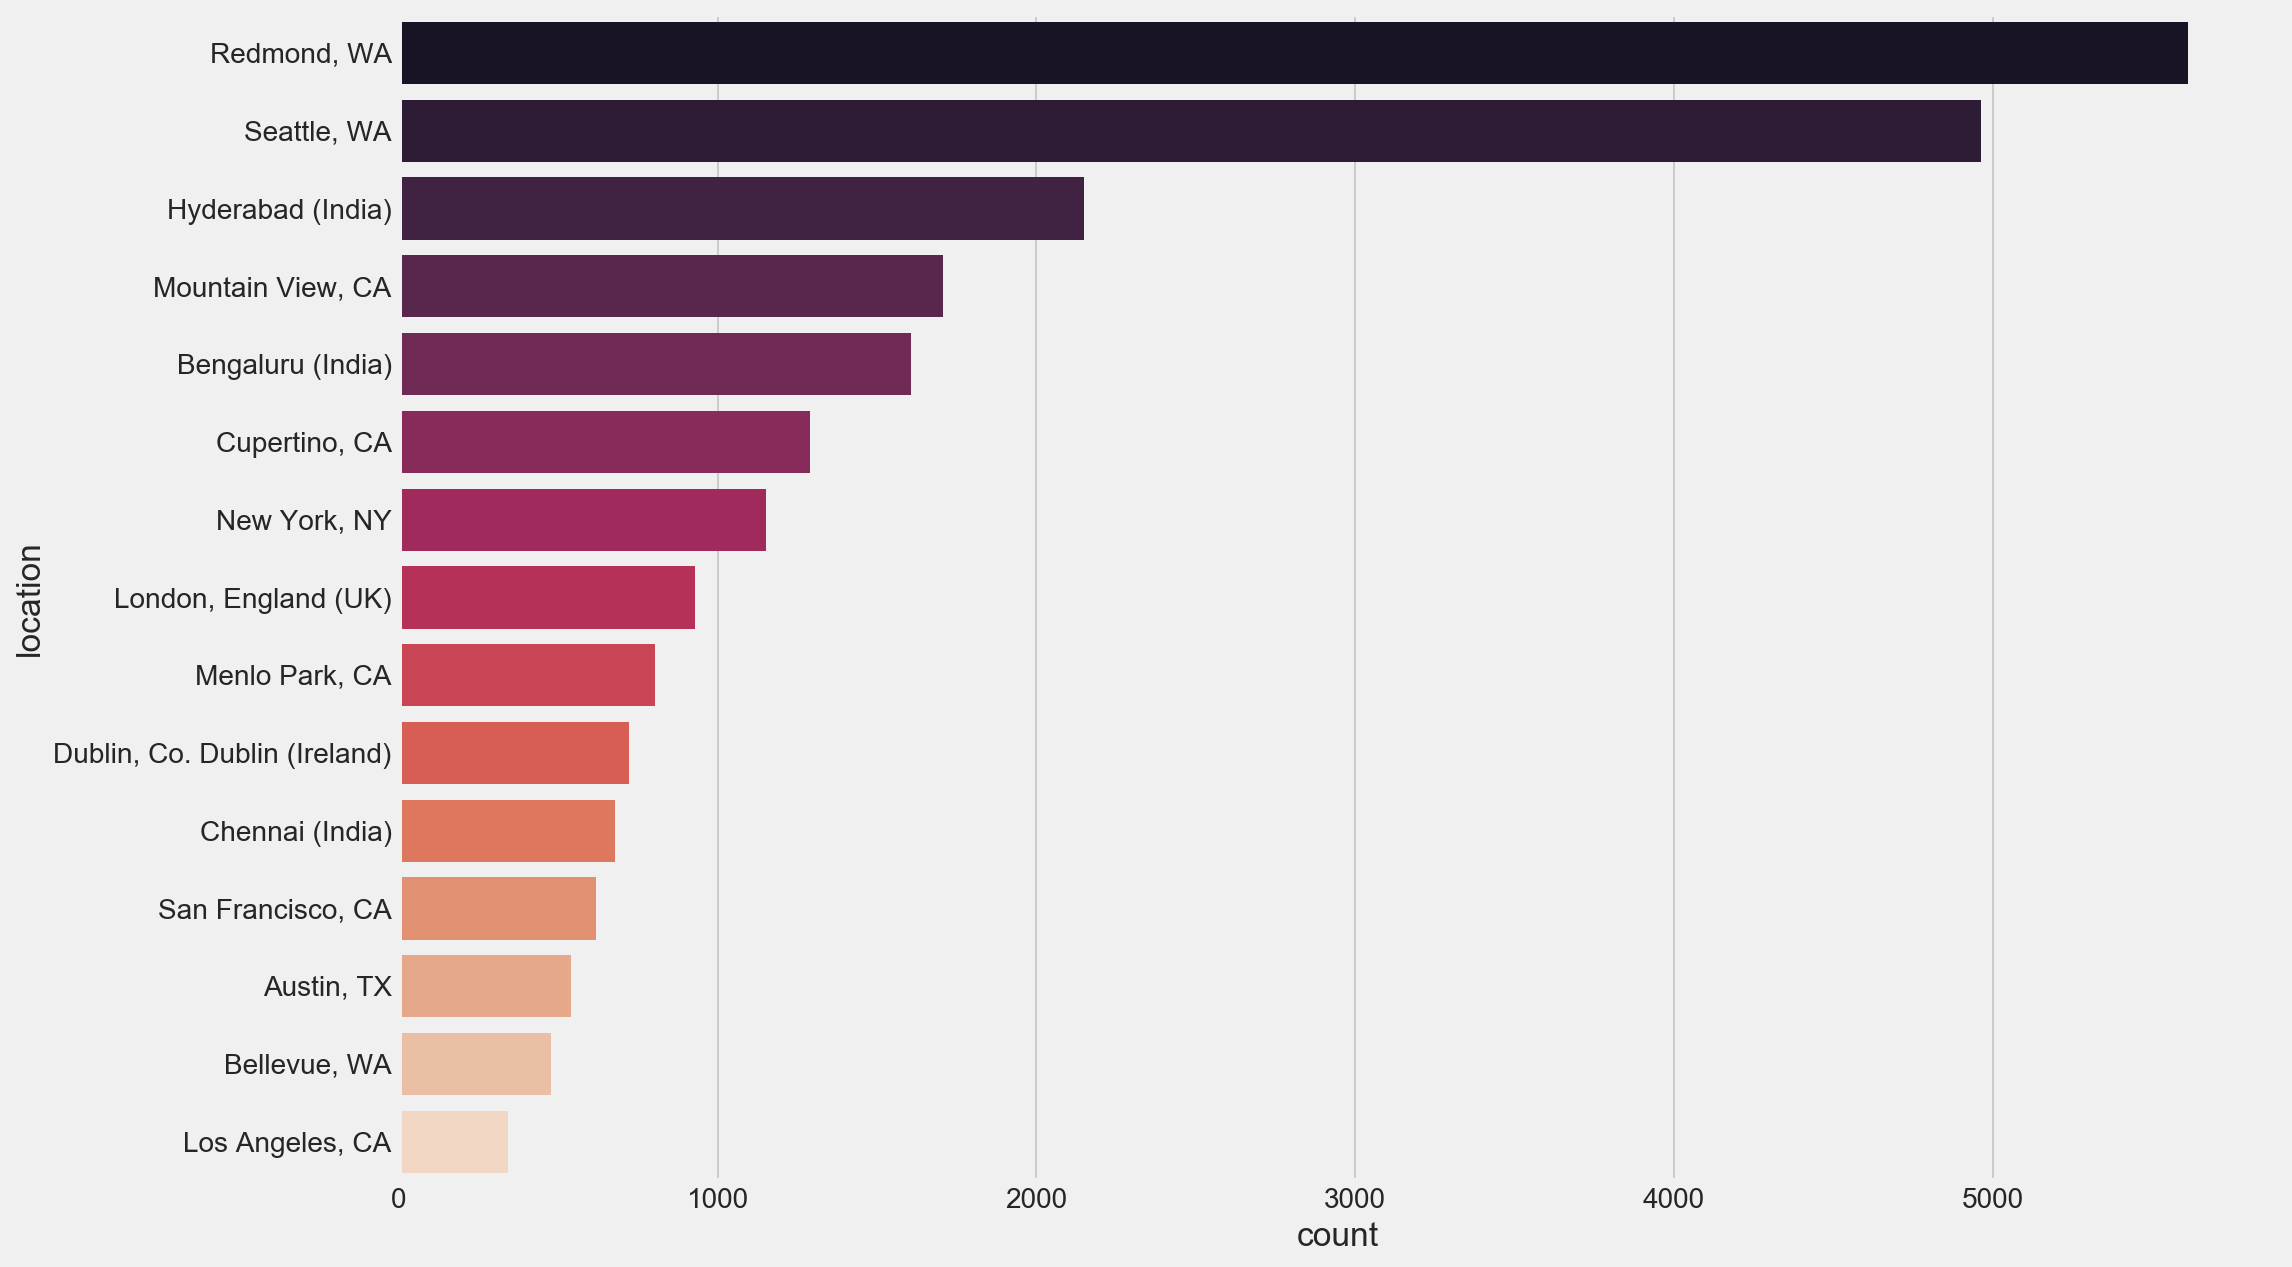

In [80]:
top_location = []
c = Counter(df['location']).most_common()[:16]
for n in range(16):
    top_location.append(c[n][0])
    
plt.figure(1 , figsize = (15 , 10))
sns.countplot(y = 'location' , data = df[df['location'].isin(top_location)] ,
              palette = 'rocket' , 
              order = df[df['location'].isin(top_location)]['location'].value_counts().index)
plt.title('')
plt.show()


### top 10 Job Titles of employees who review the most


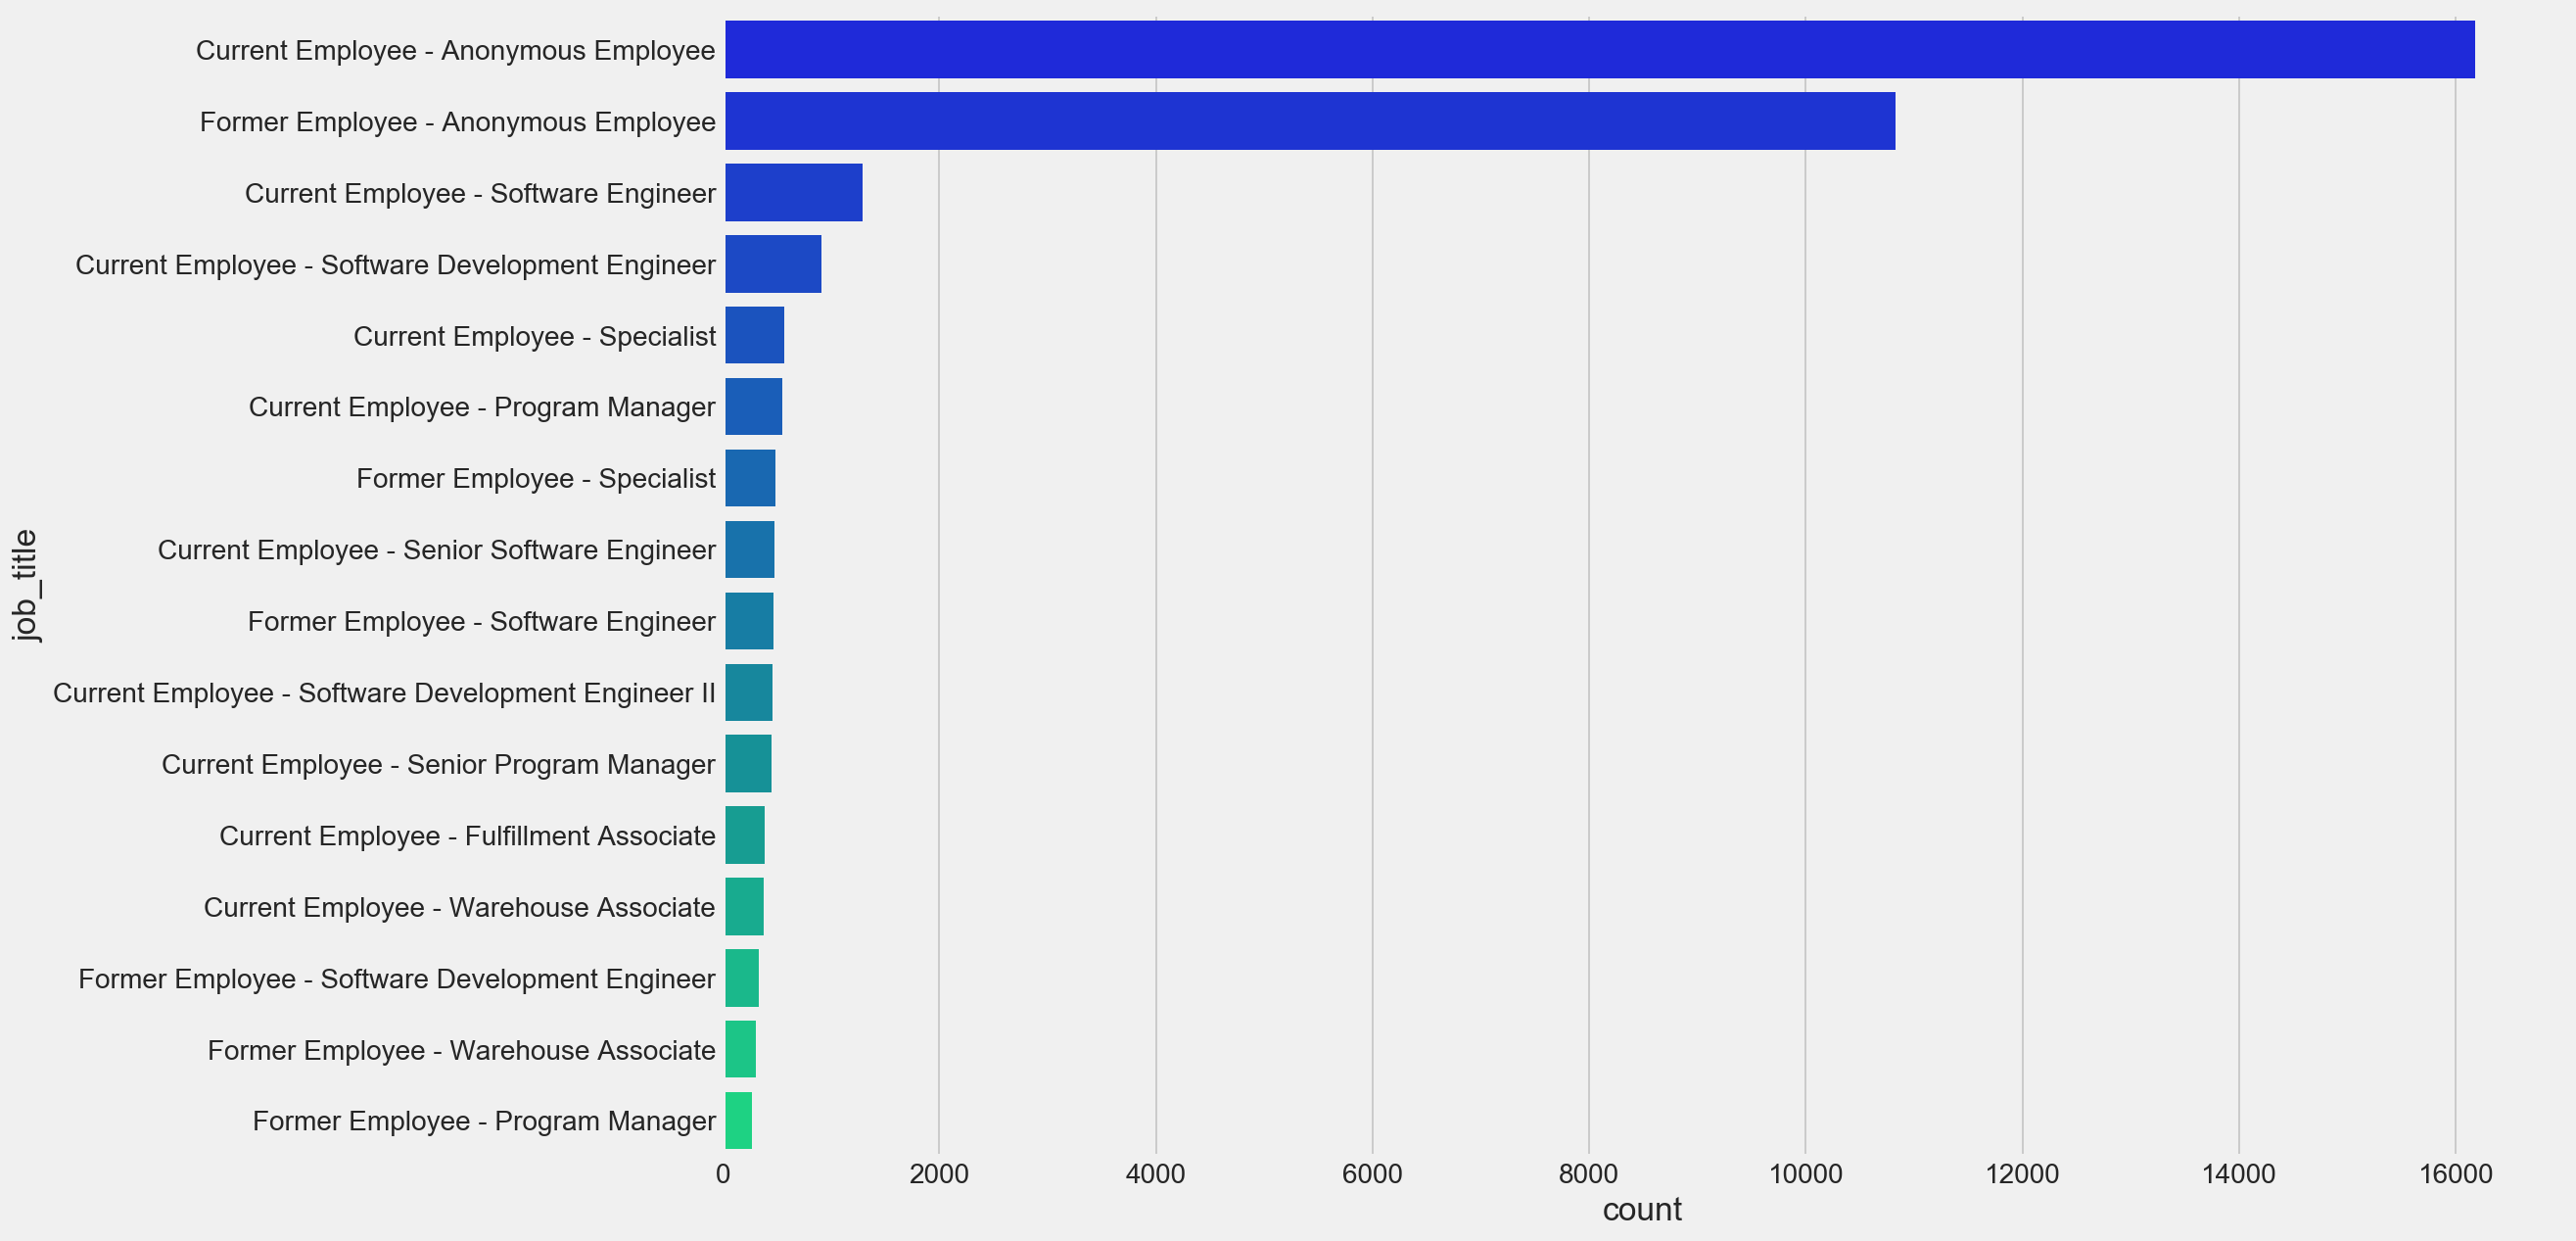

In [81]:
top_job_titles = []
c = Counter(df['job_title']).most_common()[:16]
for n in range(16):
    top_job_titles.append(c[n][0])
    
plt.figure(1 , figsize = (15 , 10))
sns.countplot(y = 'job_title' , data = df[df['job_title'].isin(top_job_titles)] ,
              palette = 'winter' , 
              order = df[df['job_title'].isin(top_job_titles)]['job_title'].value_counts().index)
plt.show()

# Plots of Company-wise Ratings on various parameters¶

## for overall_ratings

array([<matplotlib.axes._subplots.AxesSubplot object at 0x0000017ED8564B38>,
       <matplotlib.axes._subplots.AxesSubplot object at 0x0000017EED515278>], dtype=object)

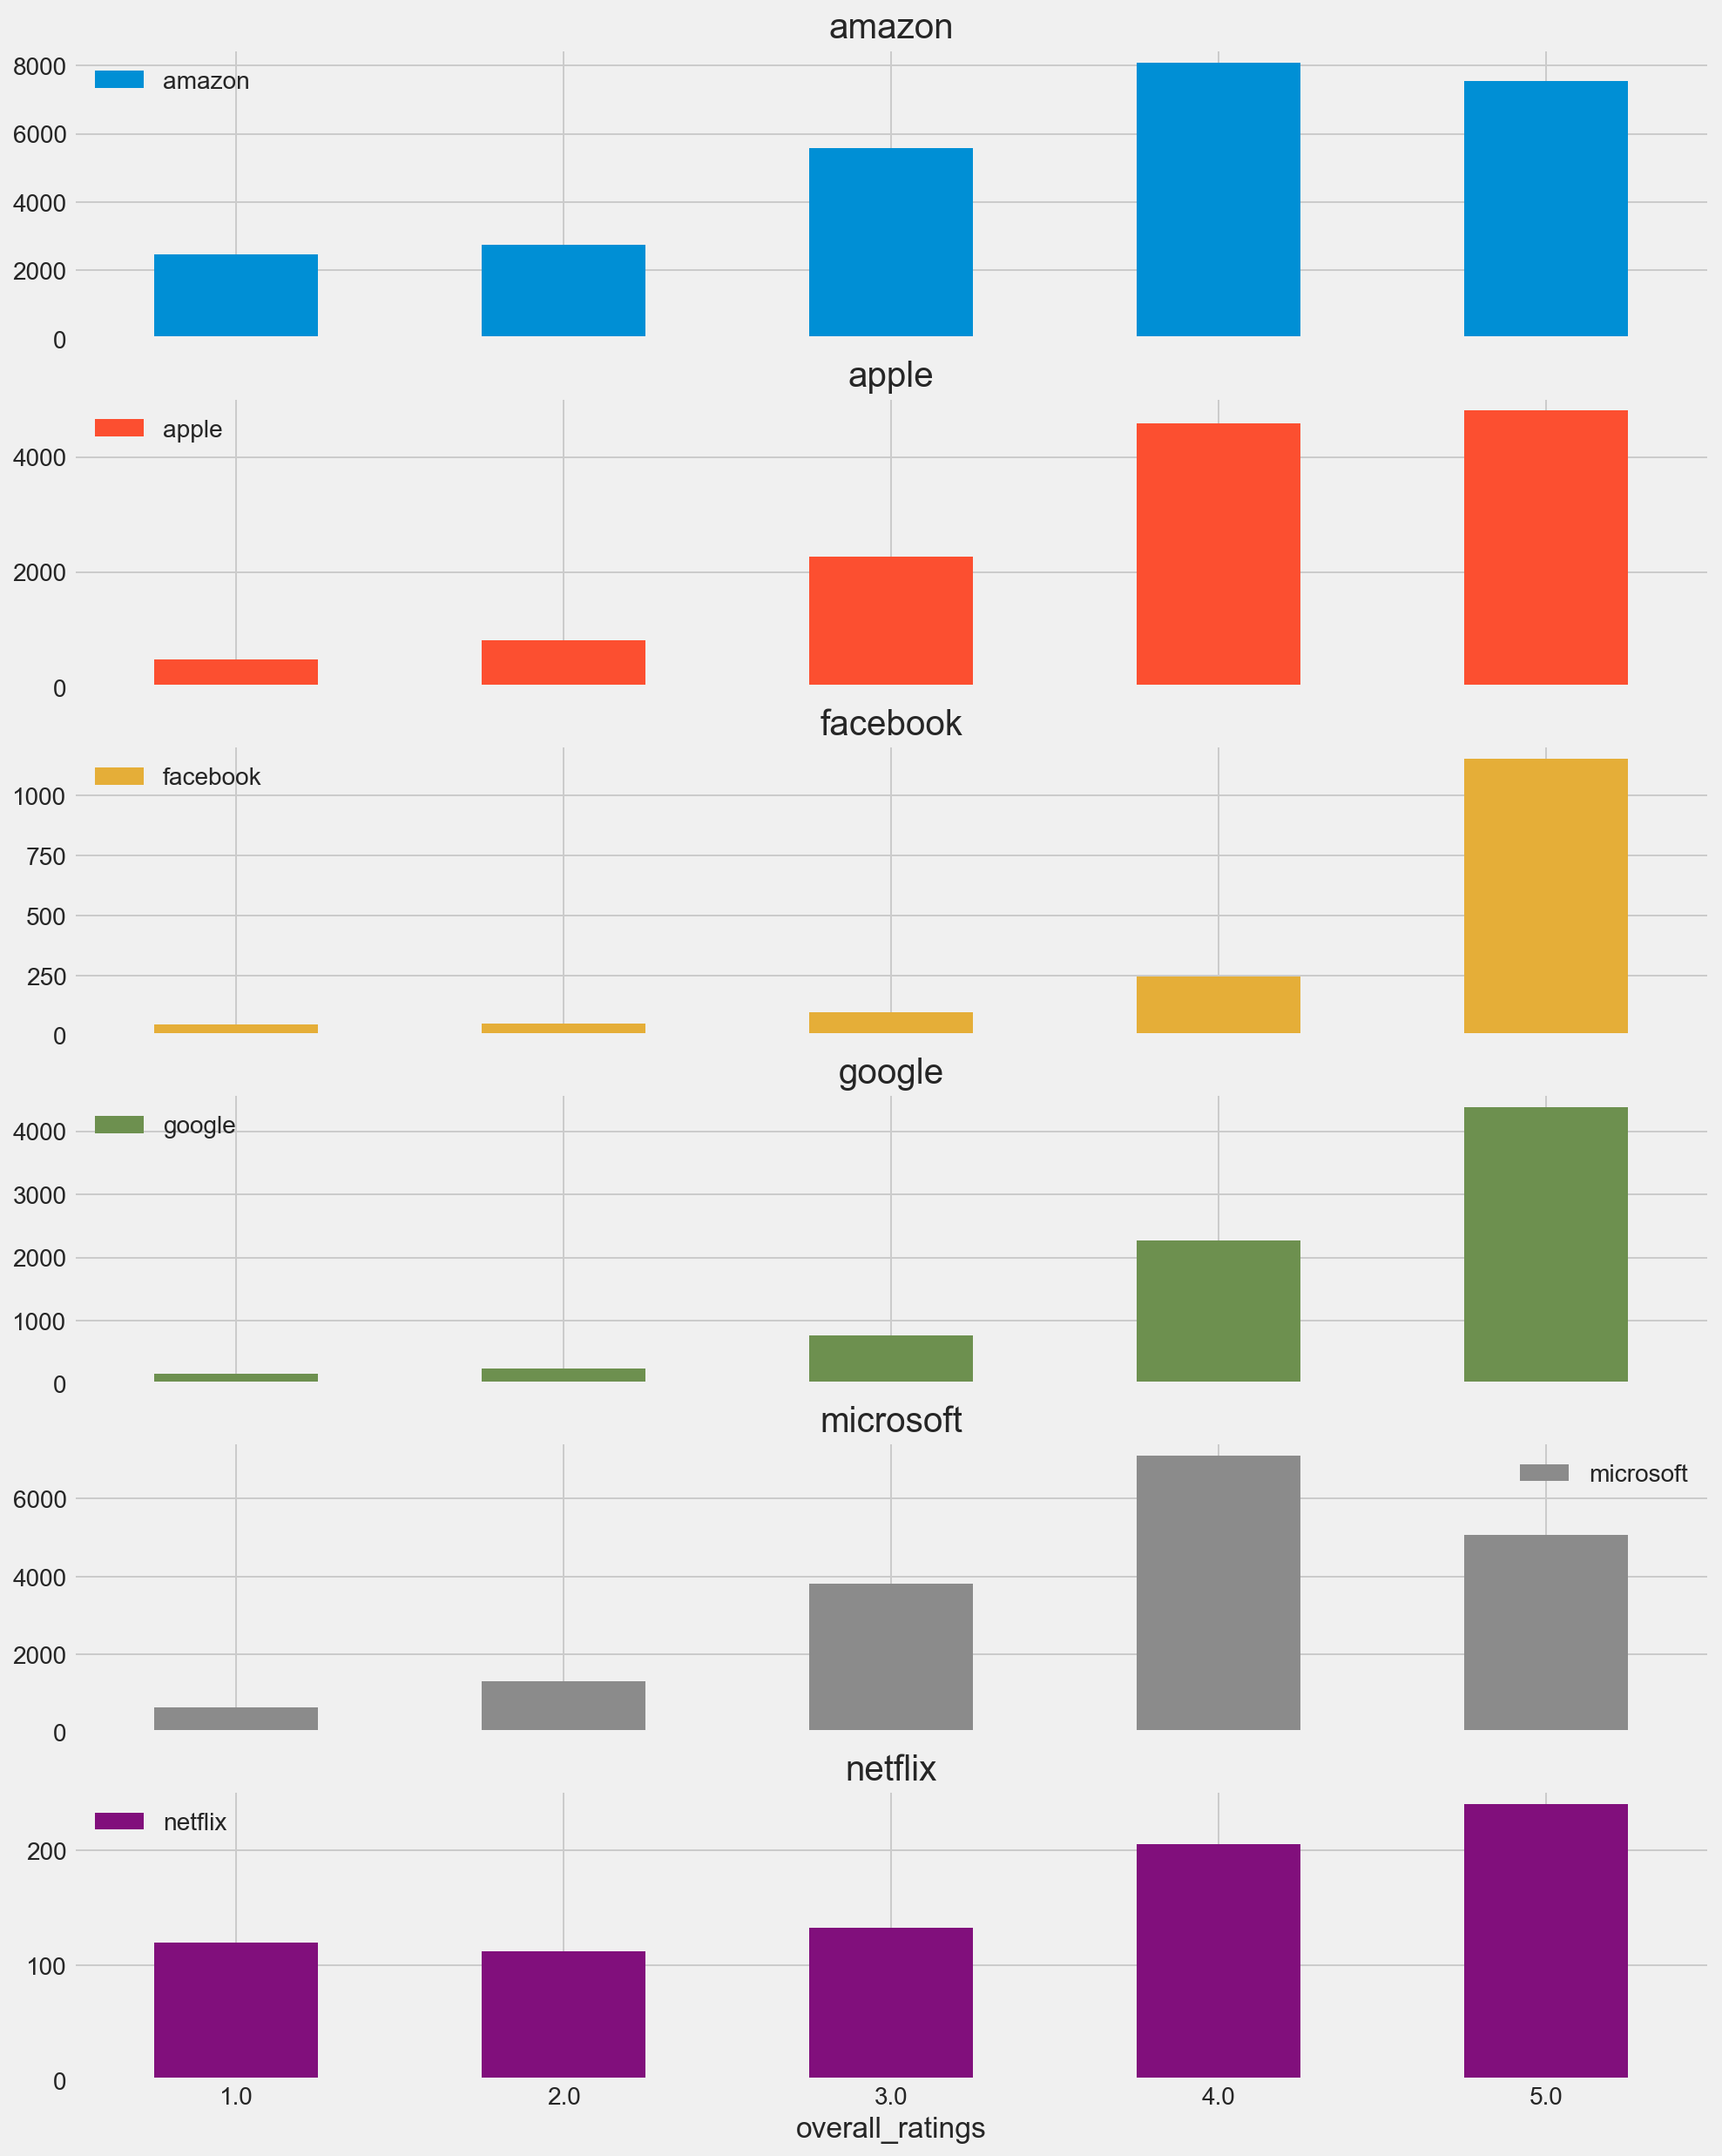

In [82]:
df.groupby(['overall_ratings','company']).size().unstack().plot.bar(subplots=True, rot=0, figsize=(15,20), legend=True)

 ##  for culture_values_stars

array([<matplotlib.axes._subplots.AxesSubplot object at 0x0000017EEE66D358>,
       <matplotlib.axes._subplots.AxesSubplot object at 0x0000017EEE801080>], dtype=object)

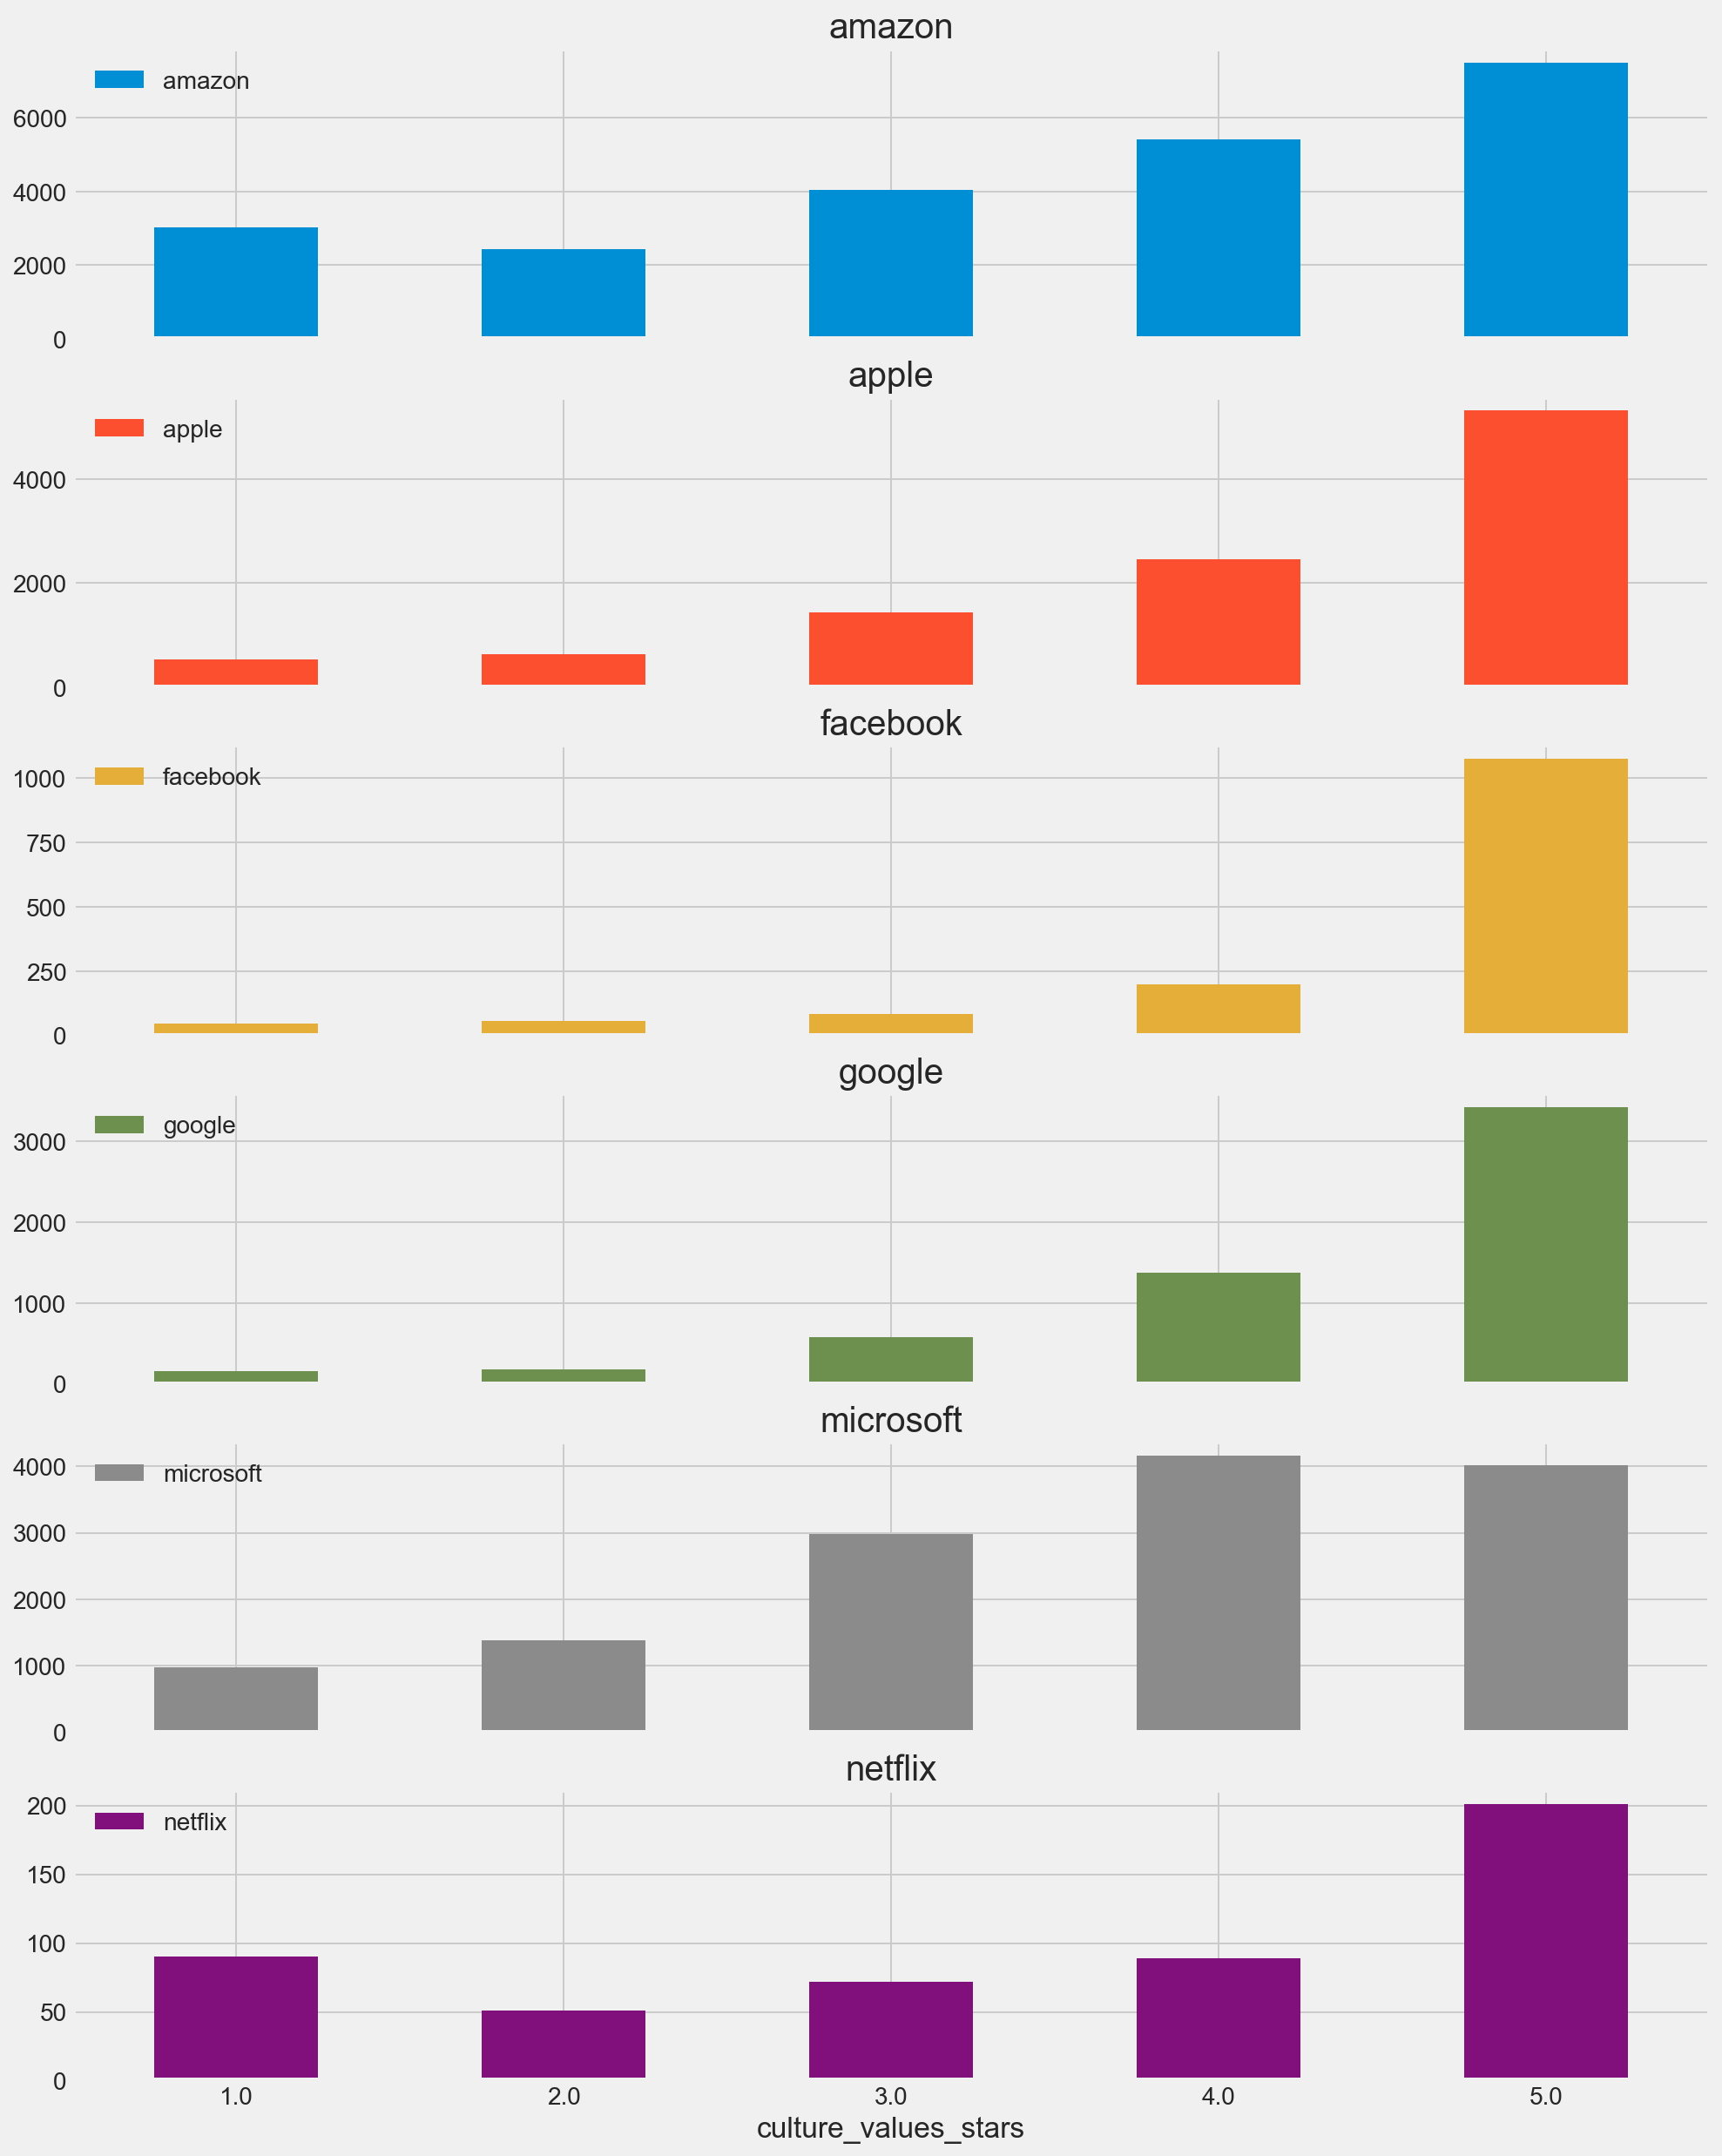

In [83]:
df.groupby(['culture_values_stars','company']).size().unstack().plot.bar(subplots=True, rot=0, figsize=(15,20), legend=True)

##  for comp_benefit_stars

array([<matplotlib.axes._subplots.AxesSubplot object at 0x0000017EEE8B8BA8>,
       <matplotlib.axes._subplots.AxesSubplot object at 0x0000017ED81A1C88>], dtype=object)

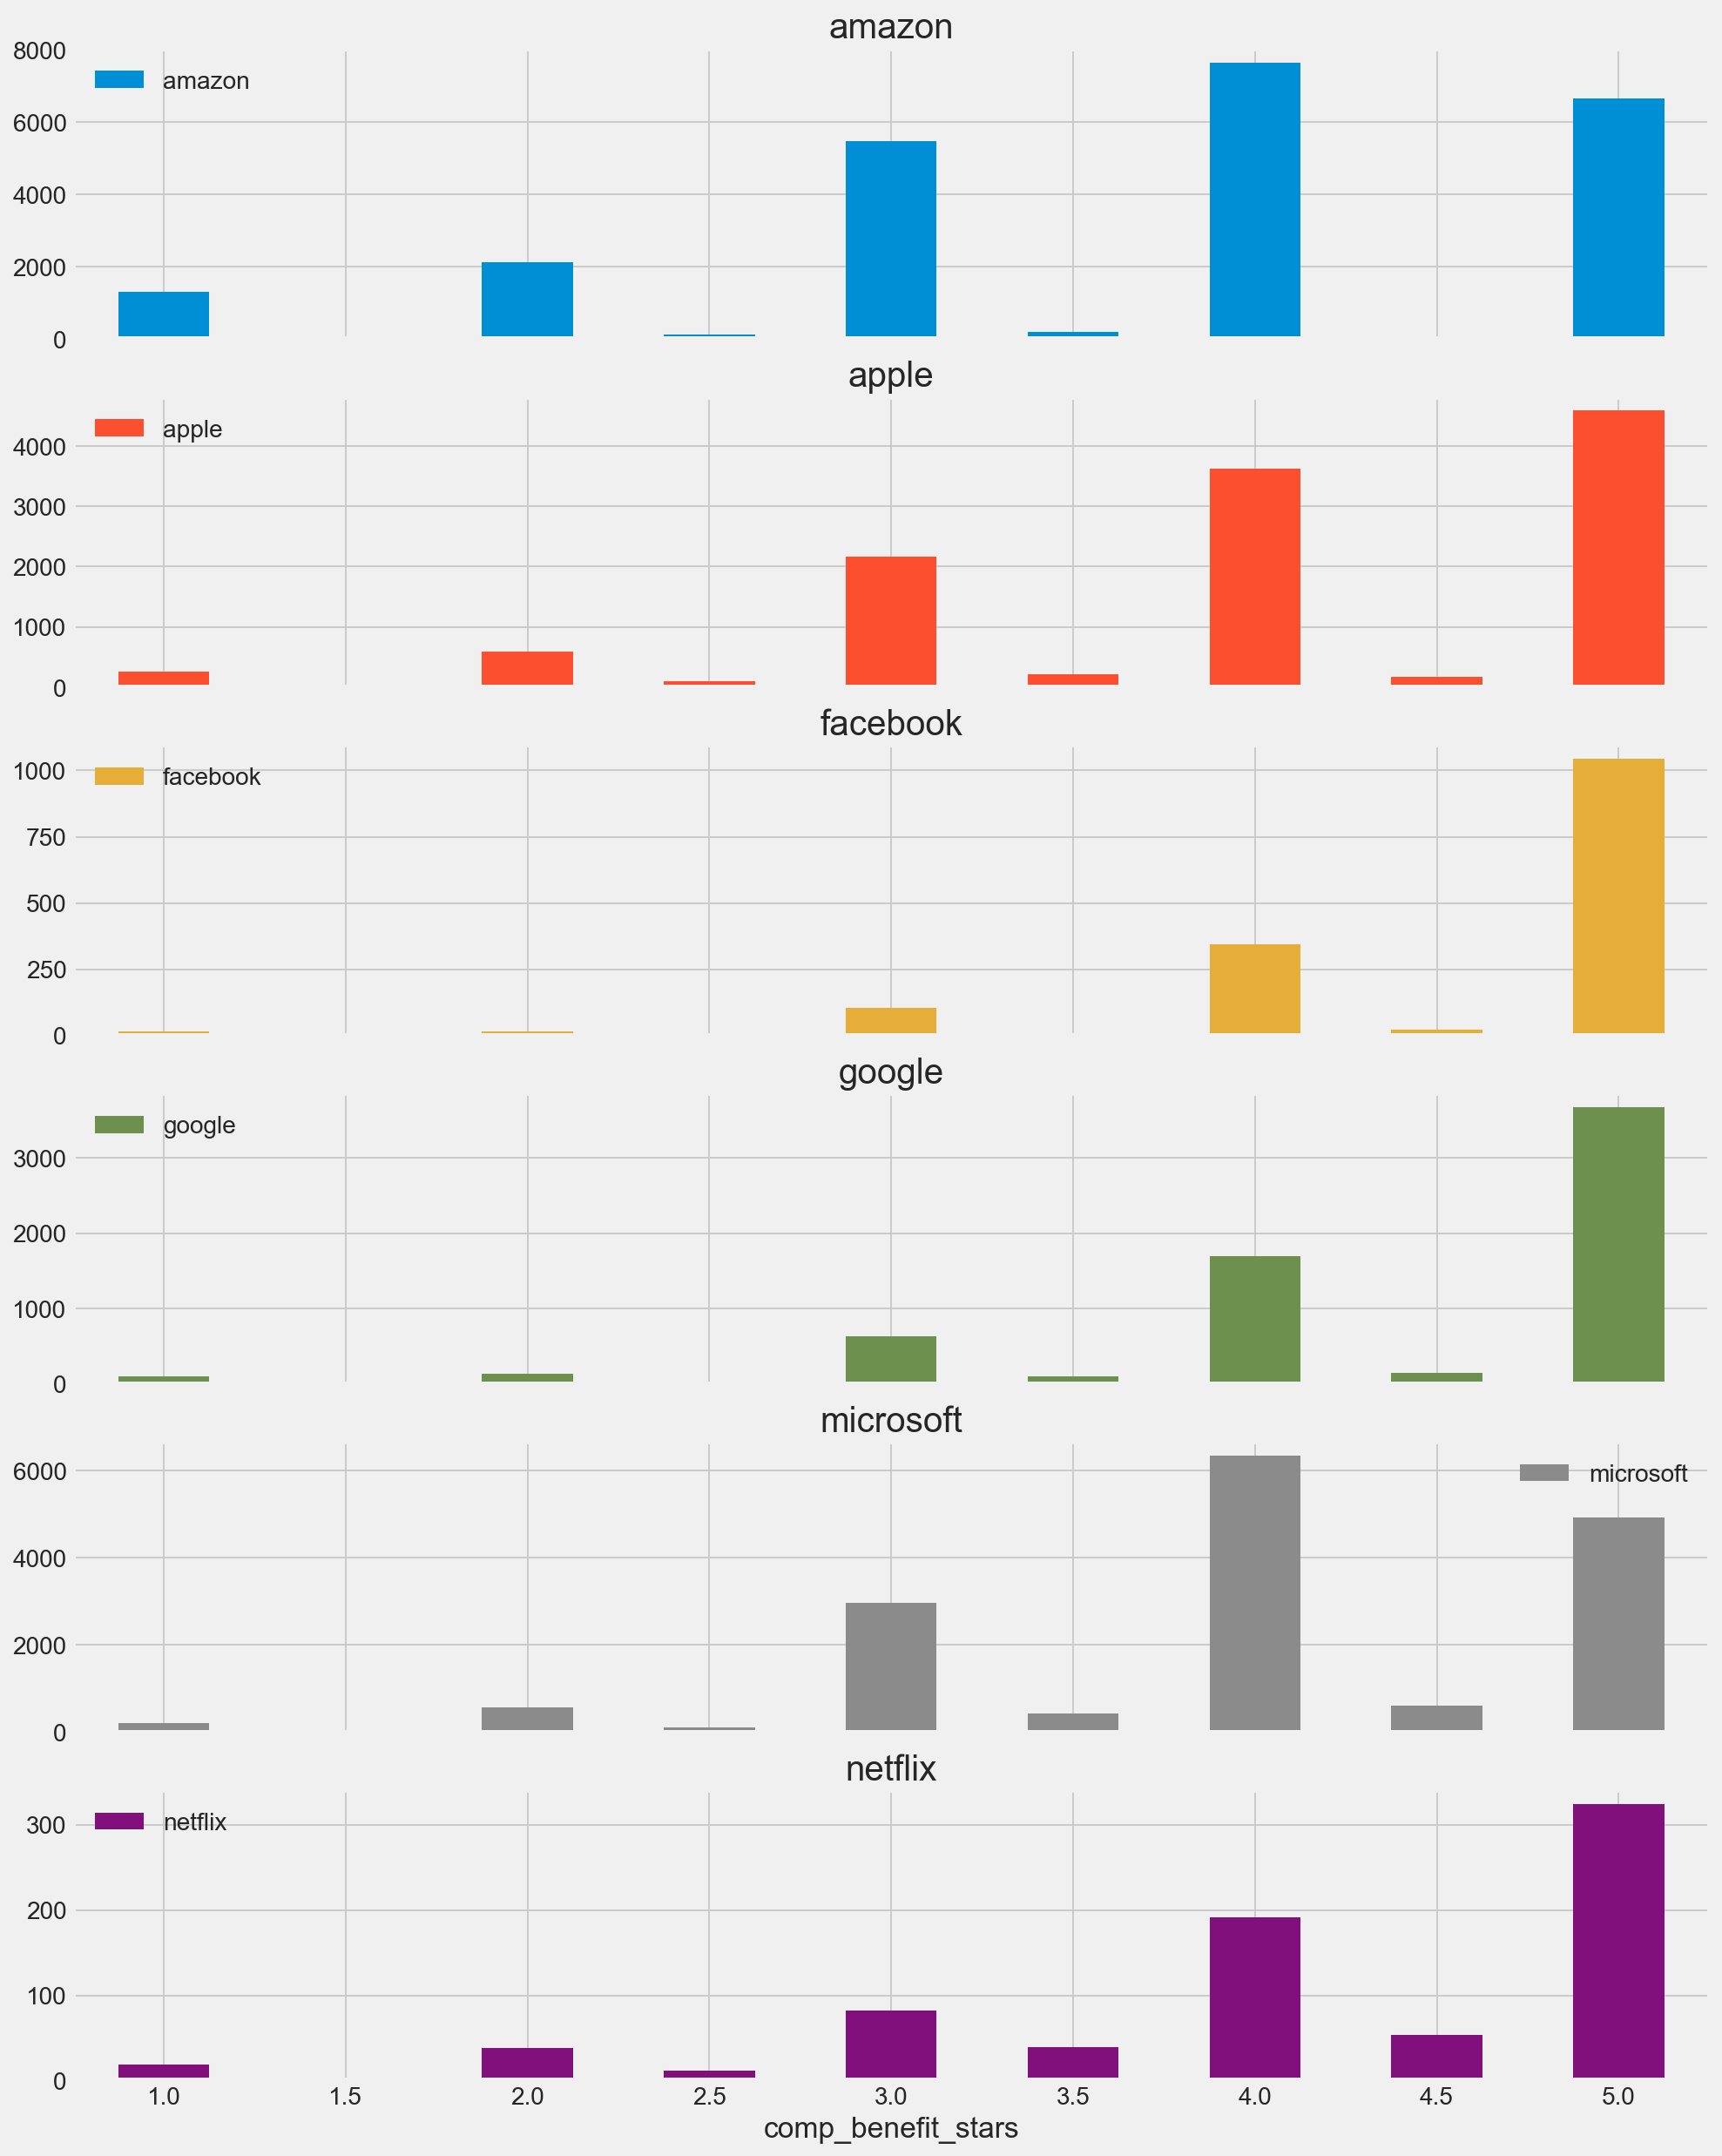

In [84]:
df.groupby(['comp_benefit_stars','company']).size().unstack().plot.bar(subplots=True, rot=0, figsize=(15,20), legend=True)

## for senior_mangemnet_stars

array([<matplotlib.axes._subplots.AxesSubplot object at 0x0000017EEB799C88>,
       <matplotlib.axes._subplots.AxesSubplot object at 0x0000017EED3A7BE0>], dtype=object)

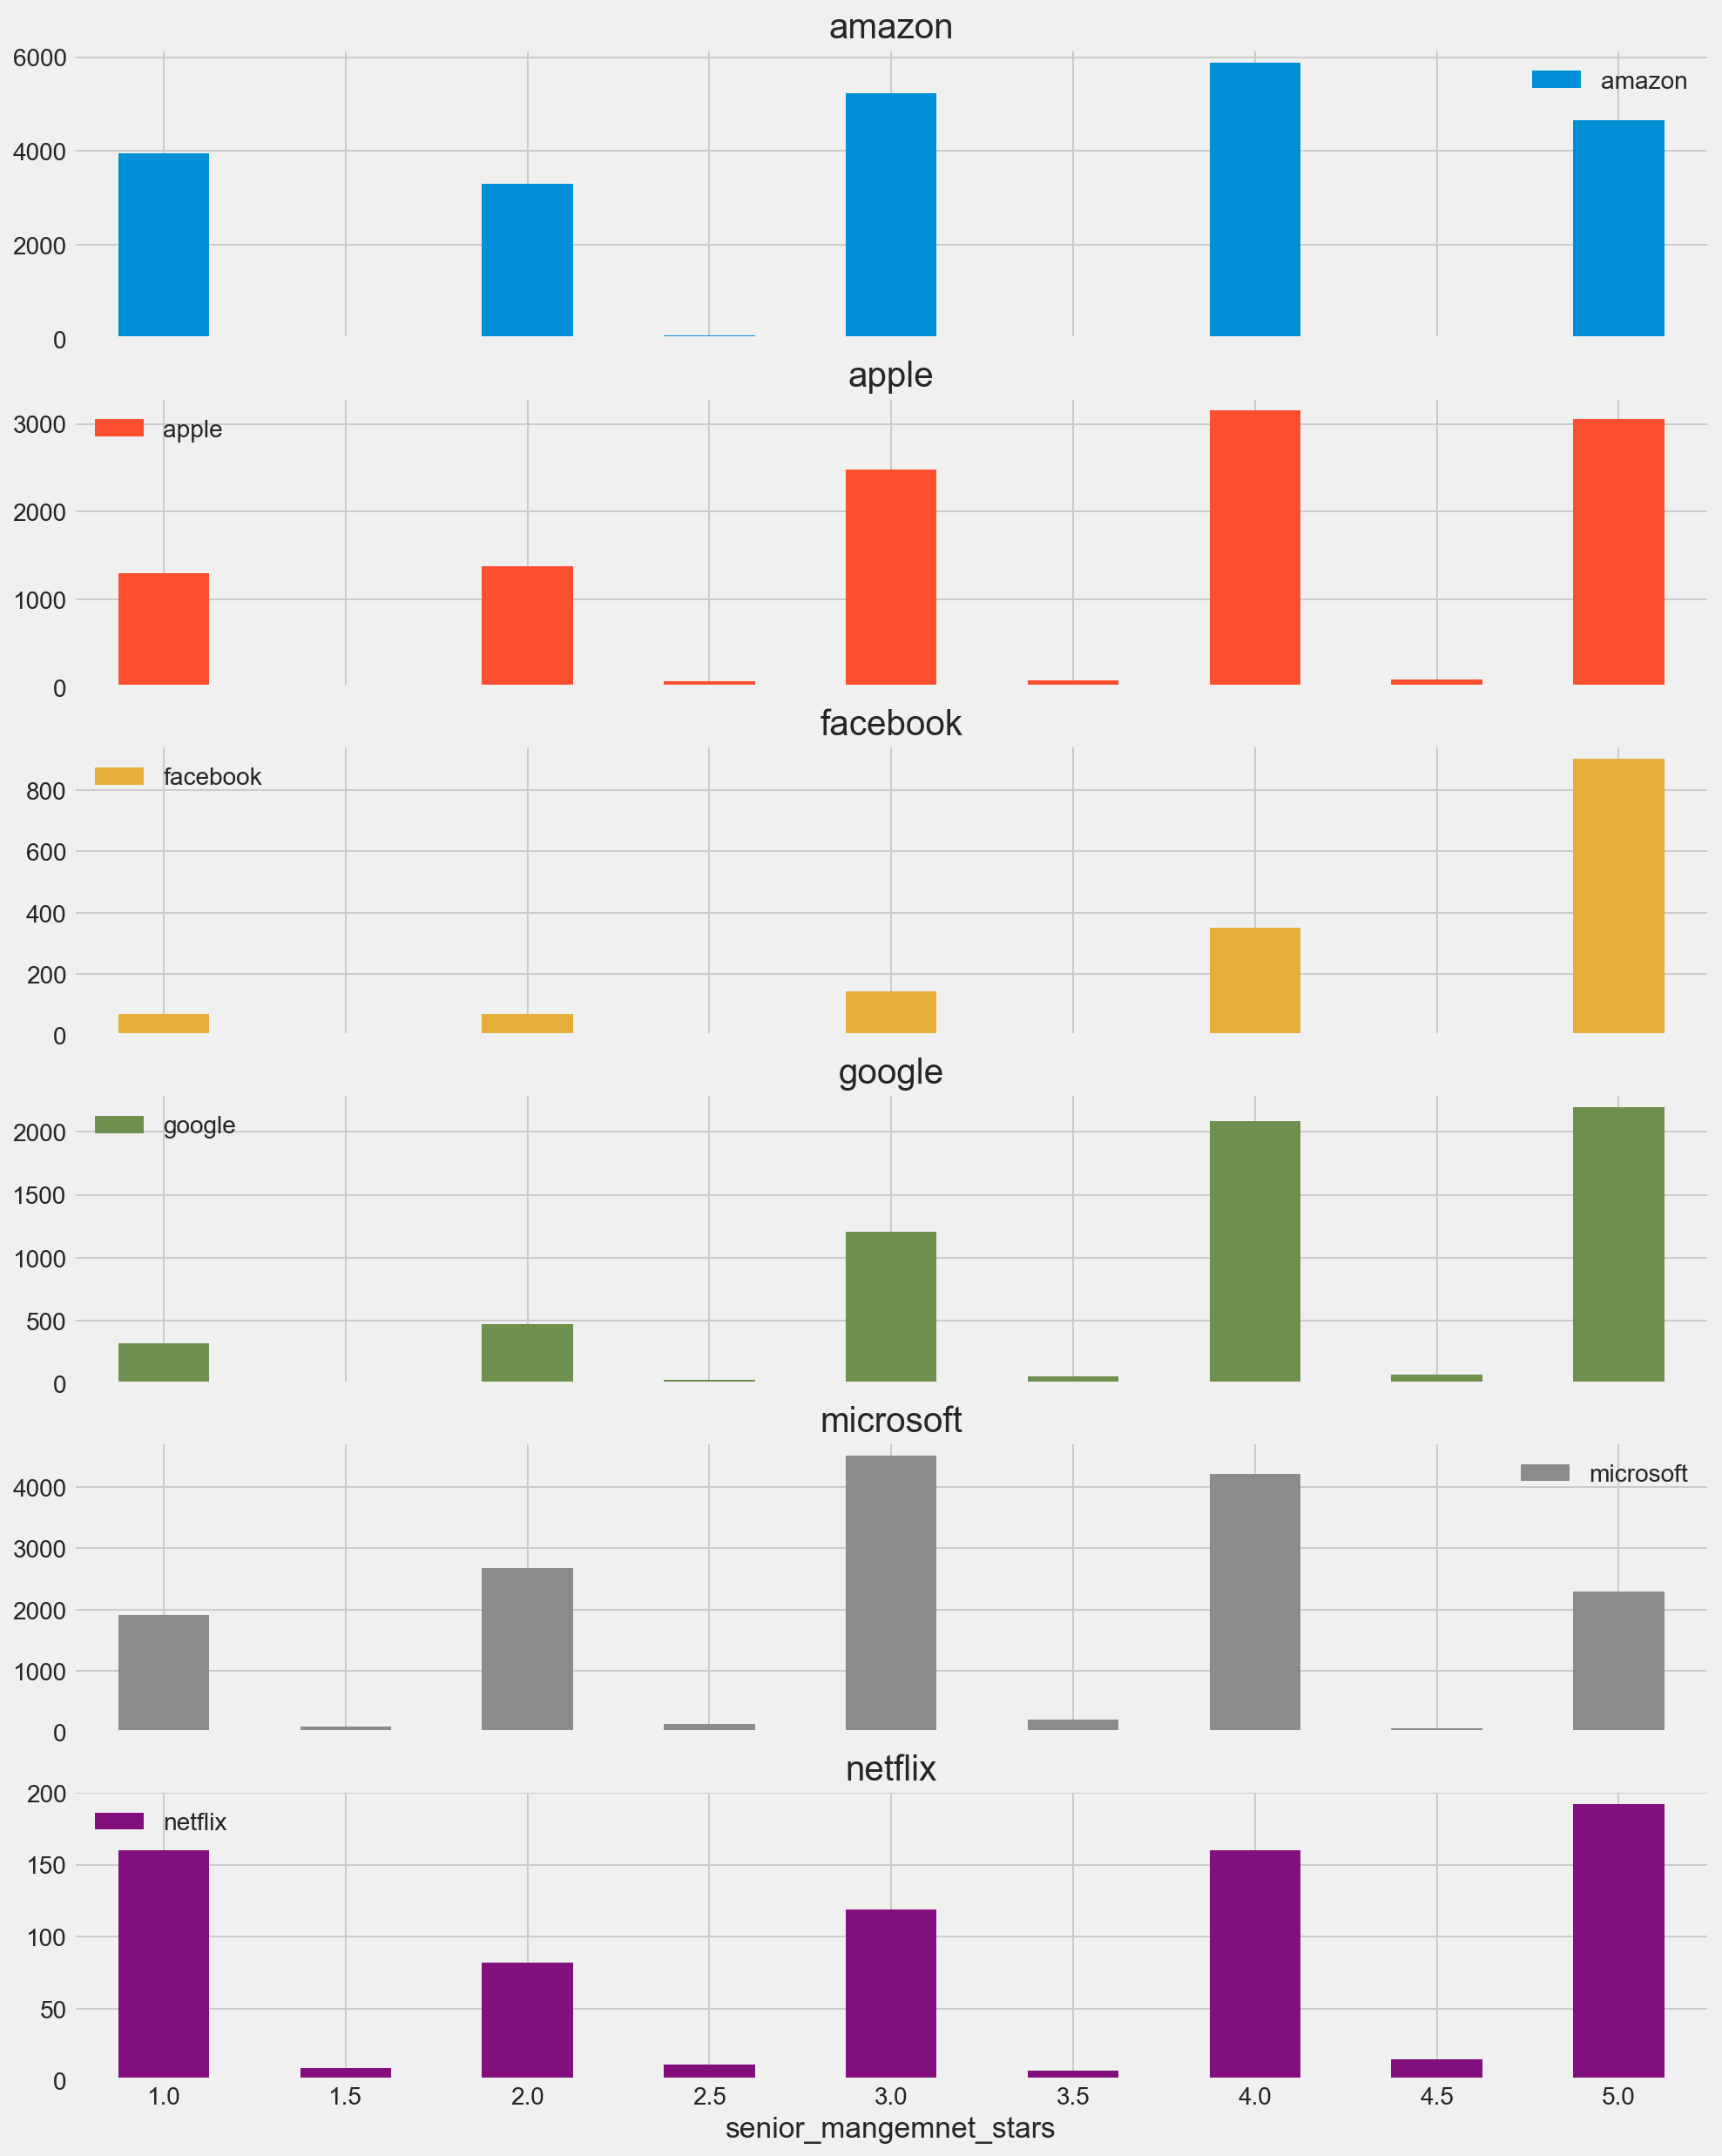

In [85]:
df.groupby(['senior_mangemnet_stars','company']).size().unstack().plot.bar(subplots=True, rot=0, figsize=(15,20), legend=True)

## for work_balance_stars

array([<matplotlib.axes._subplots.AxesSubplot object at 0x0000017EE5C10FD0>,
       <matplotlib.axes._subplots.AxesSubplot object at 0x0000017EE5CD8E48>], dtype=object)

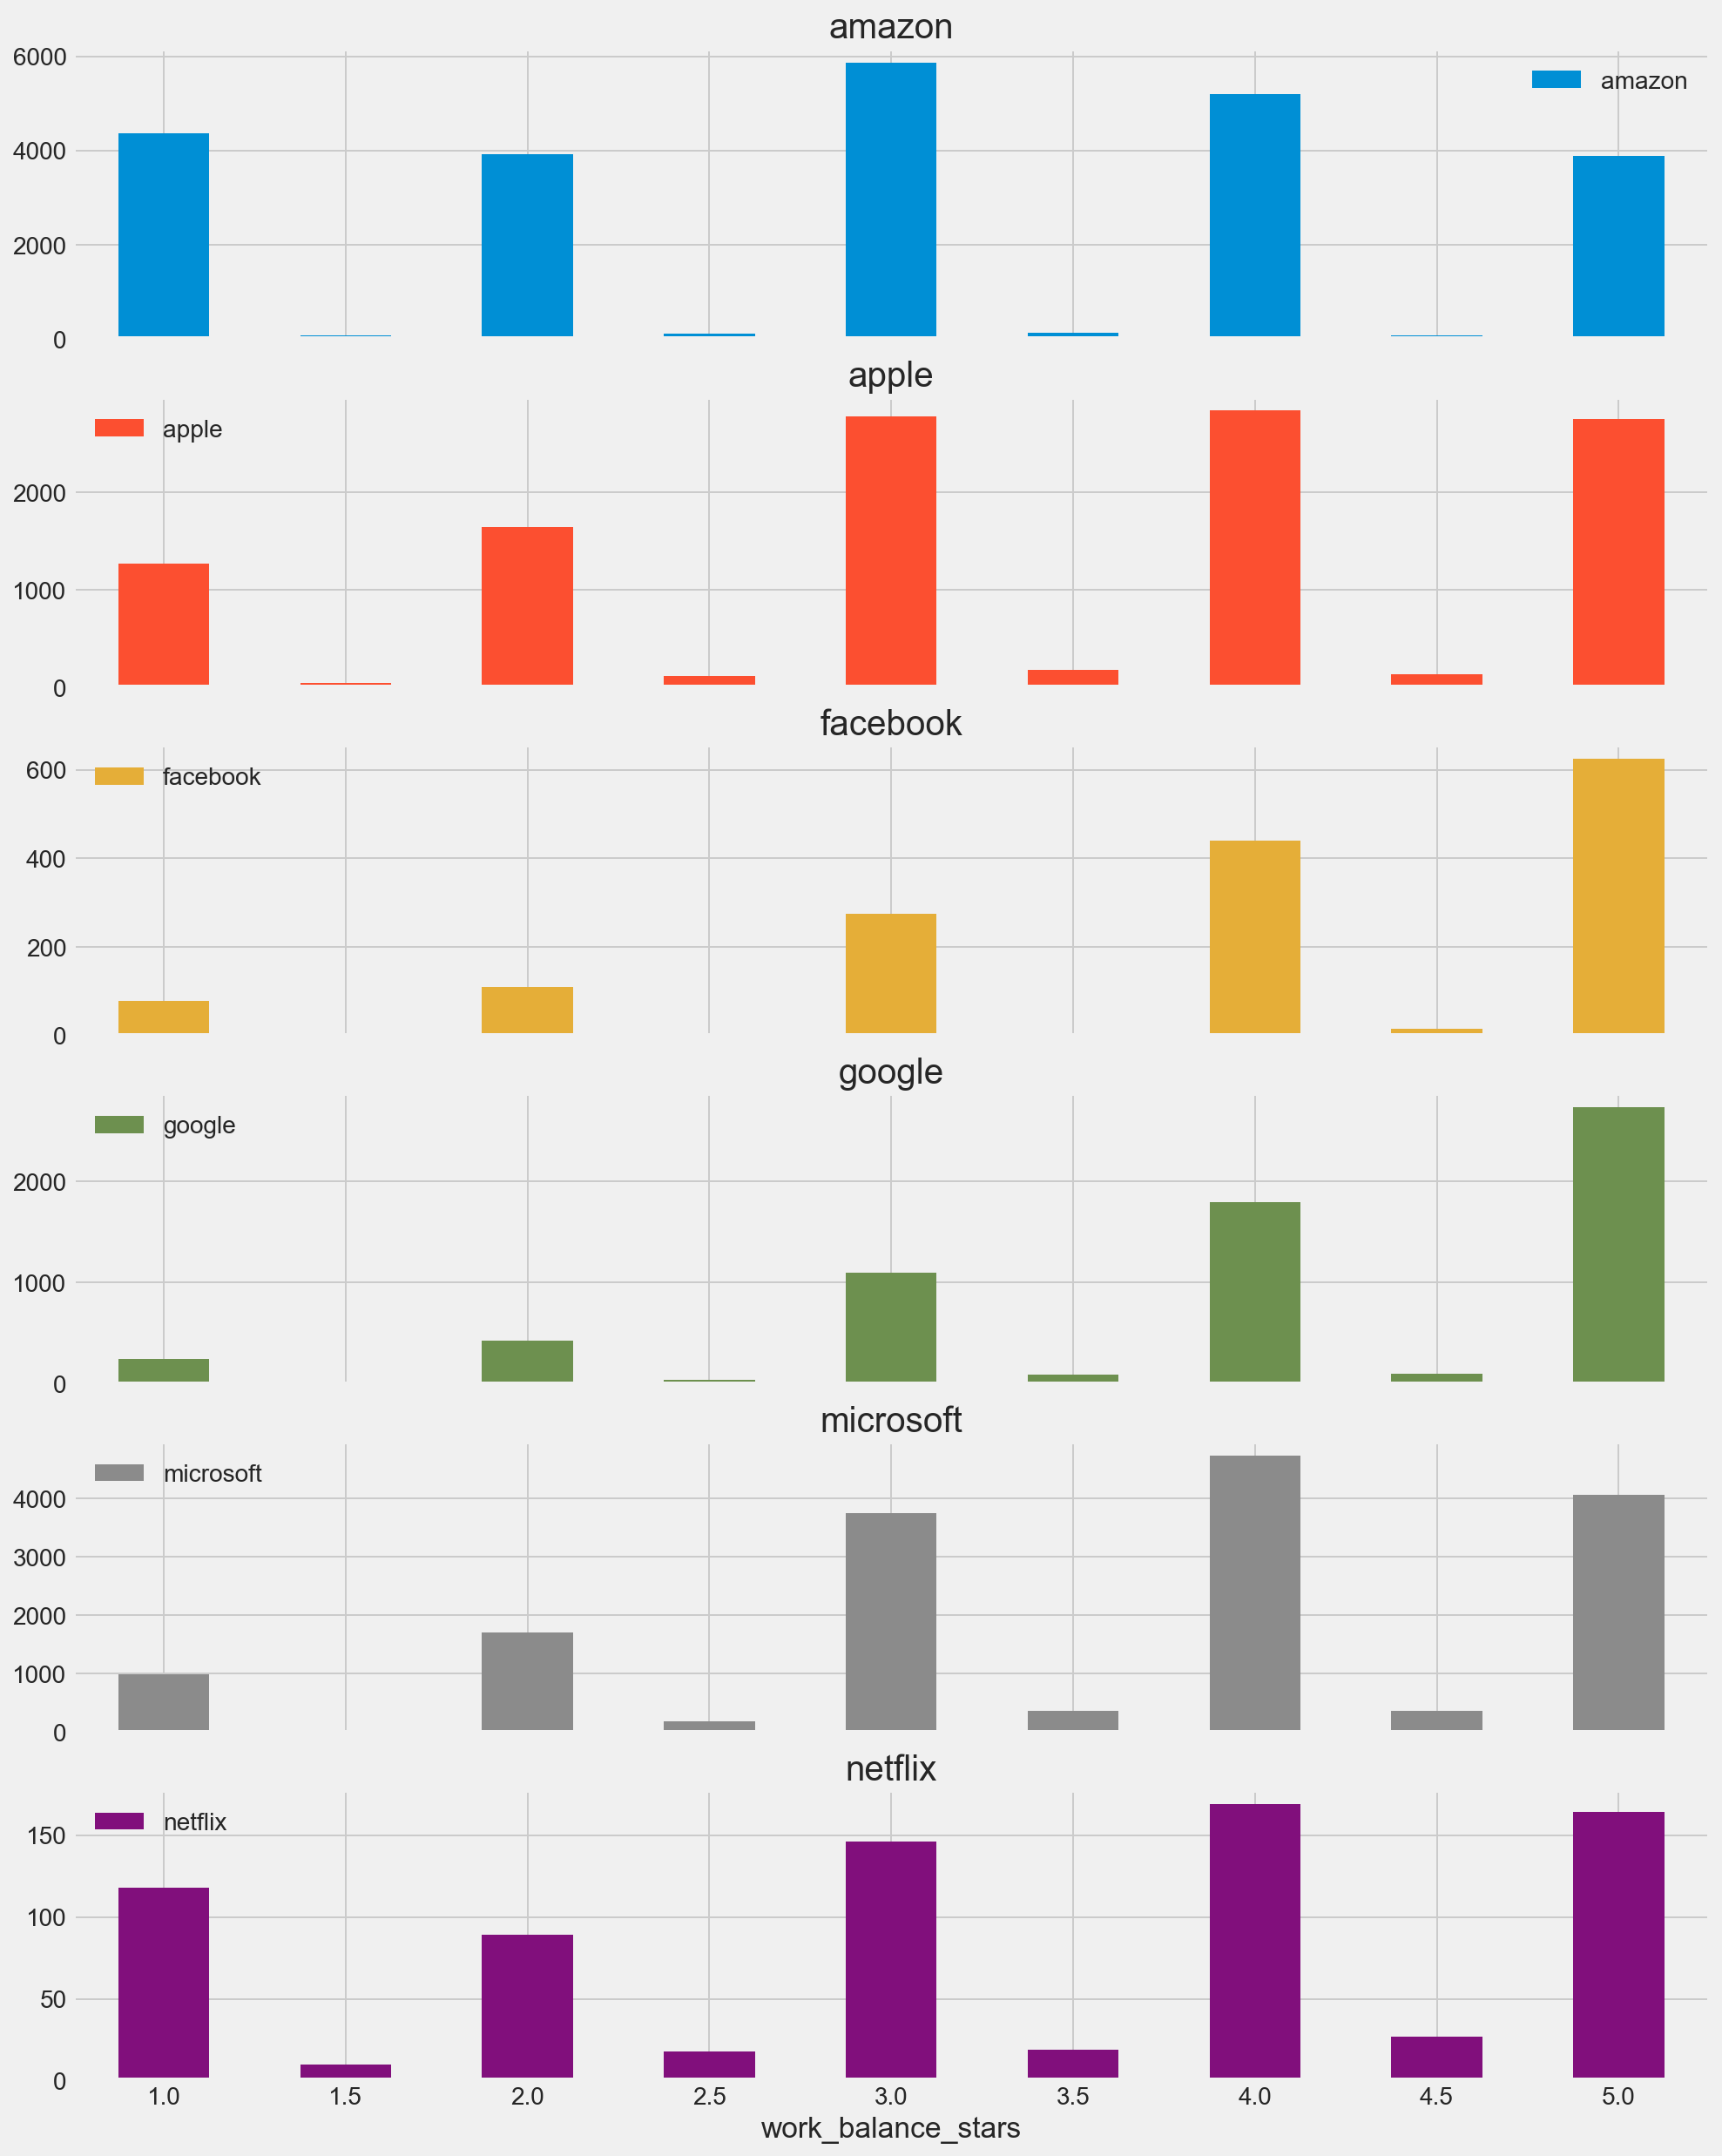

In [86]:
df.groupby(['work_balance_stars','company']).size().unstack().plot.bar(subplots=True, rot=0, figsize=(15,20), legend=True)

## for carrer_opportunities_stars

array([<matplotlib.axes._subplots.AxesSubplot object at 0x0000017EE5DE4160>,
       <matplotlib.axes._subplots.AxesSubplot object at 0x0000017EE5FE81D0>], dtype=object)

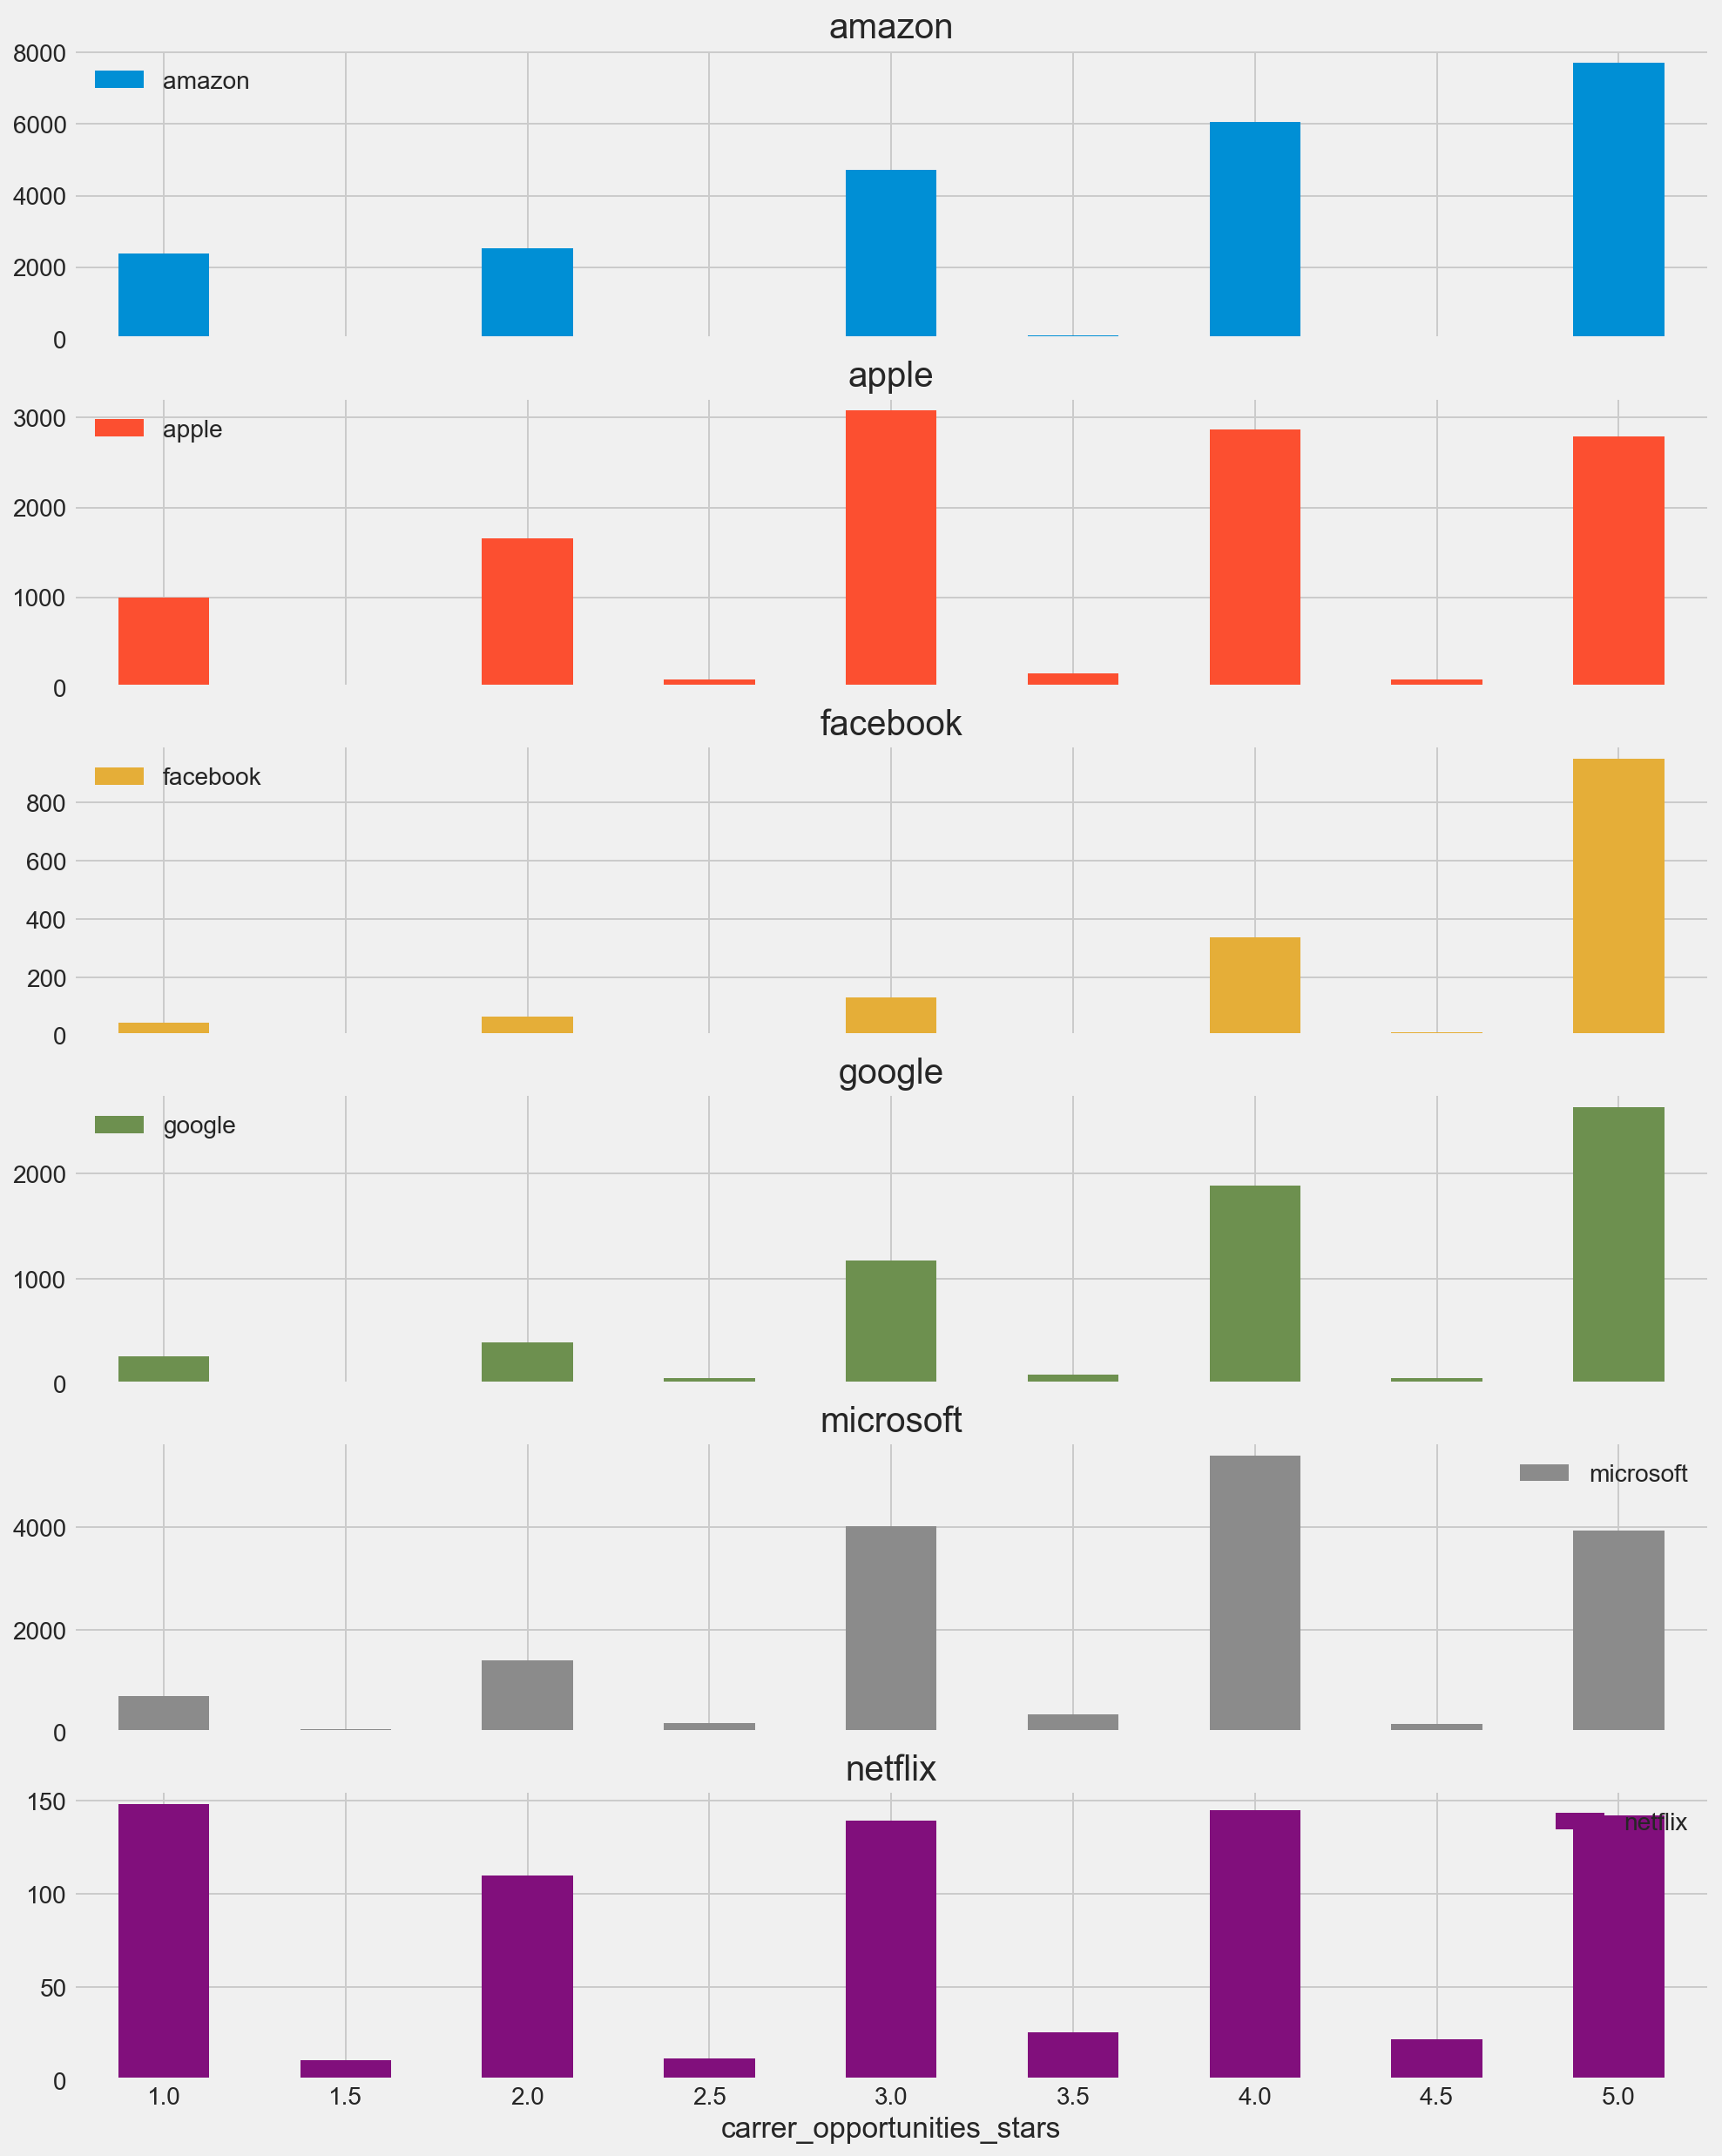

In [88]:
df.groupby(['carrer_opportunities_stars','company']).size().unstack().plot.bar(subplots=True, rot=0, figsize=(15,20), legend=True)

   ##                   Overall rating distribution of different companies

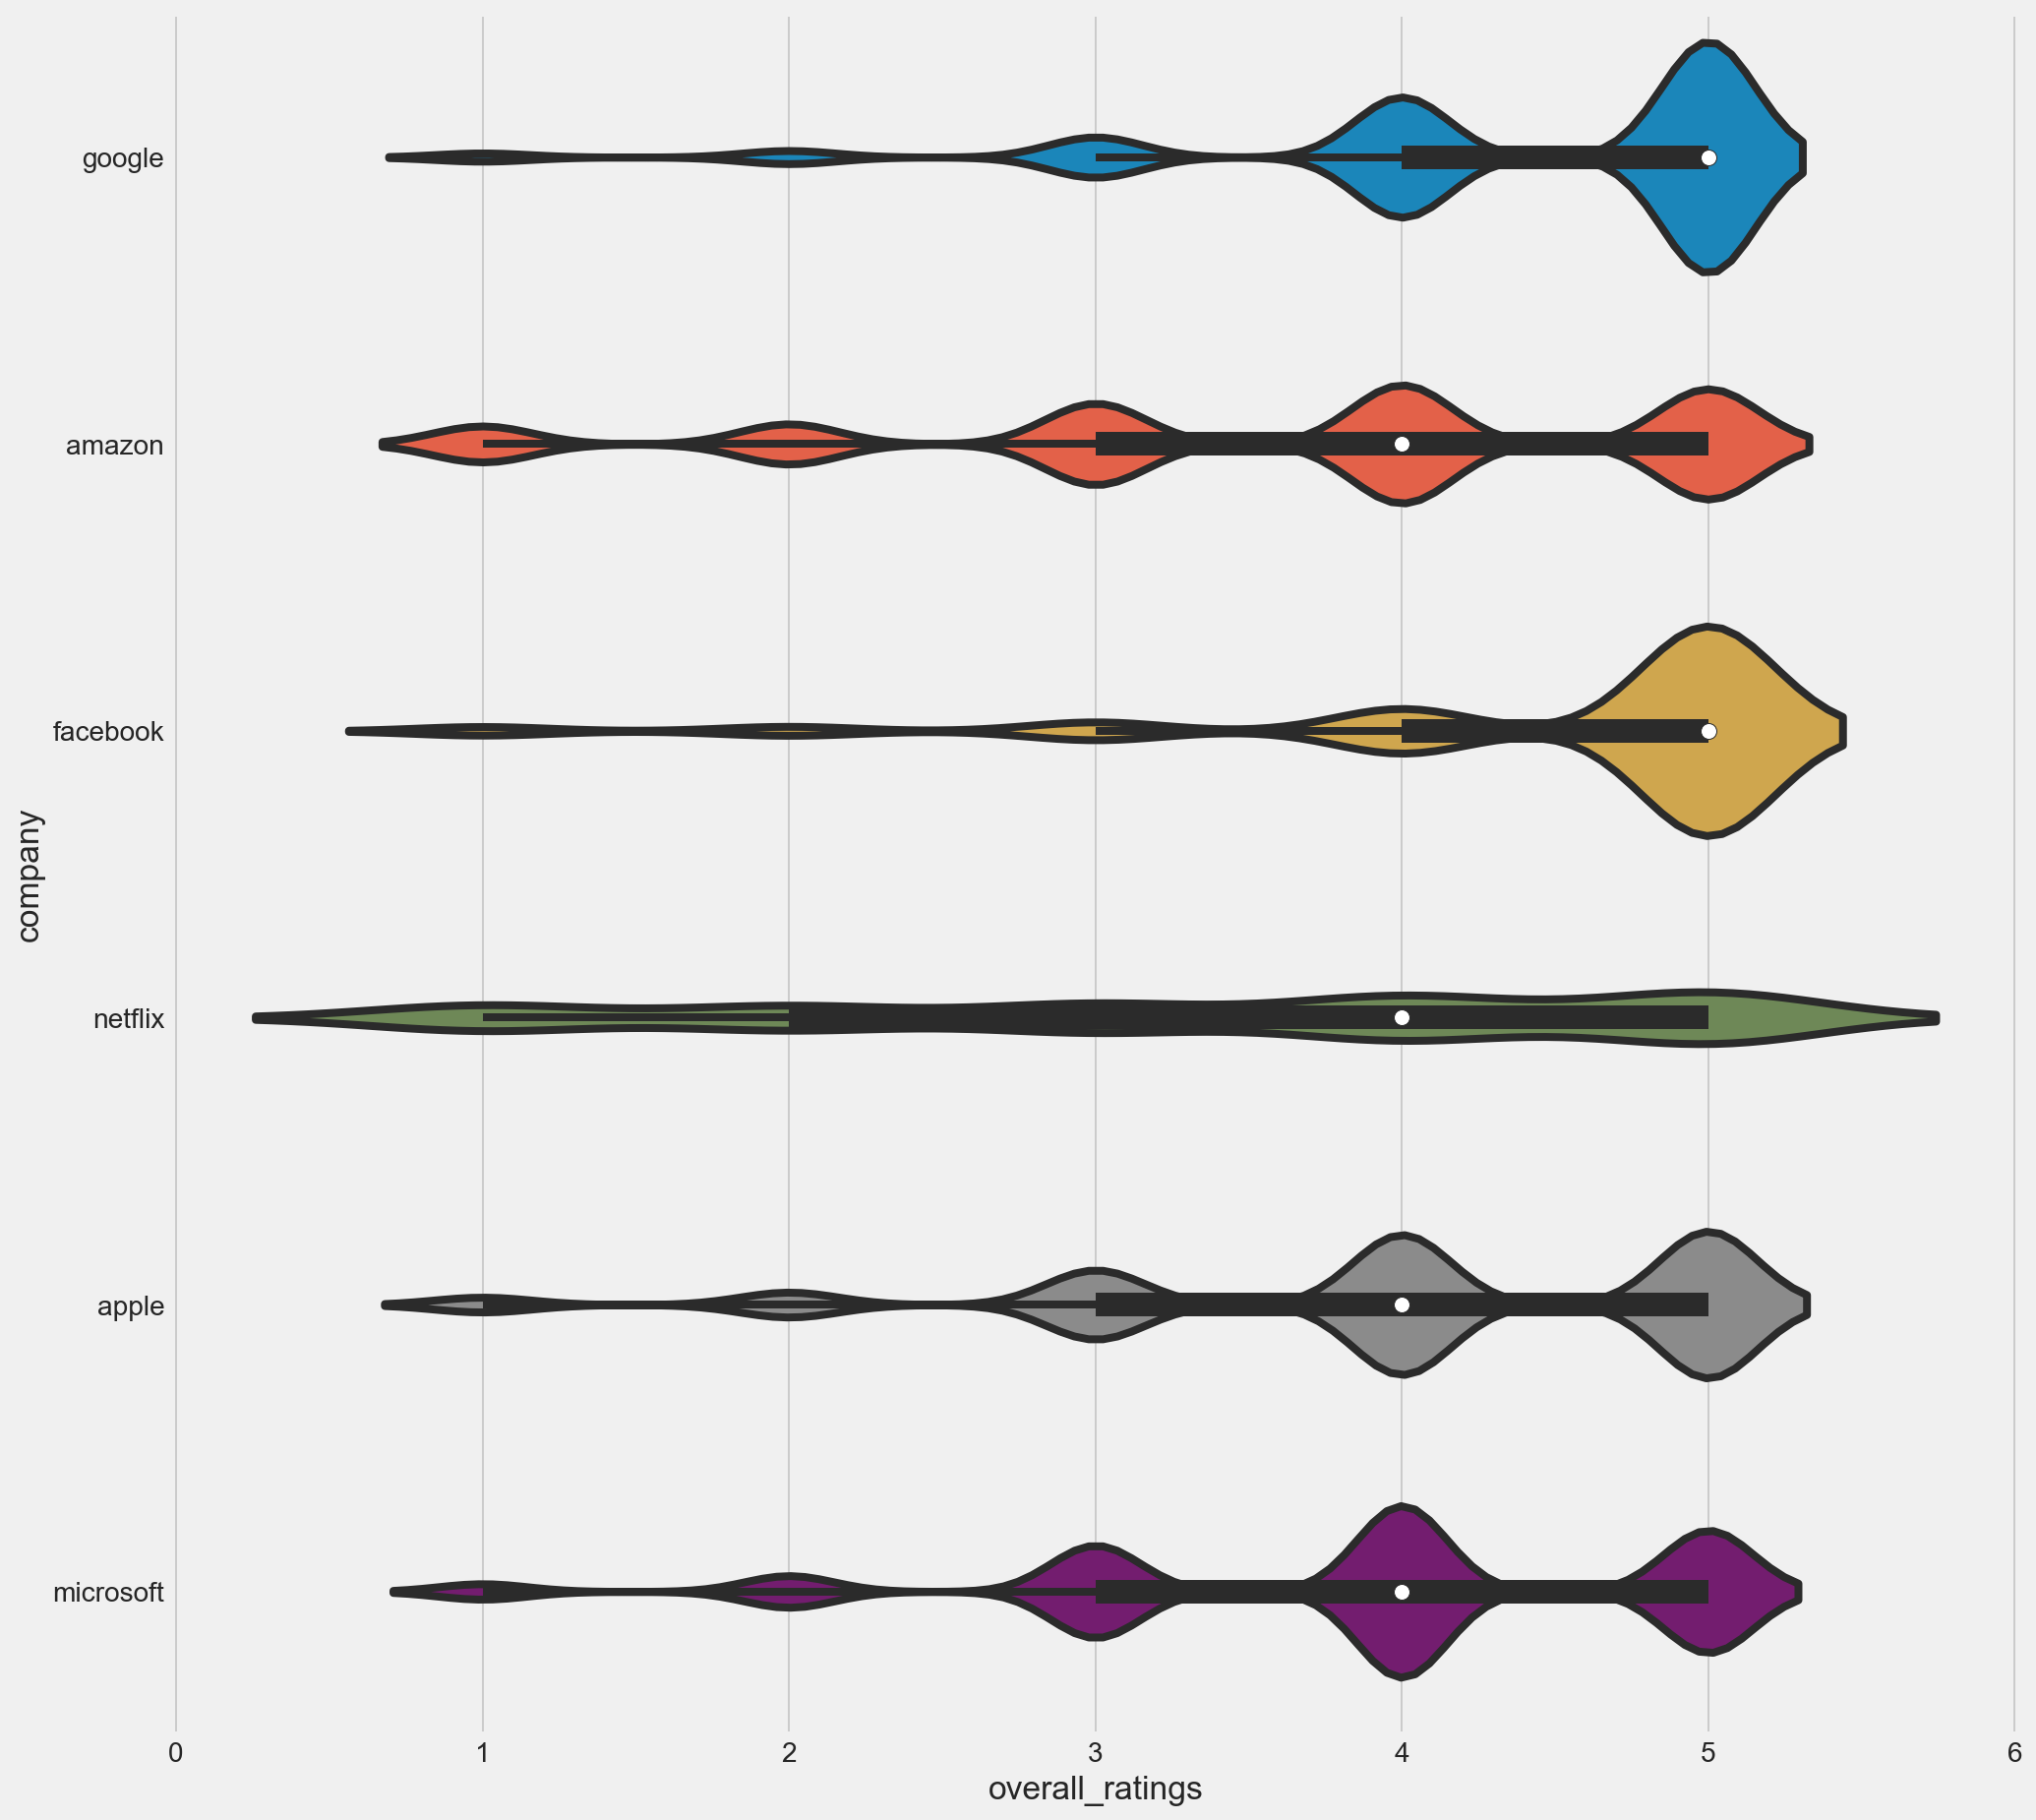

In [89]:

plt.figure(1 , figsize = (15, 15))
sns.violinplot( x=df["overall_ratings"],y=df["company"] )
#sns.plt.show()


### Overall Rating Distribution

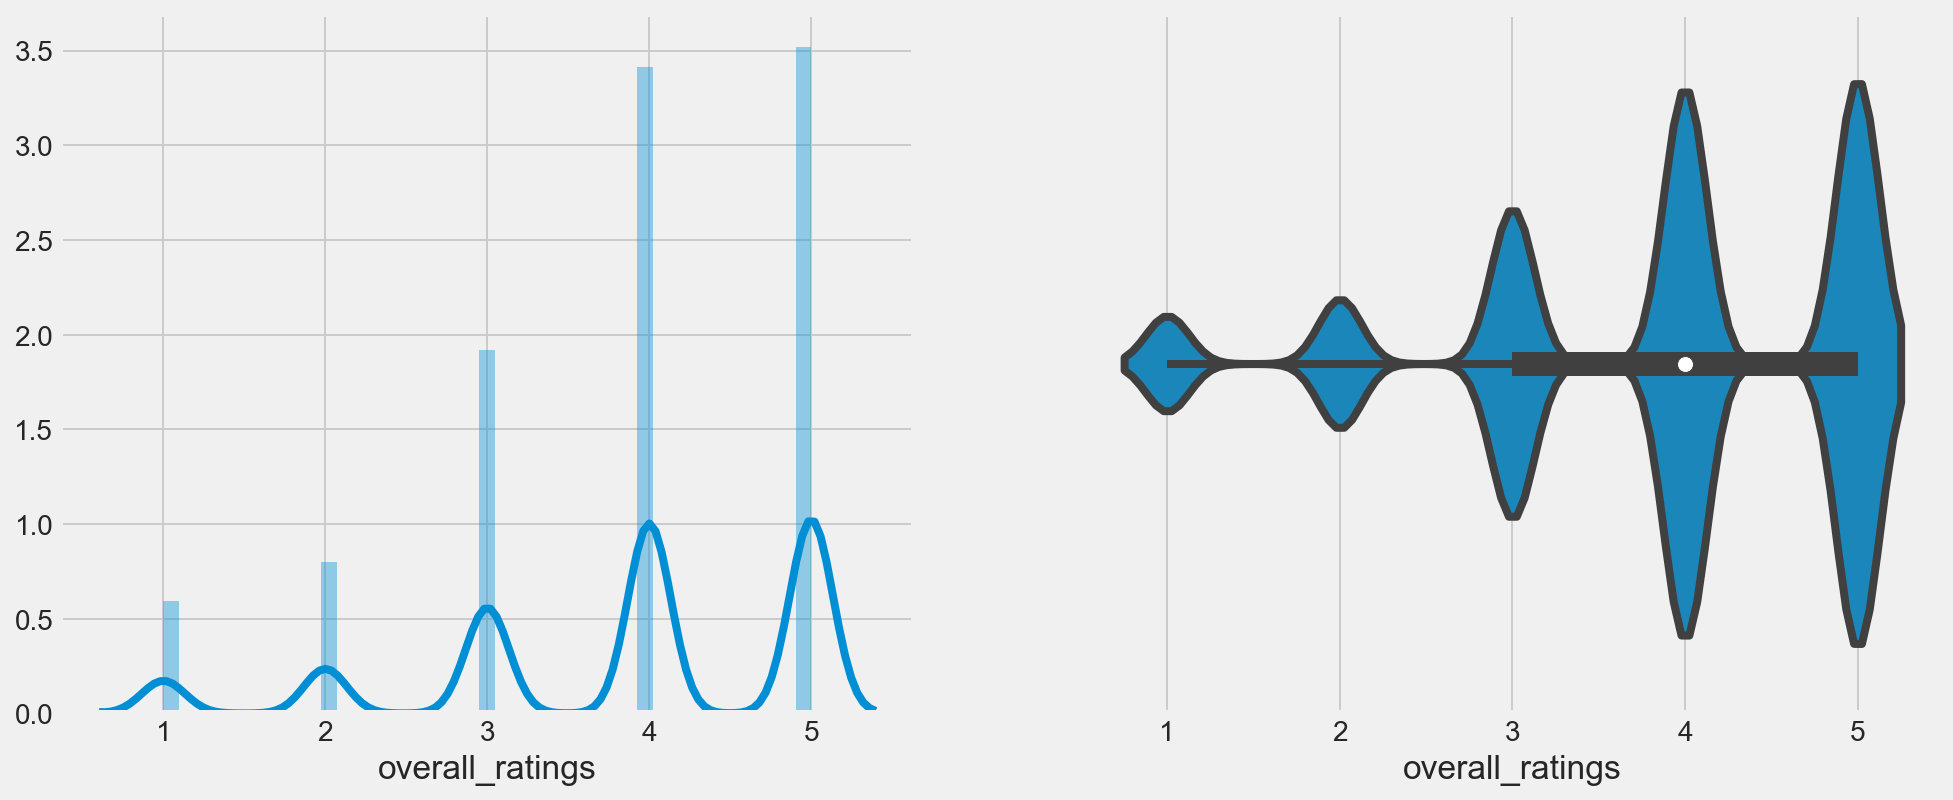

In [90]:
plt.figure(1 , figsize = (15 , 6))
plt.subplot(1 , 2  , 1)
sns.distplot(df['overall_ratings'])

plt.subplot(1 , 2 , 2)
sns.violinplot(x = 'overall_ratings' , data = df)

plt.show()

In [92]:


df1 = df[['company','overall_ratings','work_balance_stars','culture_values_stars','carrer_opportunities_stars','comp_benefit_stars','senior_mangemnet_stars']]
df1.head(5)

company  overall_ratings work_balance_stars culture_values_stars  \
0  google              5.0                4.0                  5.0   
1  google              4.0                2.0                  3.0   
2  google              5.0                5.0                  4.0   
3  google              5.0                2.0                  5.0   
4  google              5.0                5.0                  5.0   

  carrer_opportunities_stars comp_benefit_stars senior_mangemnet_stars  
0                        5.0                4.0                    5.0  
1                        3.0                5.0                    3.0  
2                        5.0                5.0                    4.0  
3                        5.0                4.0                    5.0  
4                        5.0                5.0                    5.0

In [94]:
features = ['work_balance_stars' , 'culture_values_stars' , 'carrer_opportunities_stars',
                     'comp_benefit_stars','senior_mangemnet_stars']
index_companies = ['google' , 'amazon' , 'facebook' , 'netflix' , 'apple' , 'microsoft']

## Reviews of the companies on glassdoor that were marked most useful by the users 

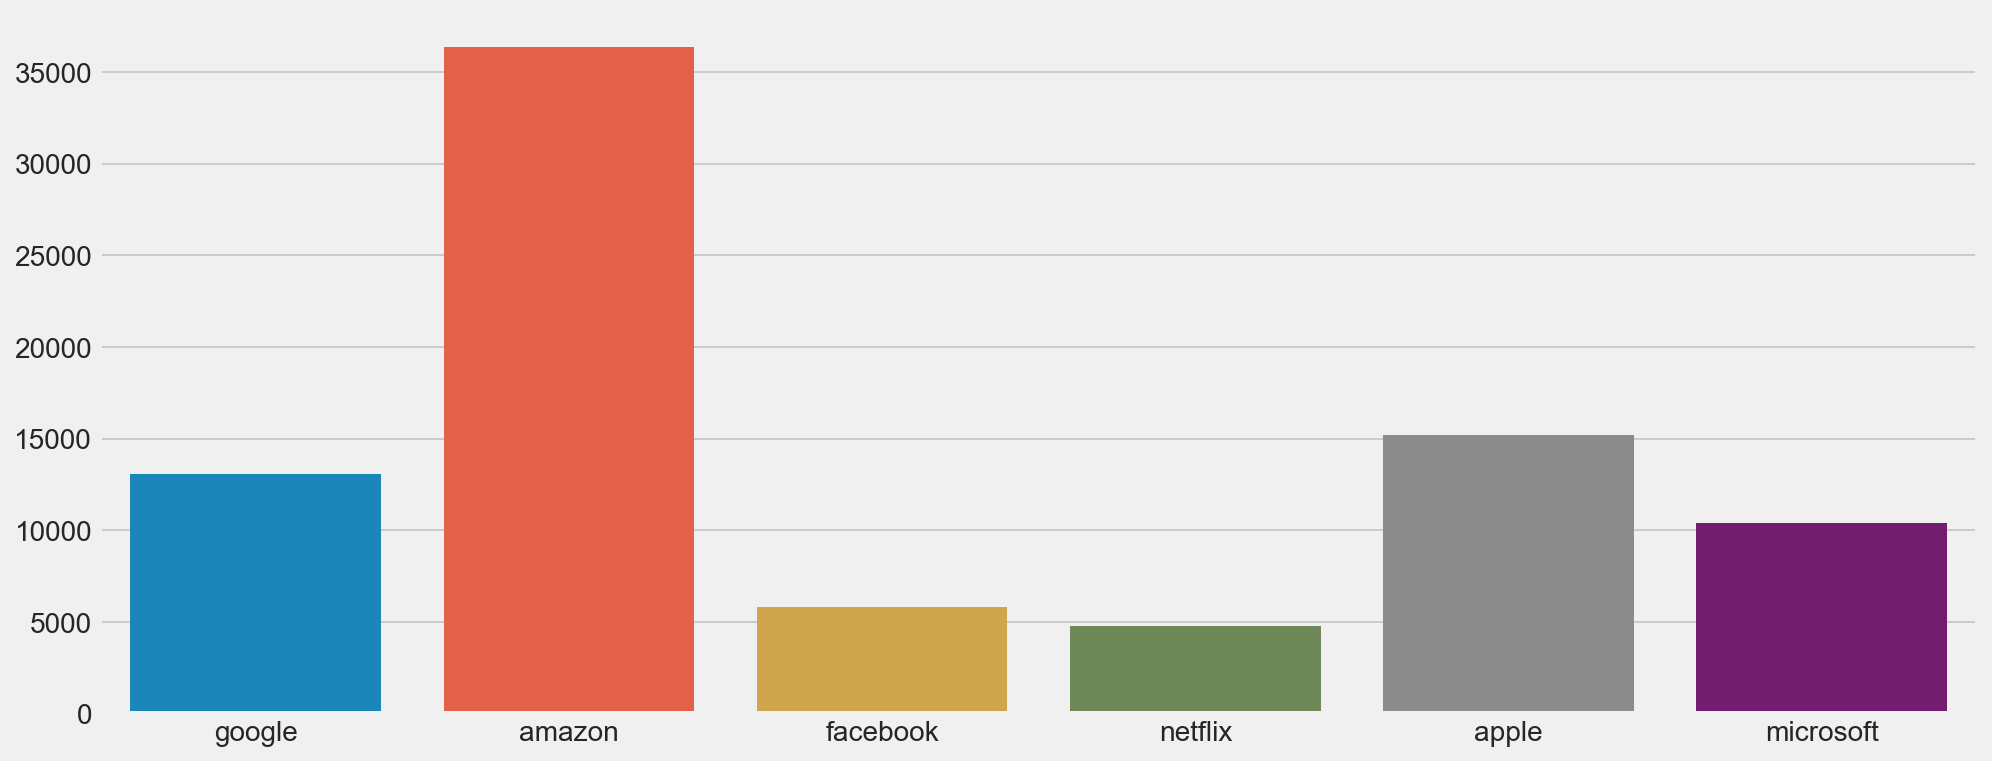

In [95]:
helpful_sum = []
for comp in index_companies:
    helpful_sum.append(np.sum(df['helpful_count'][df['company'] == comp]))
    
plt.figure(1 , figsize = (15 , 6))
sns.barplot(x = np.arange(6) , y = helpful_sum )
plt.xticks(np.arange(6) , index_companies)
plt.show()

In [96]:
import re
# Natural Language Tool Kit 
import nltk  
nltk.download('stopwords') 
# nltk.download('averaged_perceptron_tagger')
nltk.download('wordnet')
nltk.download('punkt')
# to remove stopword 
from nltk.corpus import stopwords 

# for Stemming propose  
from nltk.stem.porter import PorterStemmer 
from nltk.stem.snowball import SnowballStemmer
from nltk import pos_tag
from nltk.stem import WordNetLemmatizer
from nltk.corpus import wordnet

[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\hp\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package wordnet to
[nltk_data]     C:\Users\hp\AppData\Roaming\nltk_data...
[nltk_data]   Package wordnet is already up-to-date!
[nltk_data] Downloading package punkt to
[nltk_data]     C:\Users\hp\AppData\Roaming\nltk_data...
[nltk_data]   Package punkt is already up-to-date!


In [97]:
import string # for finding punctuation in text
from textblob import TextBlob
from wordcloud import WordCloud, STOPWORDS # this module is for making wordcloud in python
import re # regular expression

### data cleaning and sentipolarity

#### Cleaning the data by 
-removing the punctuations

-converting to lower case

-remiving all the stopwords

-replacing the strings to appropriate string

#### senti-polarity 
taking the polarity of the text data for summary,pros and cons and analysing the paragraph based on senti polarity value

Polarity : How negative or positive the paragraph is. 

Polarity = 0 = neutral 

Polarity < 0 = negative

Polarity > 0 = positive

In [99]:
###
def clean_txt(text):
    text = str(text)
    for n in range(10):
        text = text.replace(str(n) , '')
    text = text.lower()
    text = text.replace("(" , "")
    text = text.replace(")" , "")
    text = re.sub('\[.*?\]', '', text)
    text = re.sub('[%s]' % re.escape(string.punctuation), '', text)
    text = re.sub('\w*\d\w*', '', text)
    text = re.sub('[‘’“”…]', '', text)
    text = re.sub(r'[^\x00-\x7f]', '', text)
    text = text.replace( " \ " , "" )
    text = text.replace("/" , "")
    
    return text

'''
    Takes in a string of text, then performs the following:
    1. Performs case normalization
    2. Remove all punctuation
    3. Remove all stopwords
    4. Return the cleaned text as a list of words
    '''

# let's find out which stopwords need to remove. We'll use english stopwords.
i = nltk.corpus.stopwords.words('english')
# punctuations to remove
j = list(string.punctuation)
# finally let's combine all of these
stopwords = set(i).union(j)
df['text_clear_sum'] = df['summary'].apply(clean_txt)
df['text_clear_pros'] = df['pros'].apply(clean_txt)
df['text_clear_cons'] = df['cons'].apply(clean_txt)
df['text_clear_advice']= df['advice_to_mgmt'].apply(clean_txt)


def sentiment(text):
    sentiment = TextBlob(text)
    return sentiment.sentiment.polarity


df['senti_polarity_summ'] = df['text_clear_sum'].apply(sentiment)
df['senti_polarity_pros'] = df['text_clear_pros'].apply(sentiment)
df['senti_polarity_cons'] = df['text_clear_cons'].apply(sentiment)
df['senti_polarity_advice']=df['text_clear_advice'].apply(sentiment)

In [42]:
df.senti_polarity_pros.describe()

count    67529.000000
mean         0.412122
std          0.276197
min         -1.000000
25%          0.214286
50%          0.416250
75%          0.616667
max          1.000000
Name: senti_polarity_pros, dtype: float64

In [44]:
df.senti_polarity_cons.describe()

count    67529.000000
mean         0.027724
std          0.259377
min         -1.000000
25%         -0.080556
50%          0.000000
75%          0.156250
max          1.000000
Name: senti_polarity_cons, dtype: float64

In [45]:
df.senti_polarity_summ.describe()

count    67529.000000
mean         0.262780
std          0.384249
min         -1.000000
25%          0.000000
50%          0.000000
75%          0.600000
max          1.000000
Name: senti_polarity_summ, dtype: float64

# Plotting the senti polarity values of summary ,pros and cons for different comapnies 

## distribution of sentipolarity values of summary

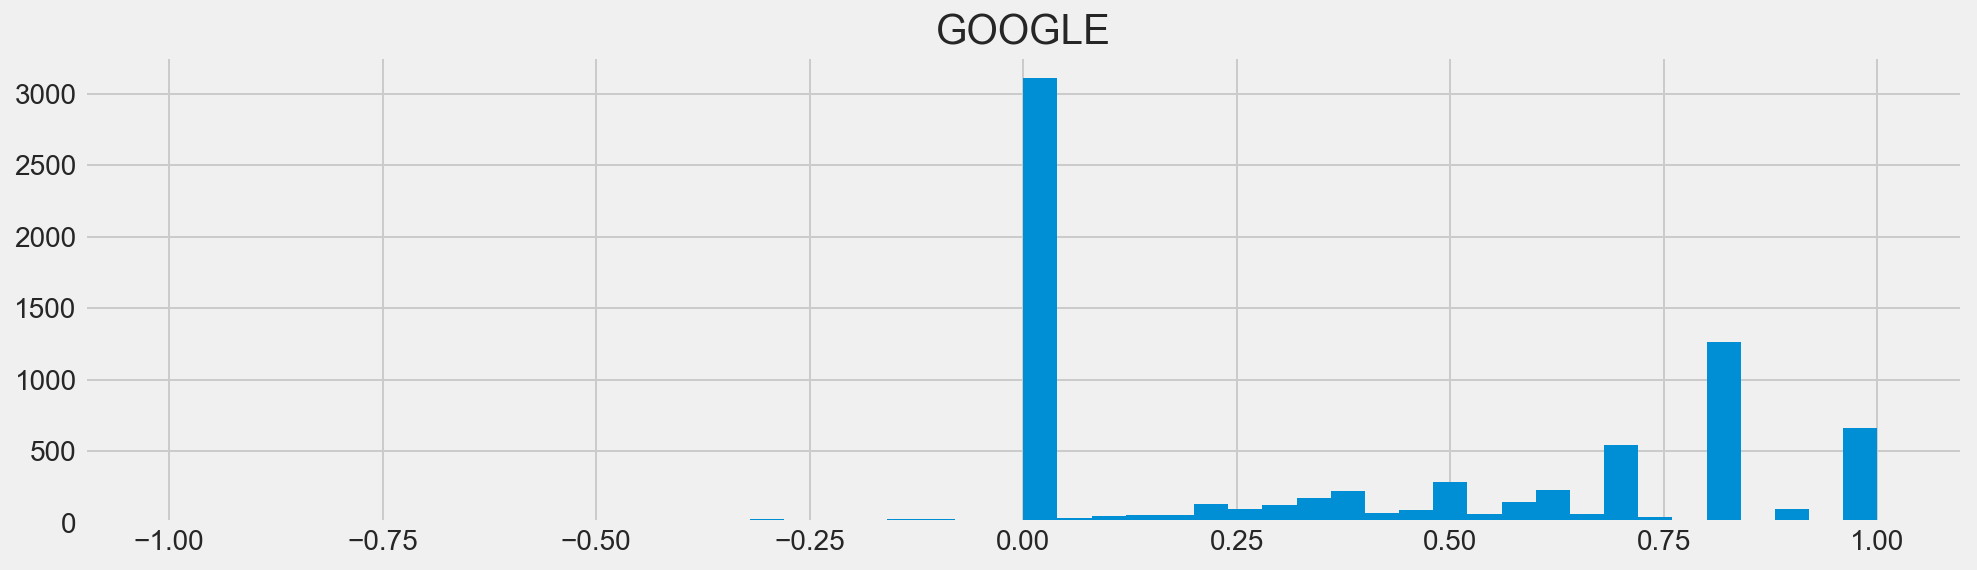

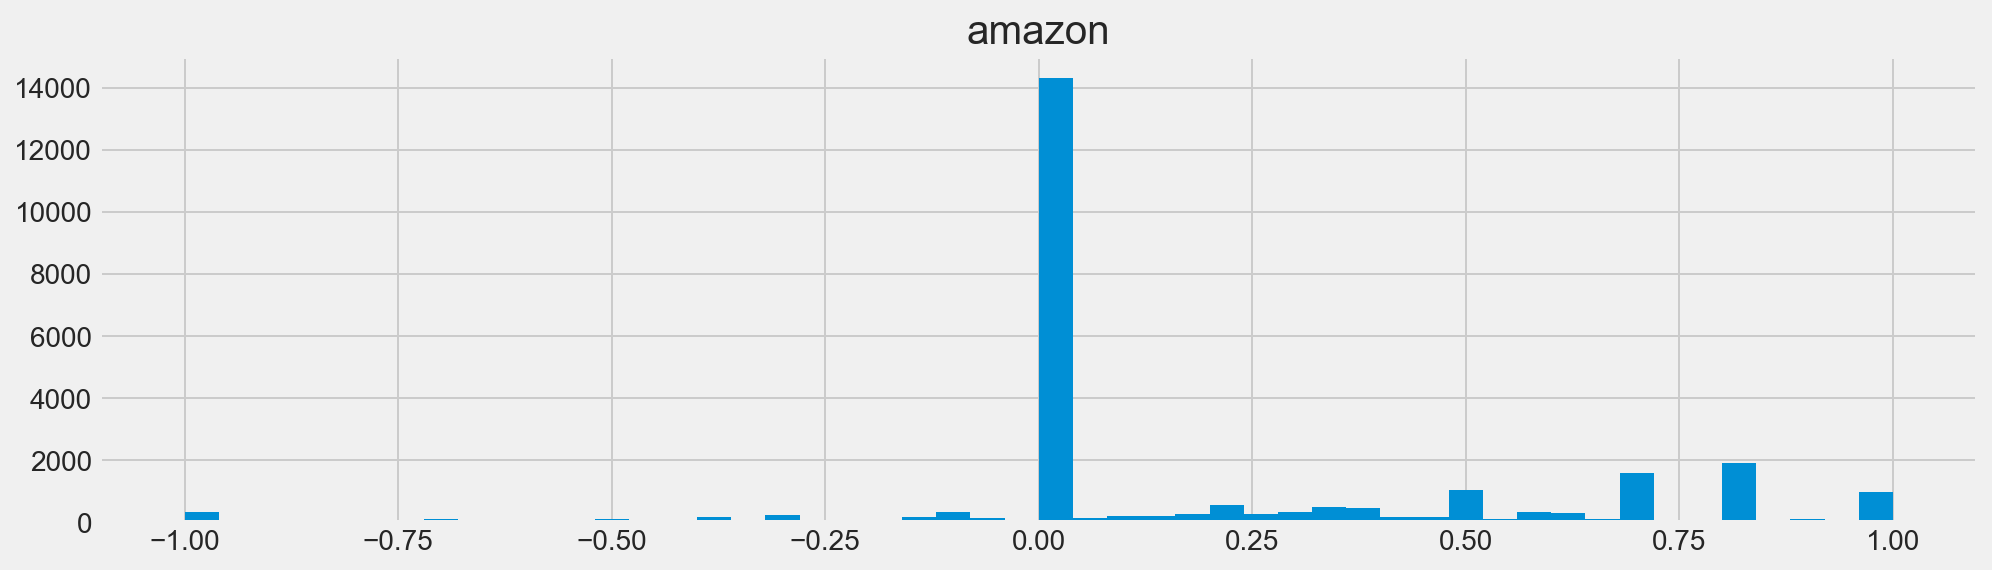

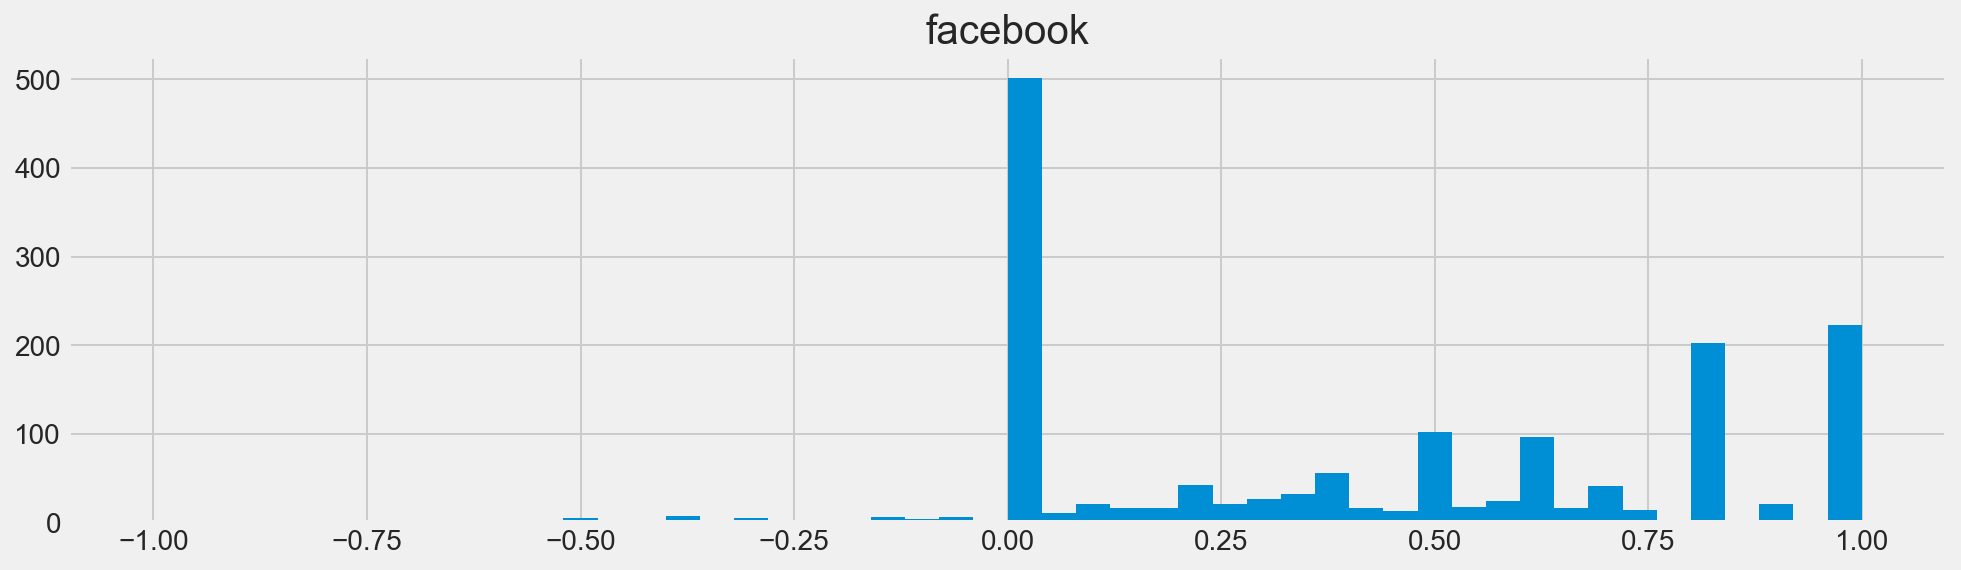

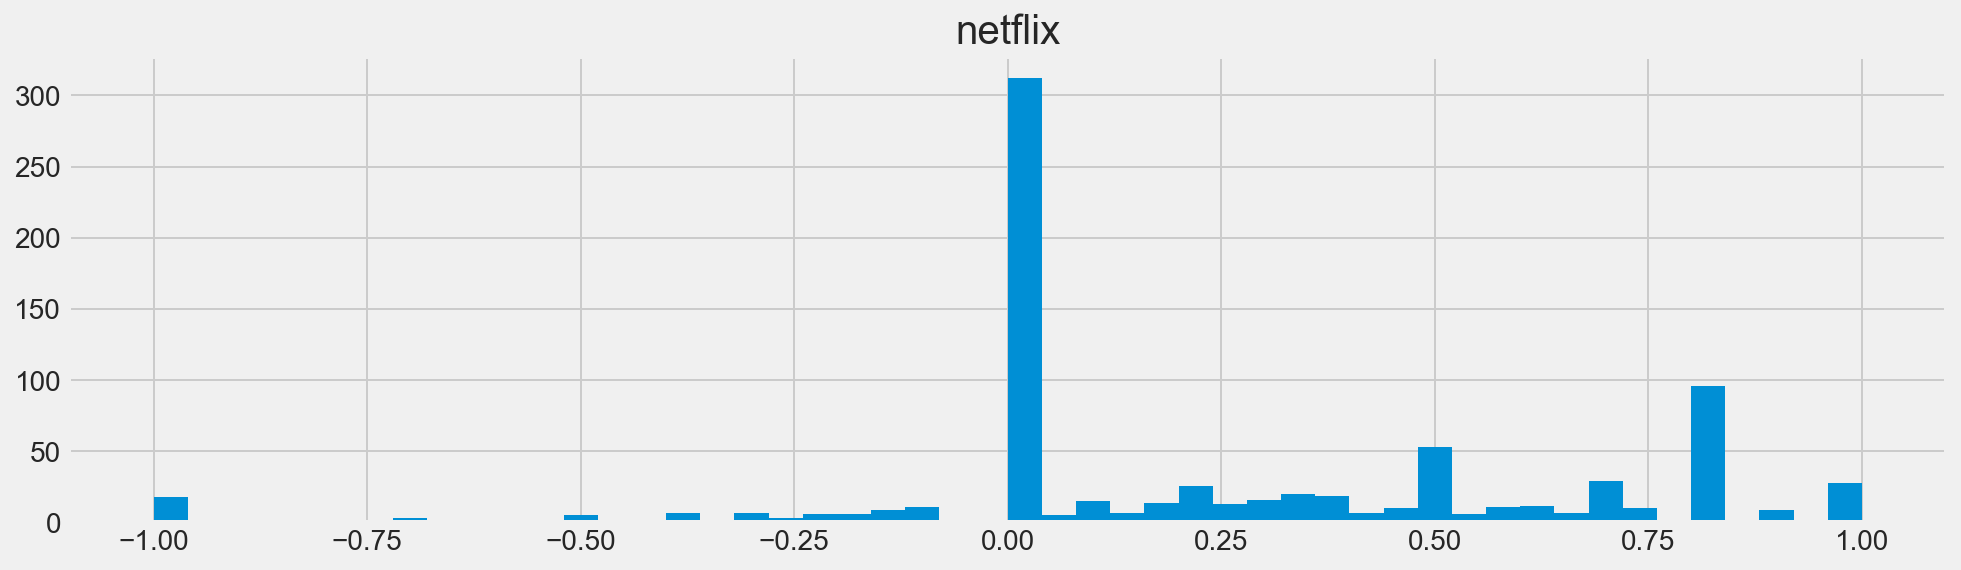

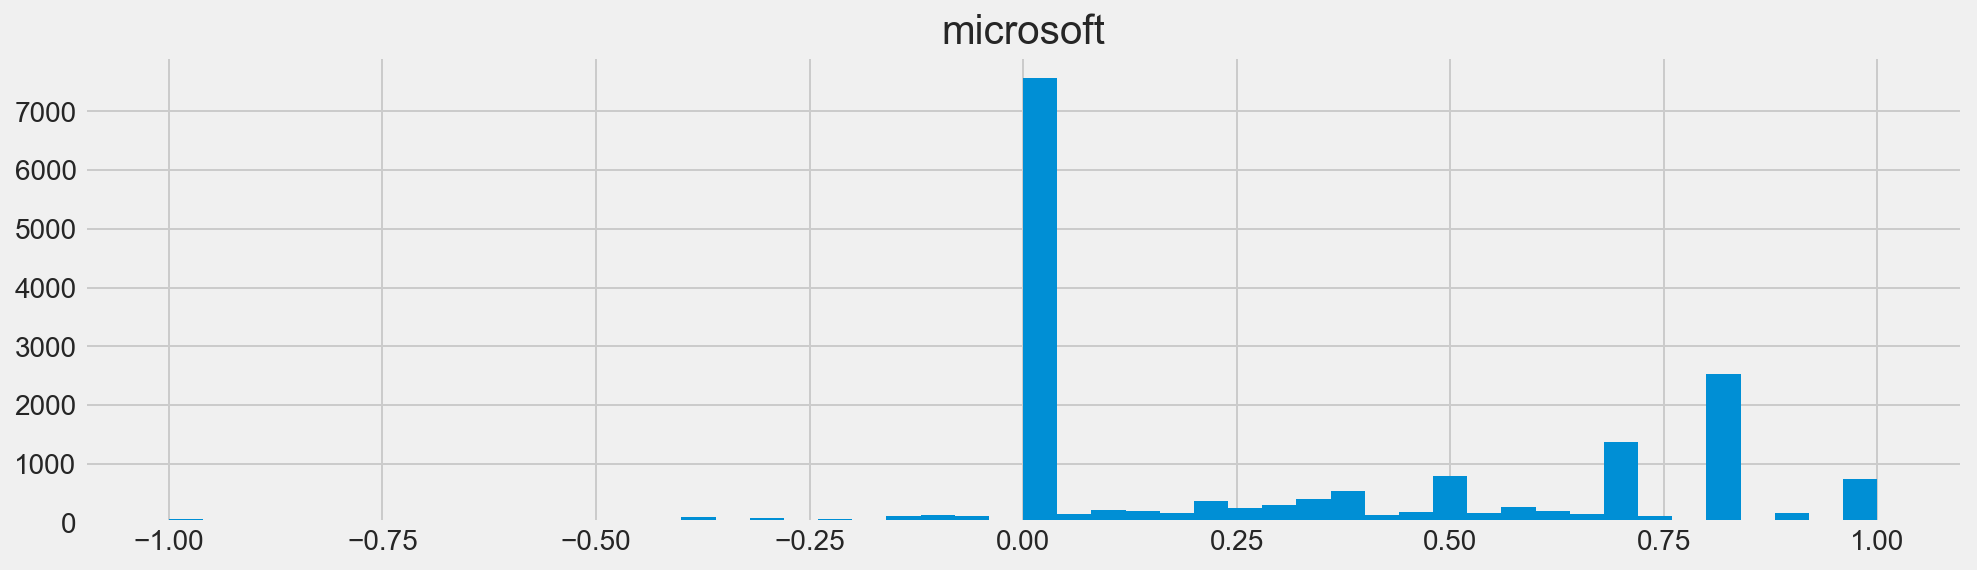

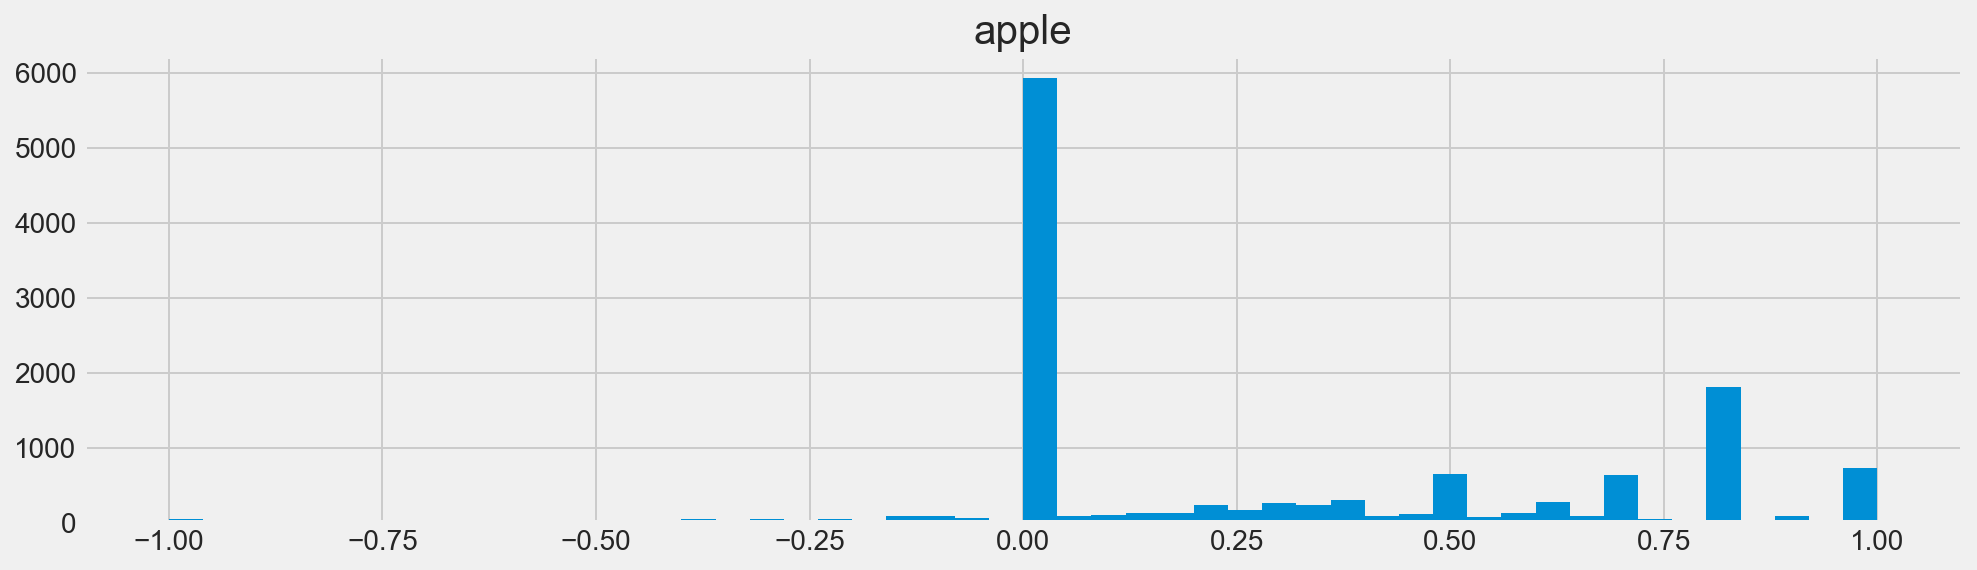

In [197]:
plt.figure(1, figsize = (15 , 4))
plt.hist(df['senti_polarity_summ'][df['company'] == 'google'] , bins = 50 )
plt.title('GOOGLE')
plt.show()

plt.figure(1, figsize = (15 , 4))
plt.hist(df['senti_polarity_summ'][df['company'] == 'amazon'] , bins = 50 )
plt.title('amazon')
plt.show()

plt.figure(1, figsize = (15 , 4))
plt.hist(df['senti_polarity_summ'][df['company'] == 'facebook'] , bins = 50 )
plt.title('facebook')
plt.show()

plt.figure(1, figsize = (15 , 4))
plt.hist(df['senti_polarity_summ'][df['company'] == 'netflix'] , bins = 50 )
plt.title('netflix')
plt.show()

plt.figure(1, figsize = (15 , 4))
plt.hist(df['senti_polarity_summ'][df['company'] == 'microsoft'] , bins = 50 )
plt.title('microsoft')
plt.show()

plt.figure(1, figsize = (15 , 4))
plt.hist(df['senti_polarity_summ'][df['company'] == 'apple'] , bins = 50 )
plt.title('apple')
plt.show()

In [202]:
df_sort = df.groupby(df.company)['senti_polarity_summ'].mean().sort_values(ascending=True)
df_sort

company
amazon       0.184829
netflix      0.242521
apple        0.291996
microsoft    0.299795
google       0.365940
facebook     0.406209
Name: senti_polarity_summ, dtype: float64

## distribution of sentipolarity values of pros

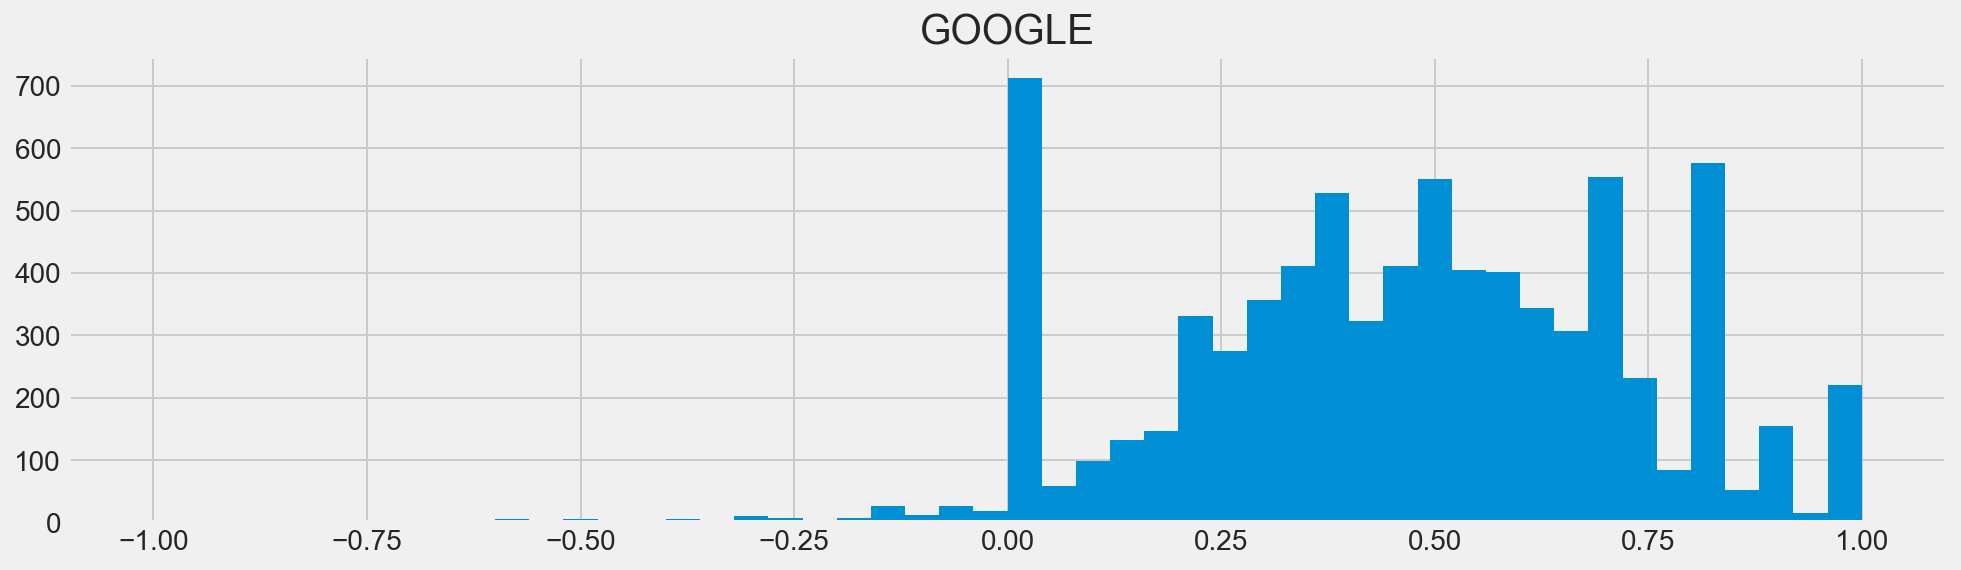

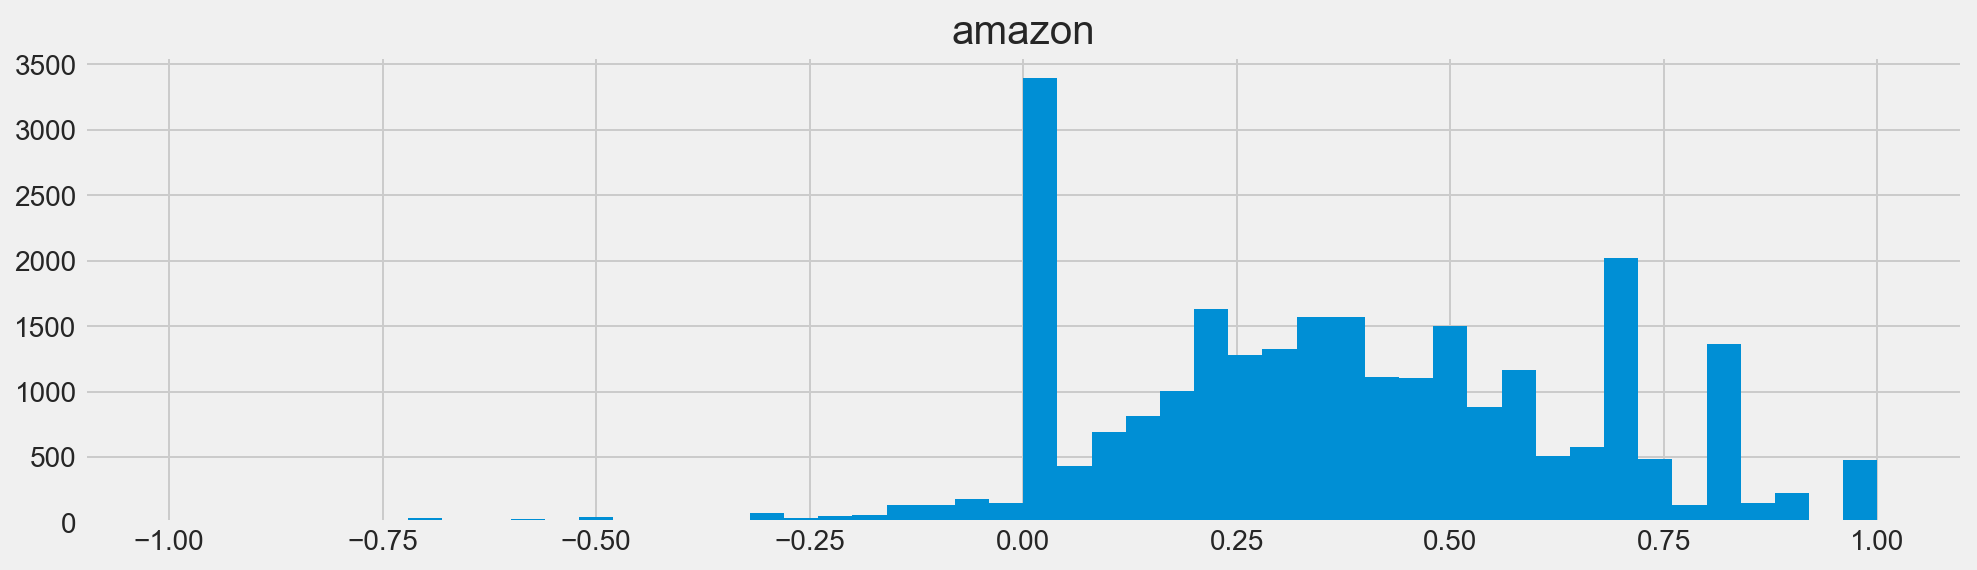

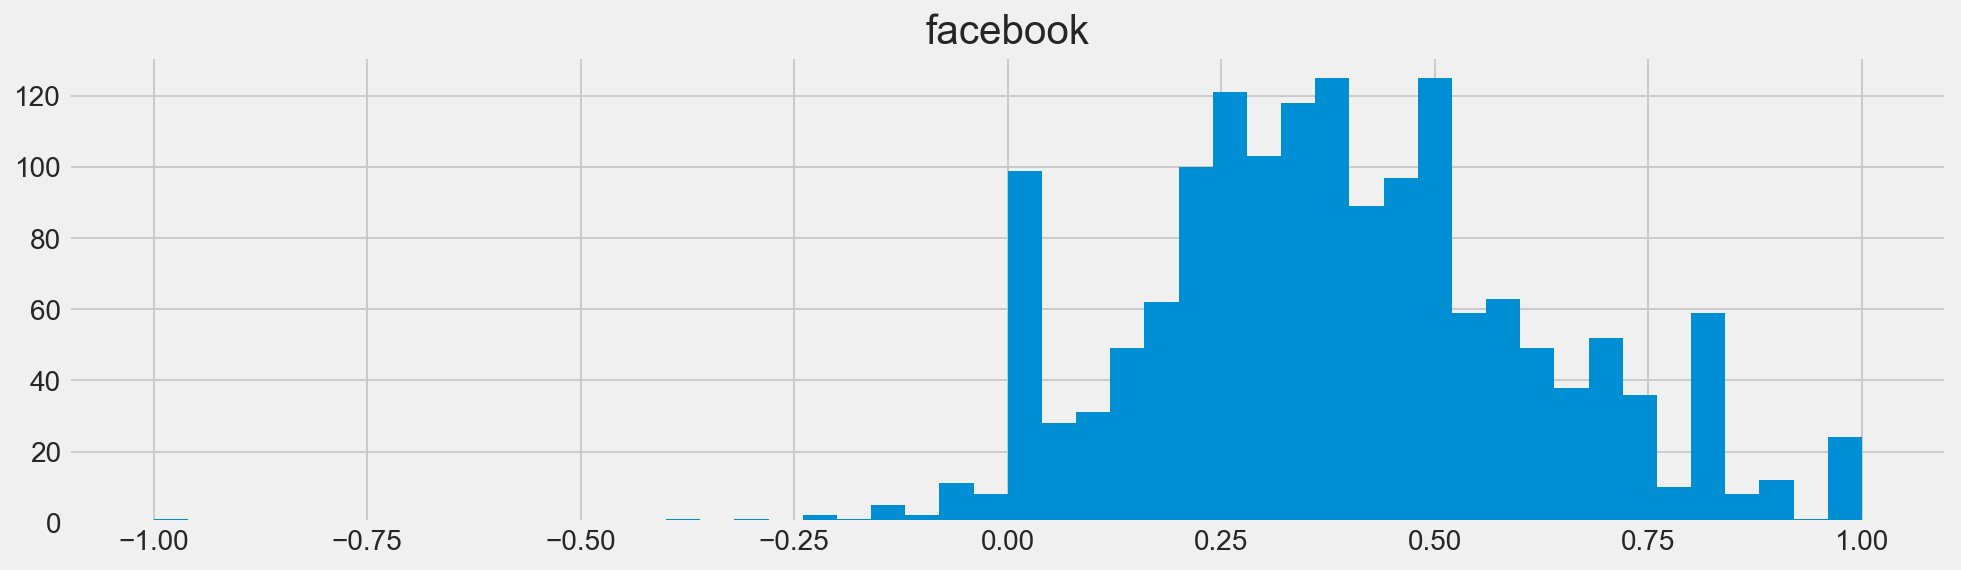

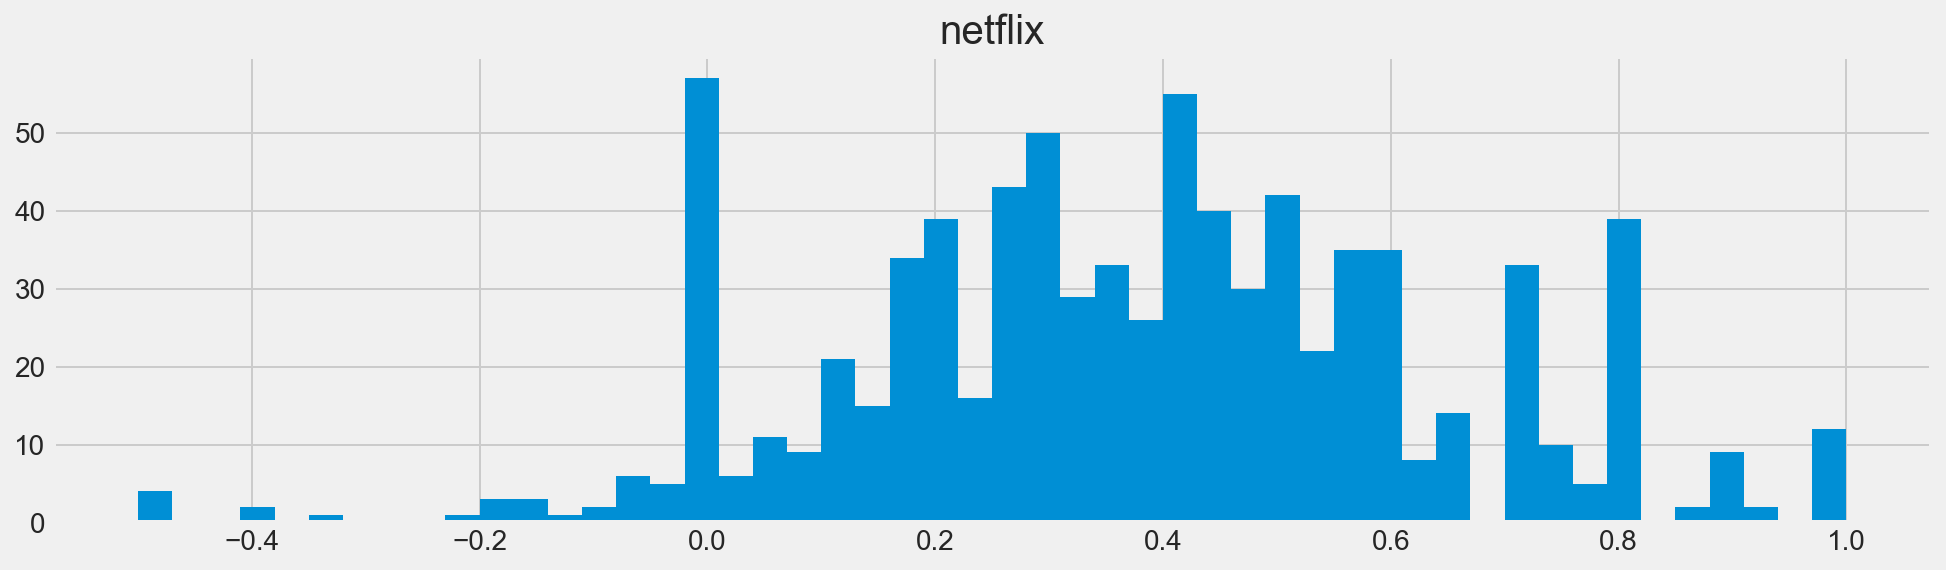

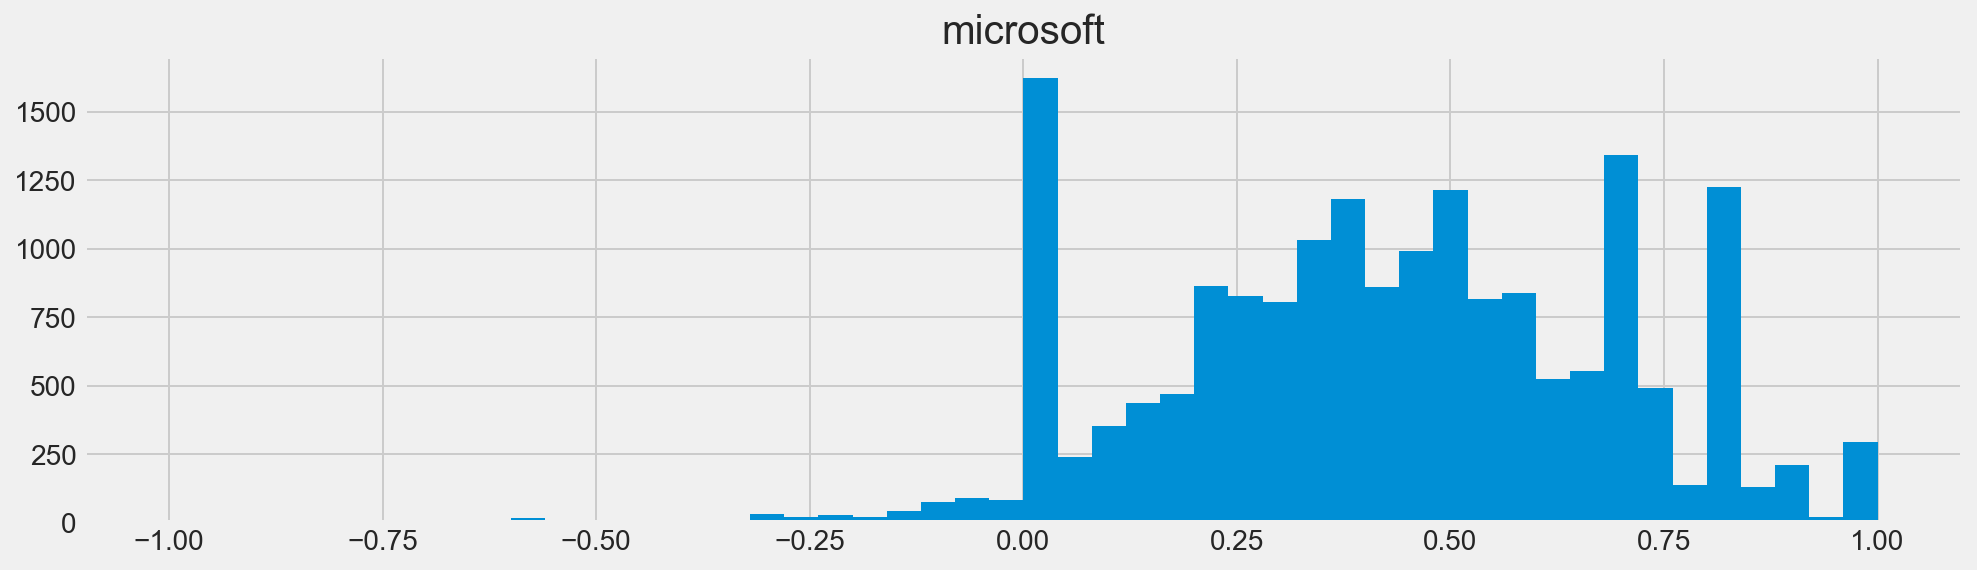

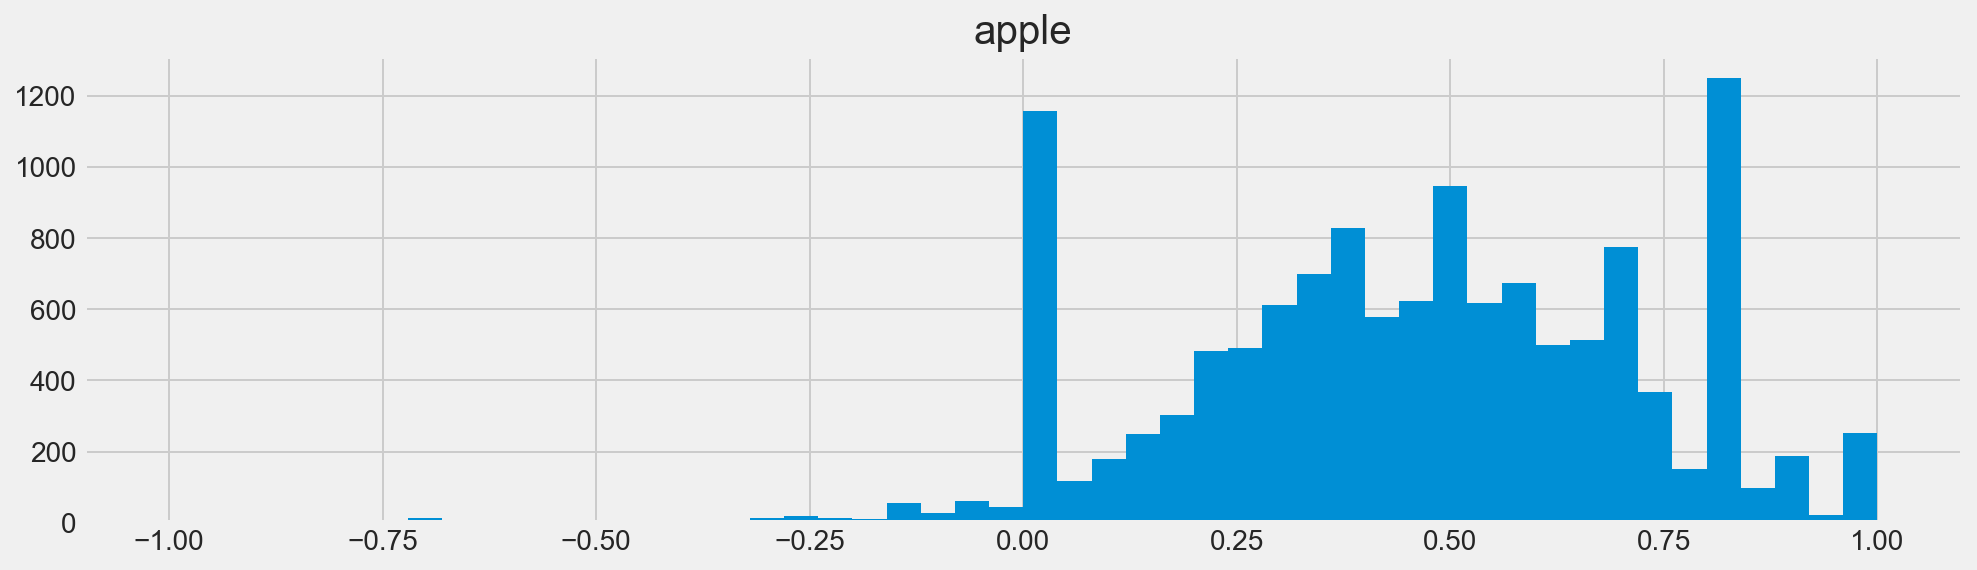

In [195]:
plt.figure(1, figsize = (15 , 4))
plt.hist(df['senti_polarity_pros'][df['company'] == 'google'] , bins = 50 )
plt.title('GOOGLE')
plt.show()

plt.figure(1, figsize = (15 , 4))
plt.hist(df['senti_polarity_pros'][df['company'] == 'amazon'] , bins = 50 )
plt.title('amazon')
plt.show()

plt.figure(1, figsize = (15 , 4))
plt.hist(df['senti_polarity_pros'][df['company'] == 'facebook'] , bins = 50 )
plt.title('facebook')
plt.show()

plt.figure(1, figsize = (15 , 4))
plt.hist(df['senti_polarity_pros'][df['company'] == 'netflix'] , bins = 50 )
plt.title('netflix')
plt.show()

plt.figure(1, figsize = (15 , 4))
plt.hist(df['senti_polarity_pros'][df['company'] == 'microsoft'] , bins = 50 )
plt.title('microsoft')
plt.show()
plt.figure(1, figsize = (15 , 4))
plt.hist(df['senti_polarity_pros'][df['company'] == 'apple'] , bins = 50 )
plt.title('apple')
plt.show()

In [204]:
df_sort = df.groupby(df.company)['senti_polarity_pros'].mean().sort_values(ascending=True)
df_sort

company
amazon       0.370378
netflix      0.378620
facebook     0.390067
microsoft    0.426222
apple        0.453331
google       0.460596
Name: senti_polarity_pros, dtype: float64

## distribution of sentipolarity values of cons

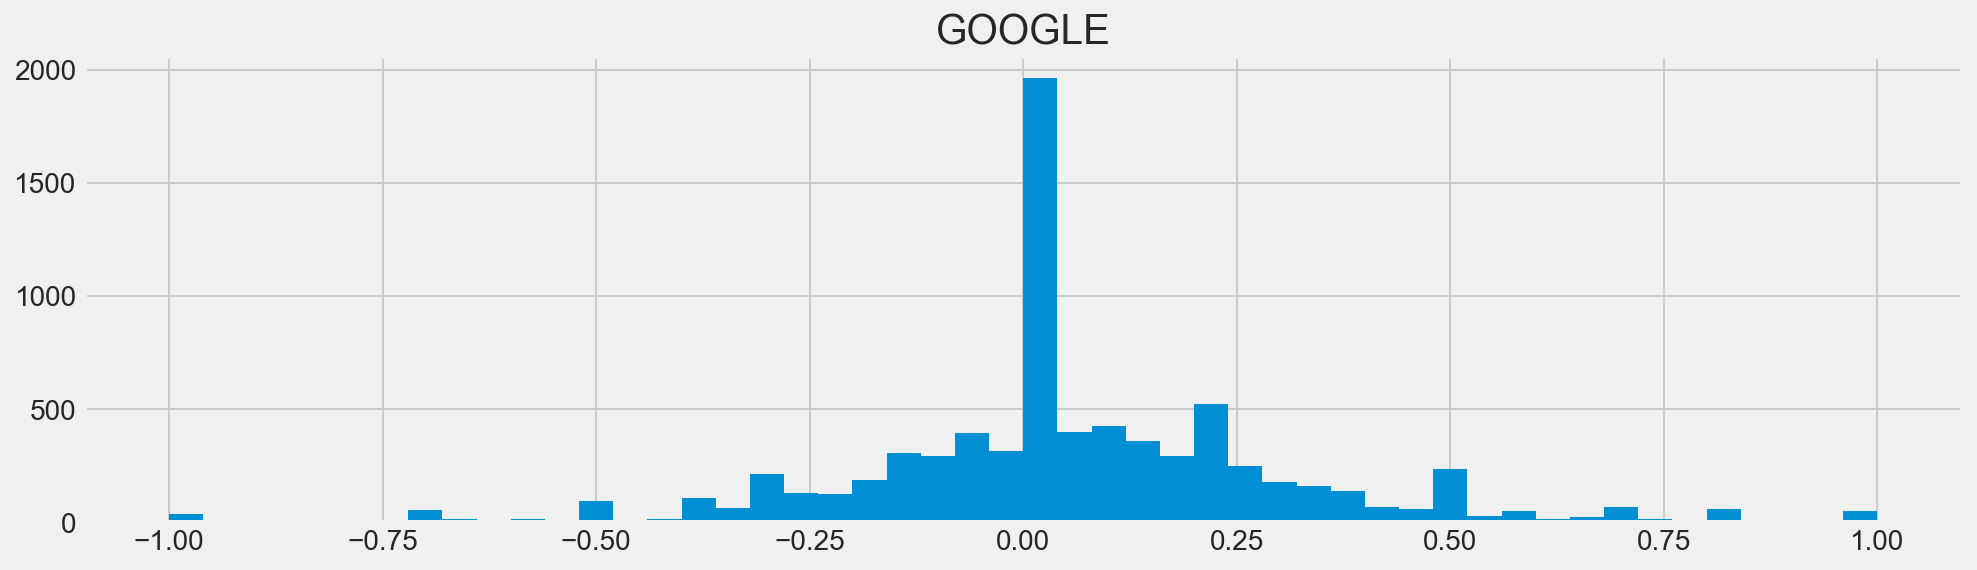

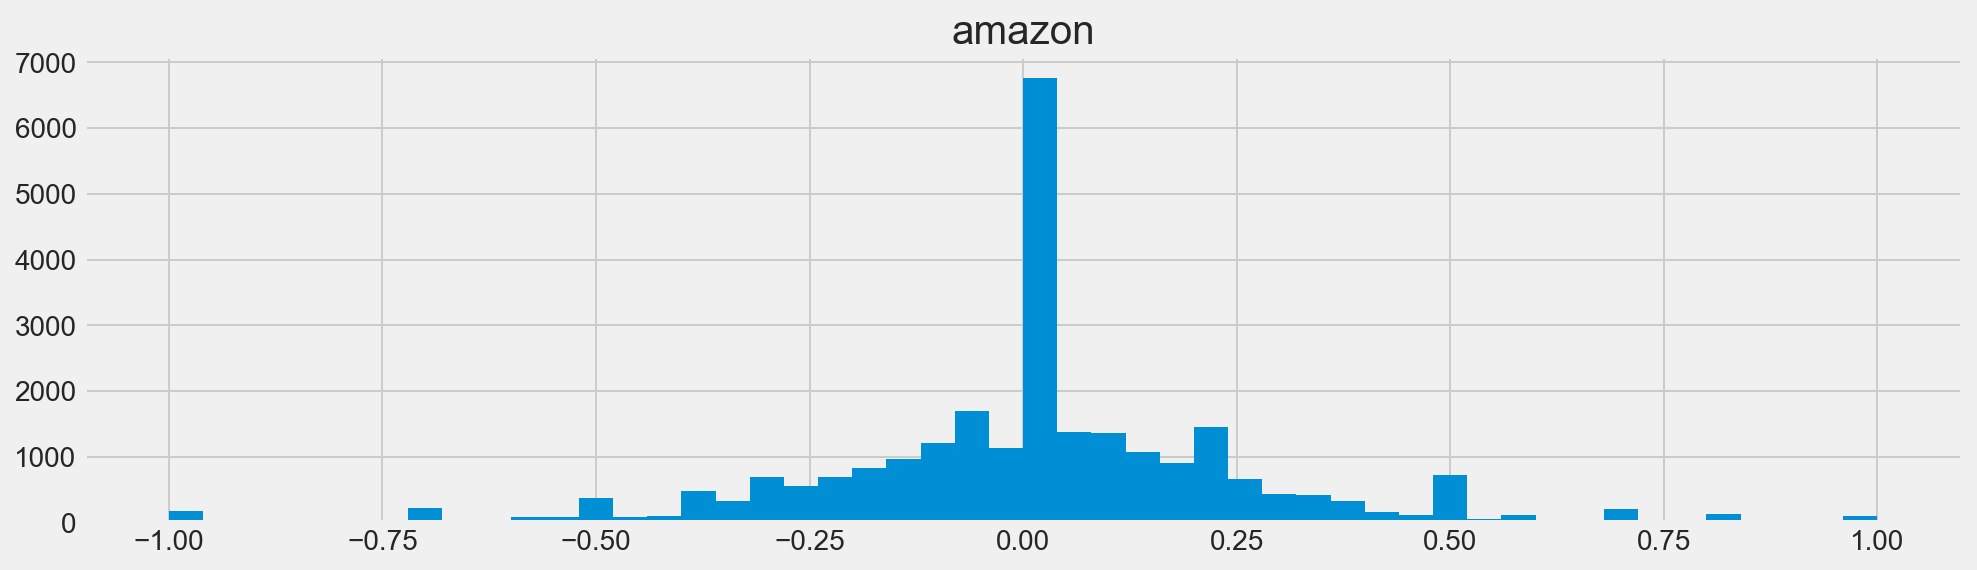

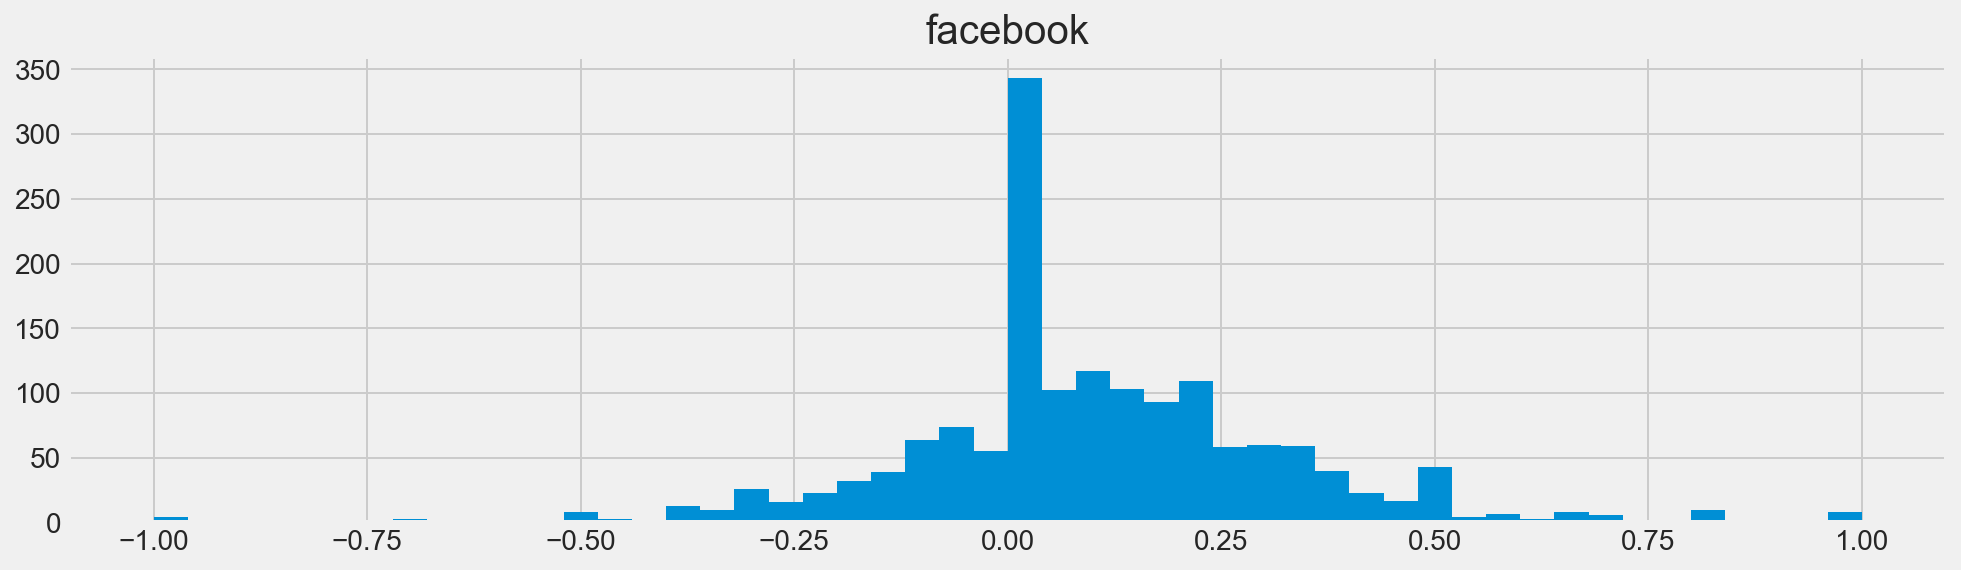

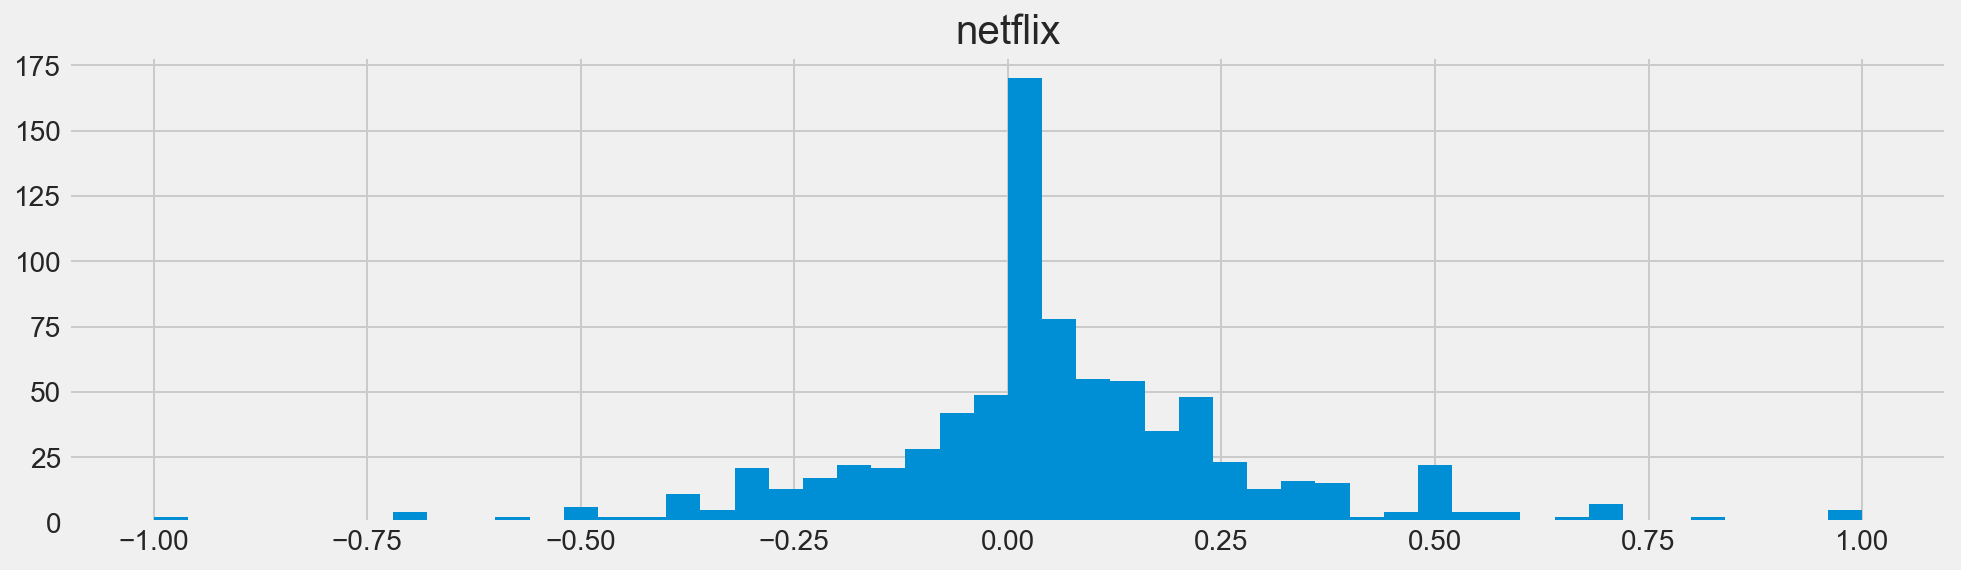

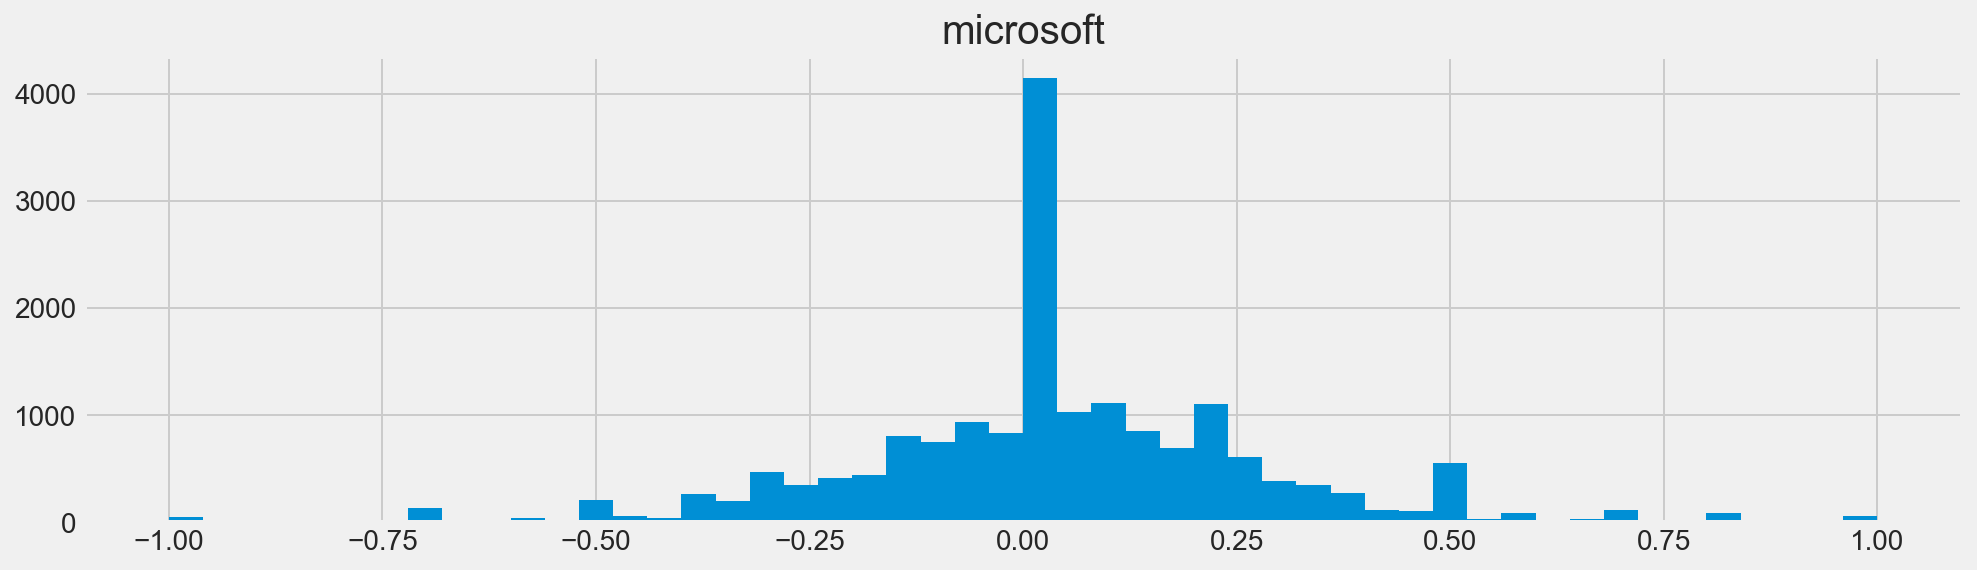

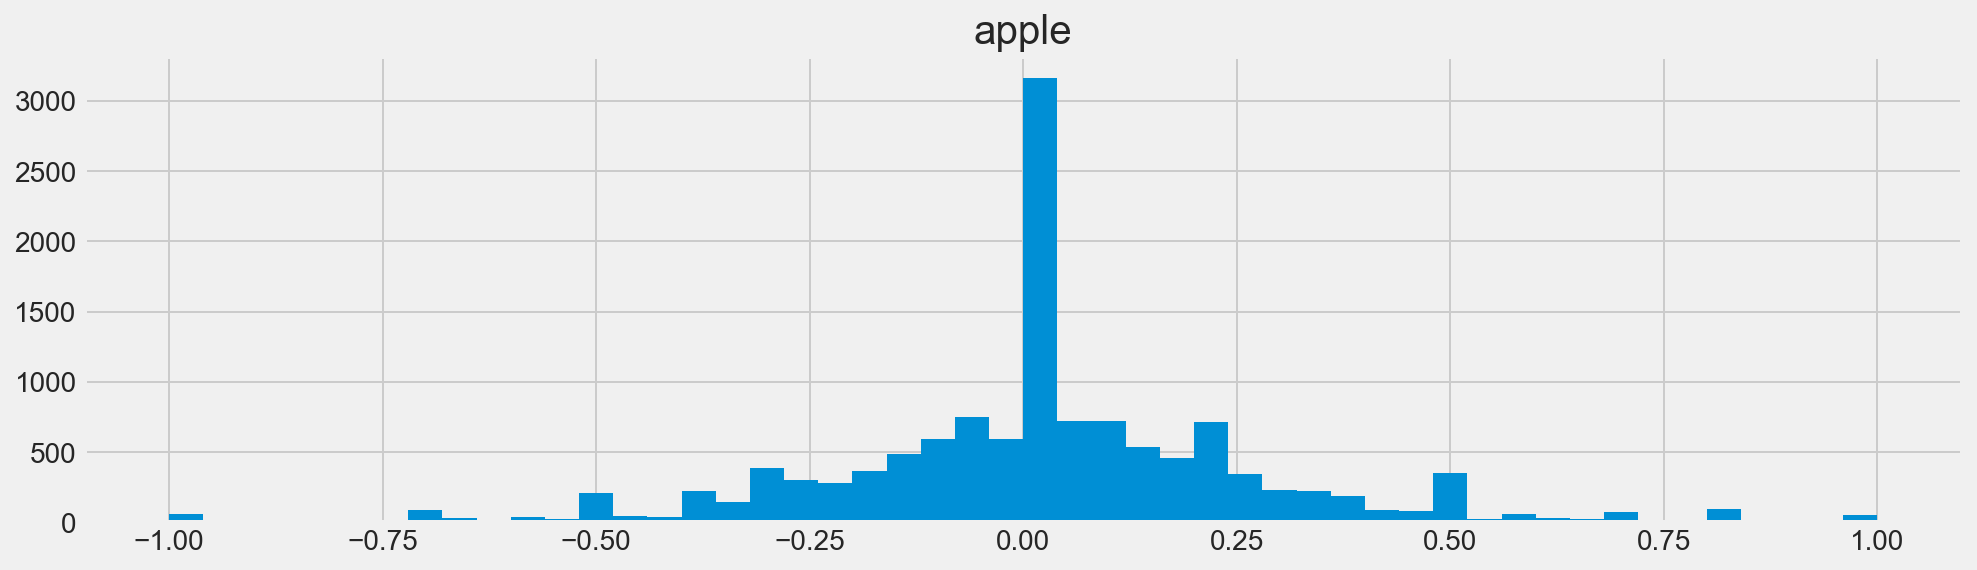

In [196]:
plt.figure(1, figsize = (15 , 4))
plt.hist(df['senti_polarity_cons'][df['company'] == 'google'] , bins = 50 )
plt.title('GOOGLE')
plt.show()

plt.figure(1, figsize = (15 , 4))
plt.hist(df['senti_polarity_cons'][df['company'] == 'amazon'] , bins = 50 )
plt.title('amazon')
plt.show()

plt.figure(1, figsize = (15 , 4))
plt.hist(df['senti_polarity_cons'][df['company'] == 'facebook'] , bins = 50 )
plt.title('facebook')
plt.show()

plt.figure(1, figsize = (15 , 4))
plt.hist(df['senti_polarity_cons'][df['company'] == 'netflix'] , bins = 50 )
plt.title('netflix')
plt.show()

plt.figure(1, figsize = (15 , 4))
plt.hist(df['senti_polarity_cons'][df['company'] == 'microsoft'] , bins = 50 )
plt.title('microsoft')
plt.show()

plt.figure(1, figsize = (15 , 4))
plt.hist(df['senti_polarity_cons'][df['company'] == 'apple'] , bins = 50 )
plt.title('apple')
plt.show()

In [205]:
df_sort = df.groupby(df.company)['senti_polarity_cons'].mean().sort_values(ascending=True)
df_sort

company
amazon       0.010554
apple        0.023239
microsoft    0.036336
netflix      0.054375
google       0.056569
facebook     0.097112
Name: senti_polarity_cons, dtype: float64

## HEATMAPS

In [137]:
def plot_heatmap(dataCol1, dataCol2, heading):
    grpby = df.groupby([dataCol1, dataCol2]).size()
    pct = grpby.groupby(level=1).apply(lambda x:100 * x / float(x.sum()))
    unstk_data = pct.unstack()
    fig, ax = plt.subplots()
    sns.heatmap(unstk_data, annot=True, linewidths=.5, ax=ax, cmap='YlGn')
    ax.set_title(heading)
    fig.tight_layout()
    plt.show()

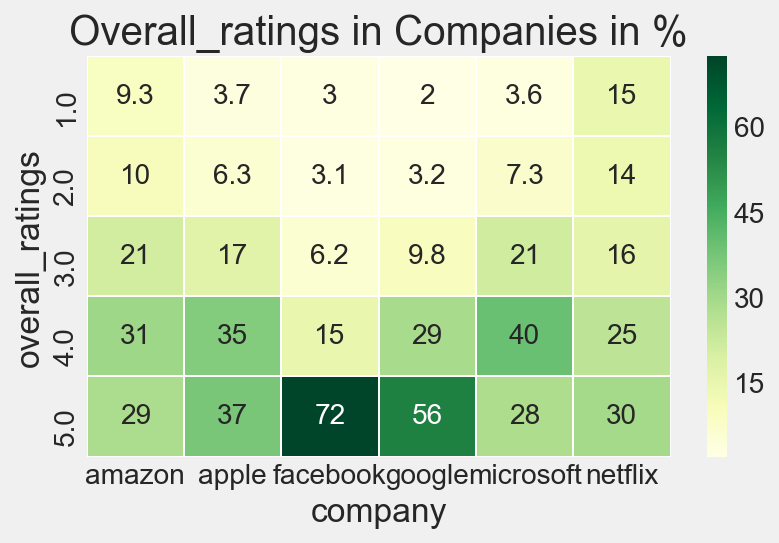

In [140]:
plot_heatmap('overall_ratings','company', 'Overall_ratings in Companies in %' )

### Overall ratings in companies
#### conclusion:
Assuming 4 and above to be very good rating, and less than 4 to be not so good, some observations from the above plot are:
72% people in FB have rated it 5 and overall 87% people are very happy working in FB. 
This is followed by 
Gogle with 85%

NetFlix has got a 55-45% which means people have neutral say about the company

60% people are happy with Amazon

72% people are happy with Apple

68% people are happy with Microsoft

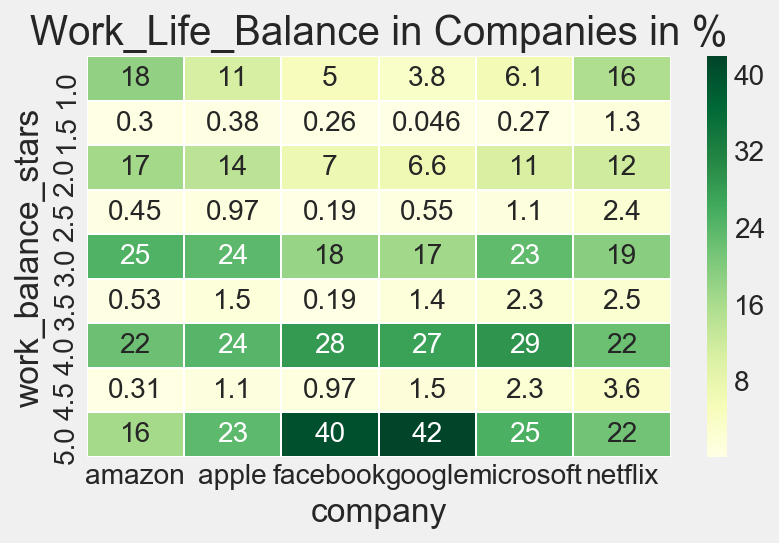

In [141]:
plot_heatmap('work_balance_stars','company', 'Work_Life_Balance in Companies in %' )

### Work_ Life balance in companies
#### conclusion:
Assuming 4 and above to be very good rating, and less than 4 to be not so good, some observations from the above plot are for Work/Life Balance

38.31% people in amazon have a W/L balance

48.1% apple

68.97% FB

70.5% Google

56.3% Microsoft

47.6% Netflix

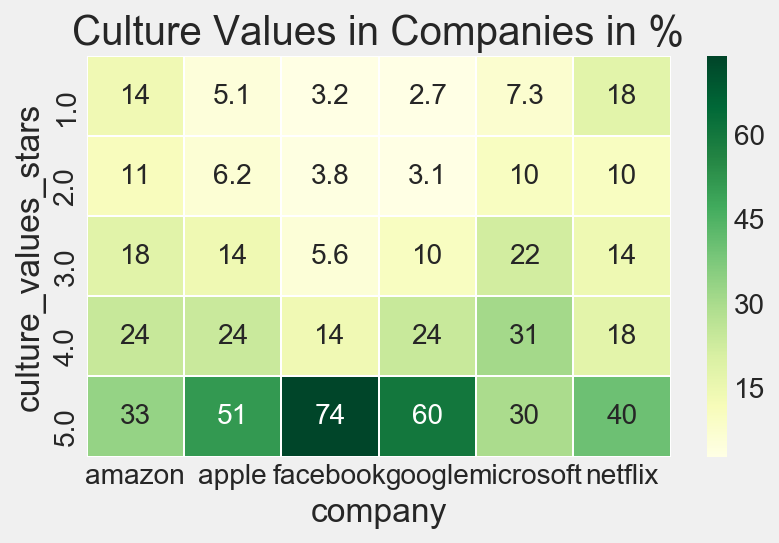

In [142]:
plot_heatmap('culture_values_stars','company', 'Culture Values in Companies in %' )


### cultural values in companies,
#### conclusion
Facebook leads with 88%
Amazon 57%

Apple 75%

Google 84%

Microsoft 61%

Netflix 58%

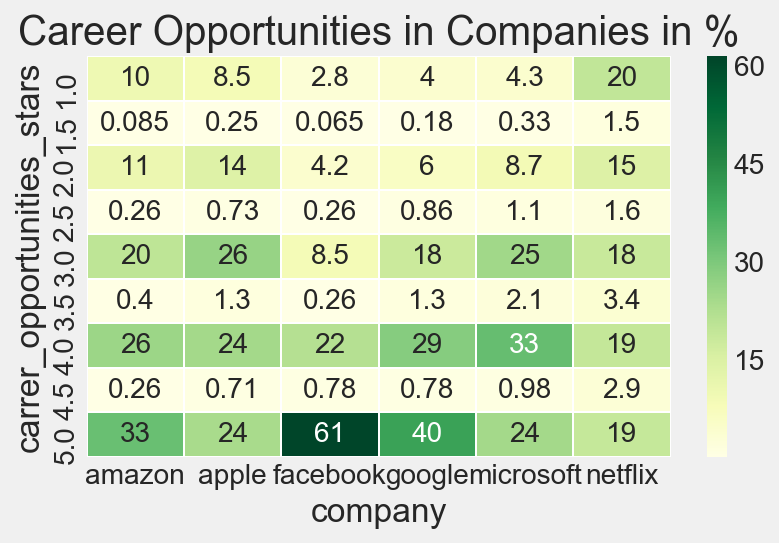

In [143]:
plot_heatmap('carrer_opportunities_stars','company', 'Career Opportunities in Companies in %' )

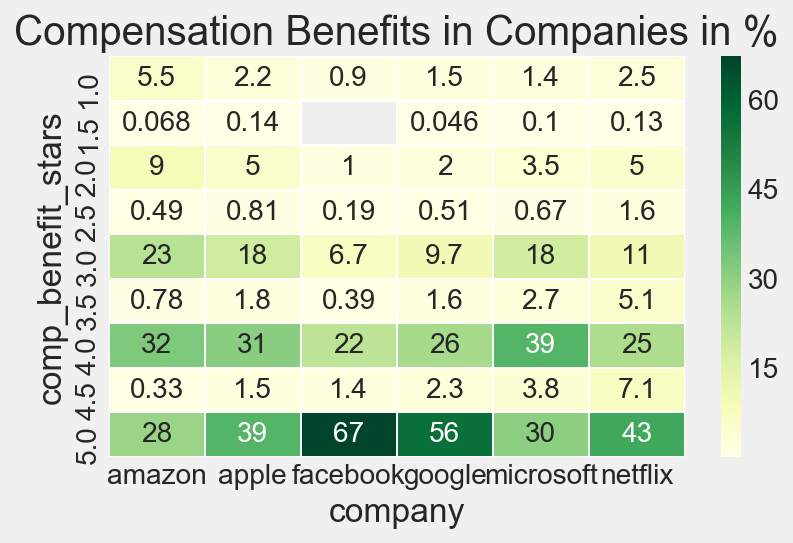

In [144]:
plot_heatmap('comp_benefit_stars','company', 'Compensation Benefits in Companies in %' )


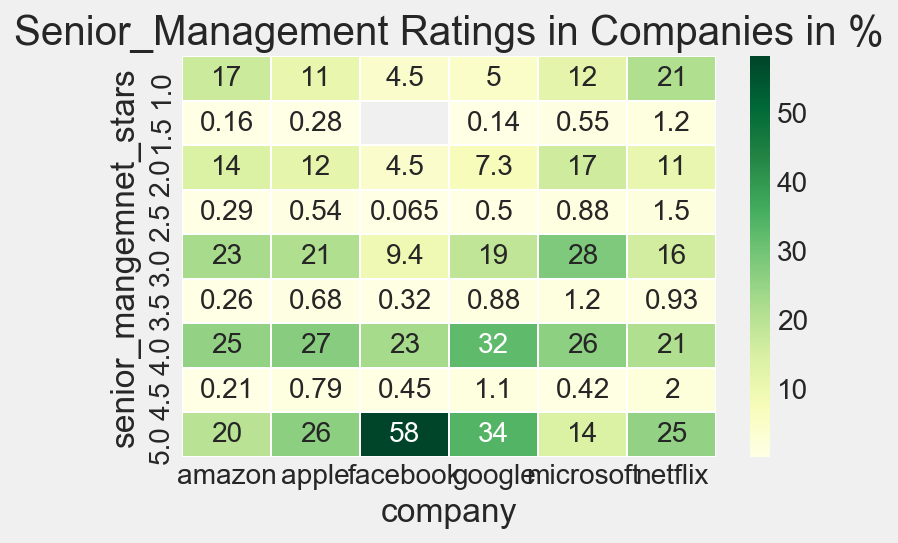

In [145]:
plot_heatmap('senior_mangemnet_stars','company', 'Senior_Management Ratings in Companies in %' )

## WORDCLOUD

### Wordclod for the summary 

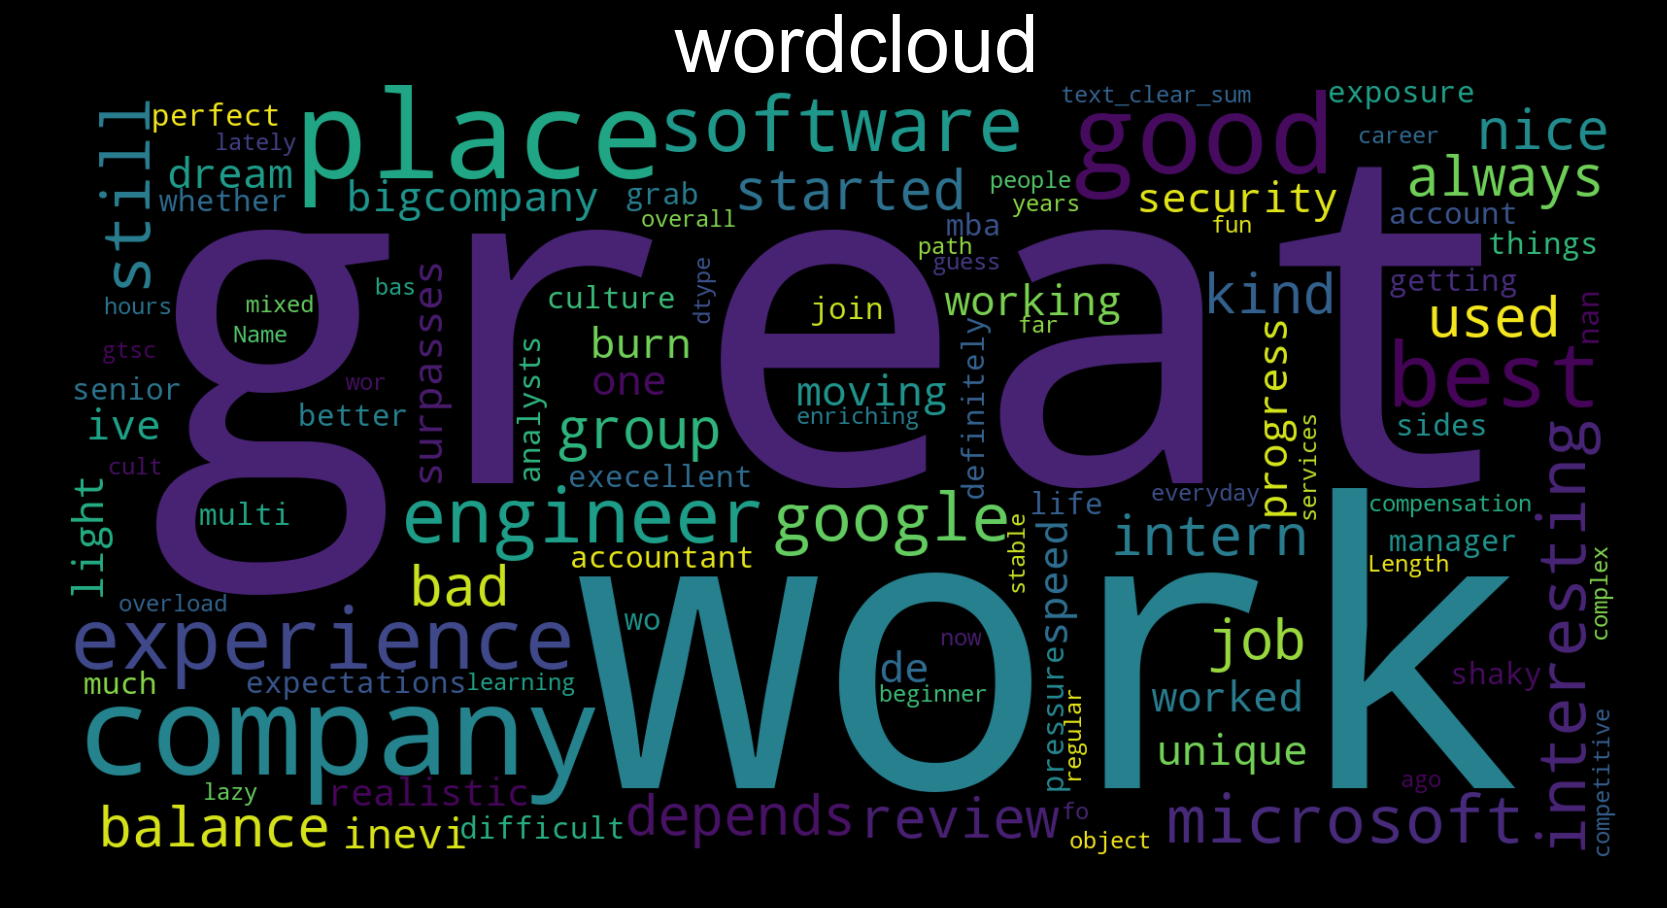

In [133]:
# difine wordcloud function from wordcloud library. set some parameteres for beatuful plotting
wc = WordCloud(width=1600, height=800, random_state=1, max_words=200000000)
# generate word cloud using df_yelp_tip_top['text_clear']
wc.generate(str(df['text_clear_sum']))
# declare our figure 
plt.figure(figsize=(20,10), facecolor='k')
# add title to the graph
plt.title(" wordcloud", fontsize=40,color='white')
plt.imshow(wc, interpolation='bilinear')
plt.axis('off')
plt.tight_layout(pad=10)
# after lot of congiguration finally plot the graph
plt.show()

### Wordclod for the pros 

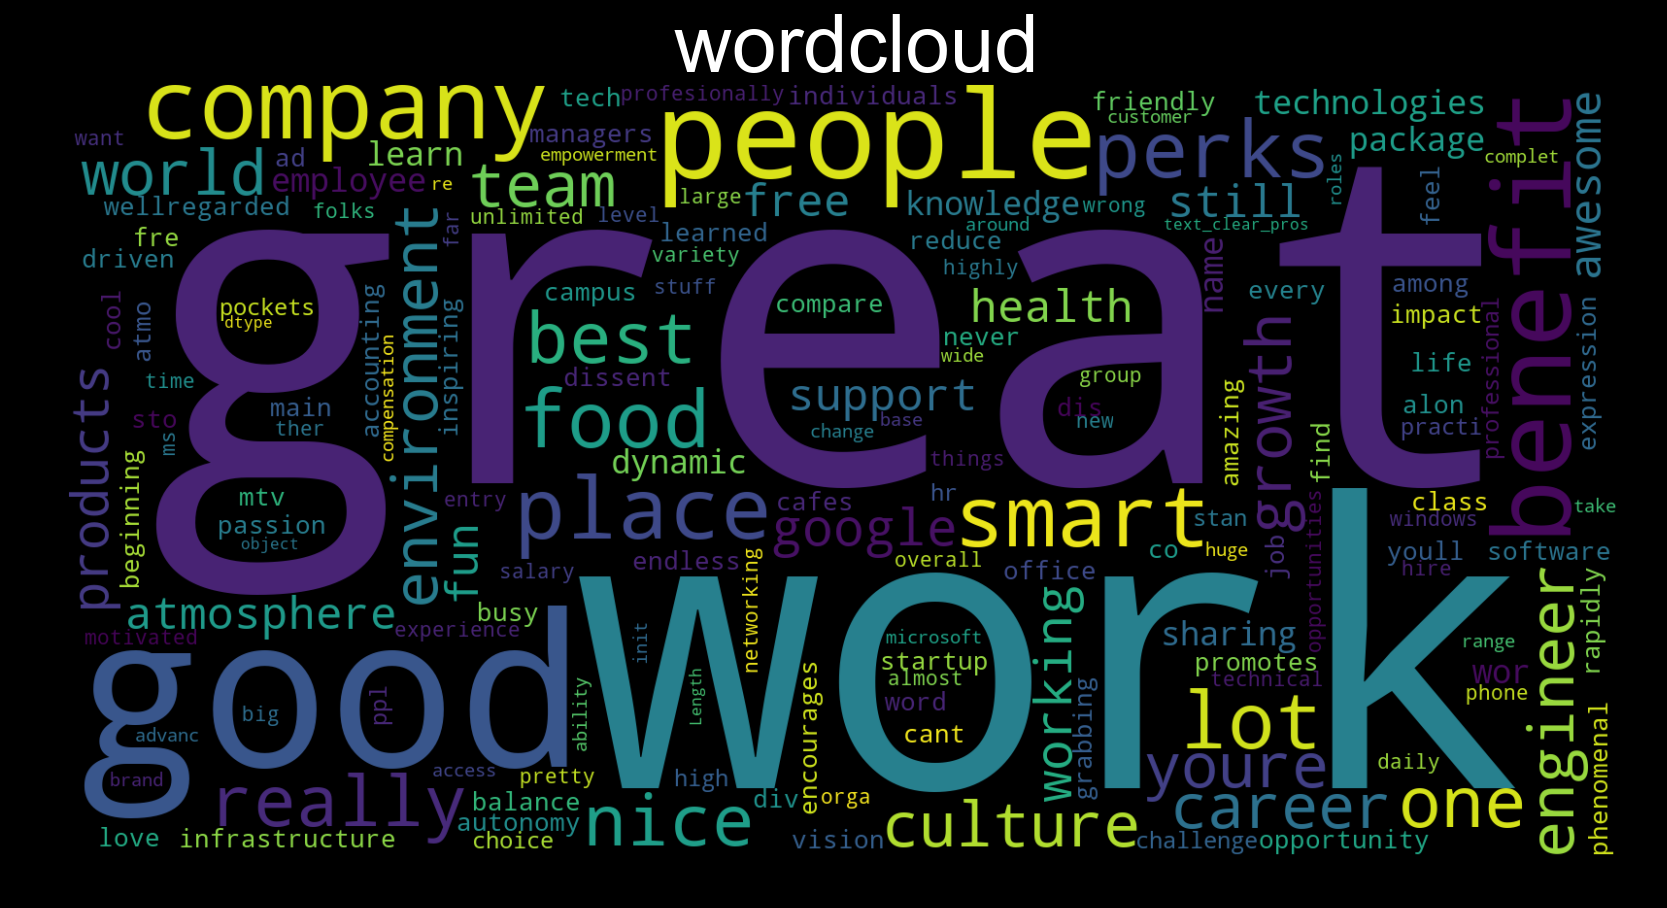

In [134]:
# difine wordcloud function from wordcloud library. set some parameteres for beatuful plotting
wc = WordCloud(width=1600, height=800, random_state=1, max_words=200000000)
# generate word cloud using df_yelp_tip_top['text_clear']
wc.generate(str(df['text_clear_pros']))
# declare our figure 
plt.figure(figsize=(20,10), facecolor='k')
# add title to the graph
plt.title(" wordcloud", fontsize=40,color='white')
plt.imshow(wc, interpolation='bilinear')
plt.axis('off')
plt.tight_layout(pad=10)
# after lot of congiguration finally plot the graph
plt.show()

### Wordclod for the cons 

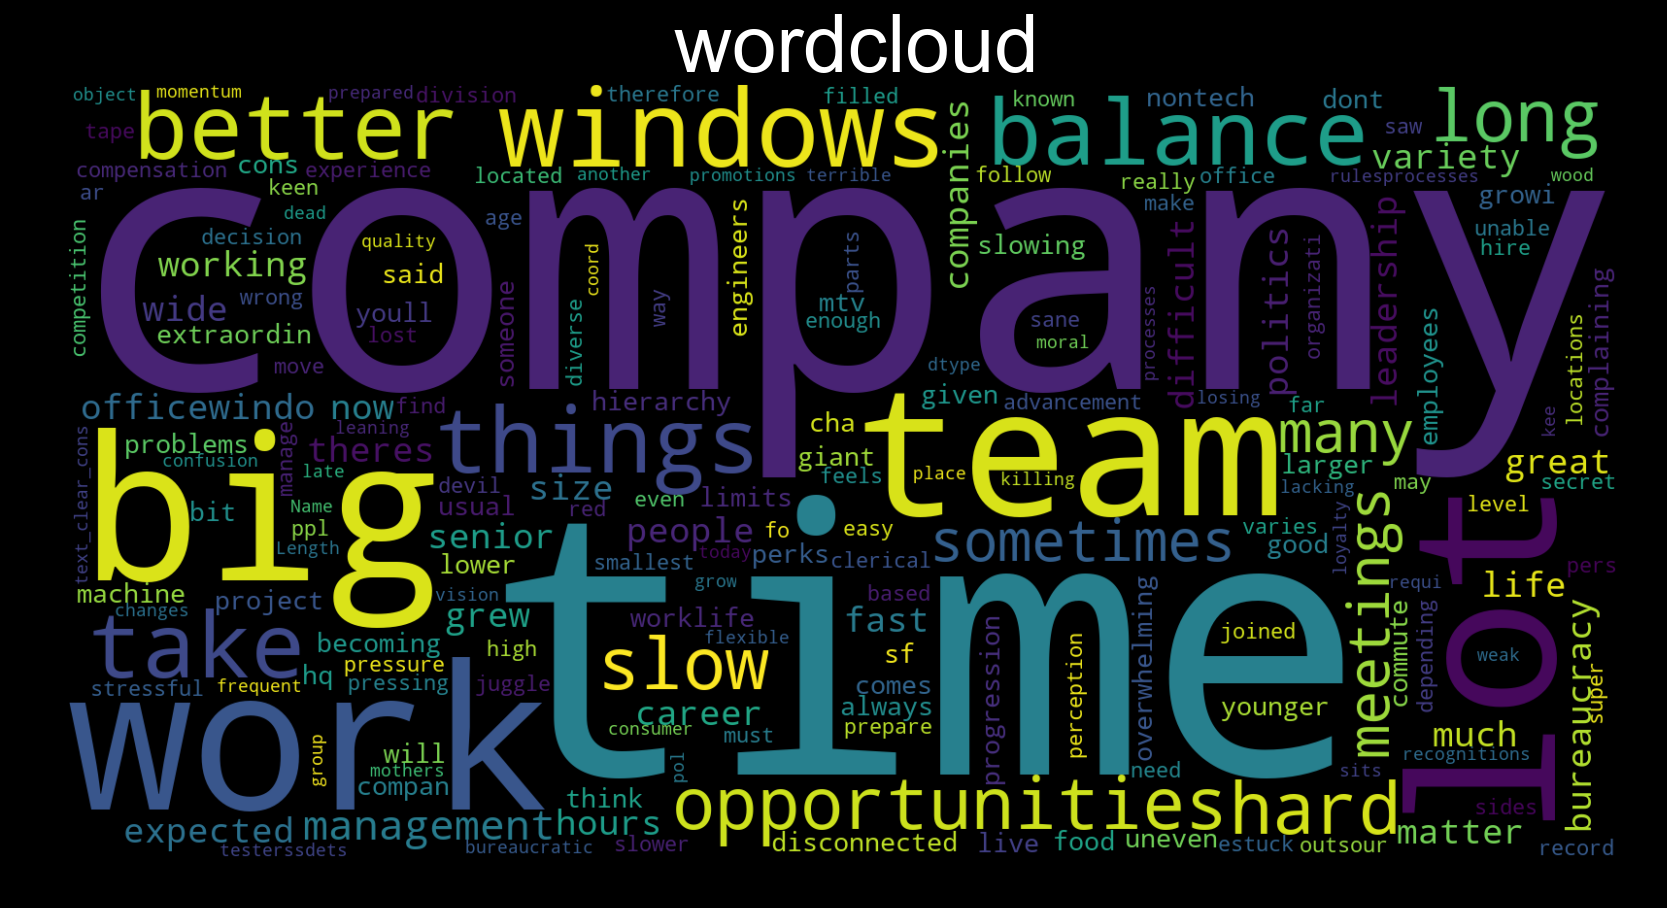

In [135]:
# difine wordcloud function from wordcloud library. set some parameteres for beatuful plotting
wc = WordCloud(width=1600, height=800, random_state=1, max_words=200000000)
# generate word cloud using df_yelp_tip_top['text_clear']
wc.generate(str(df['text_clear_cons']))
# declare our figure 
plt.figure(figsize=(20,10), facecolor='k')
# add title to the graph
plt.title(" wordcloud", fontsize=40,color='white')
plt.imshow(wc, interpolation='bilinear')
plt.axis('off')
plt.tight_layout(pad=10)
# after lot of congiguration finally plot the graph
plt.show()

### Wordclod for the advice 

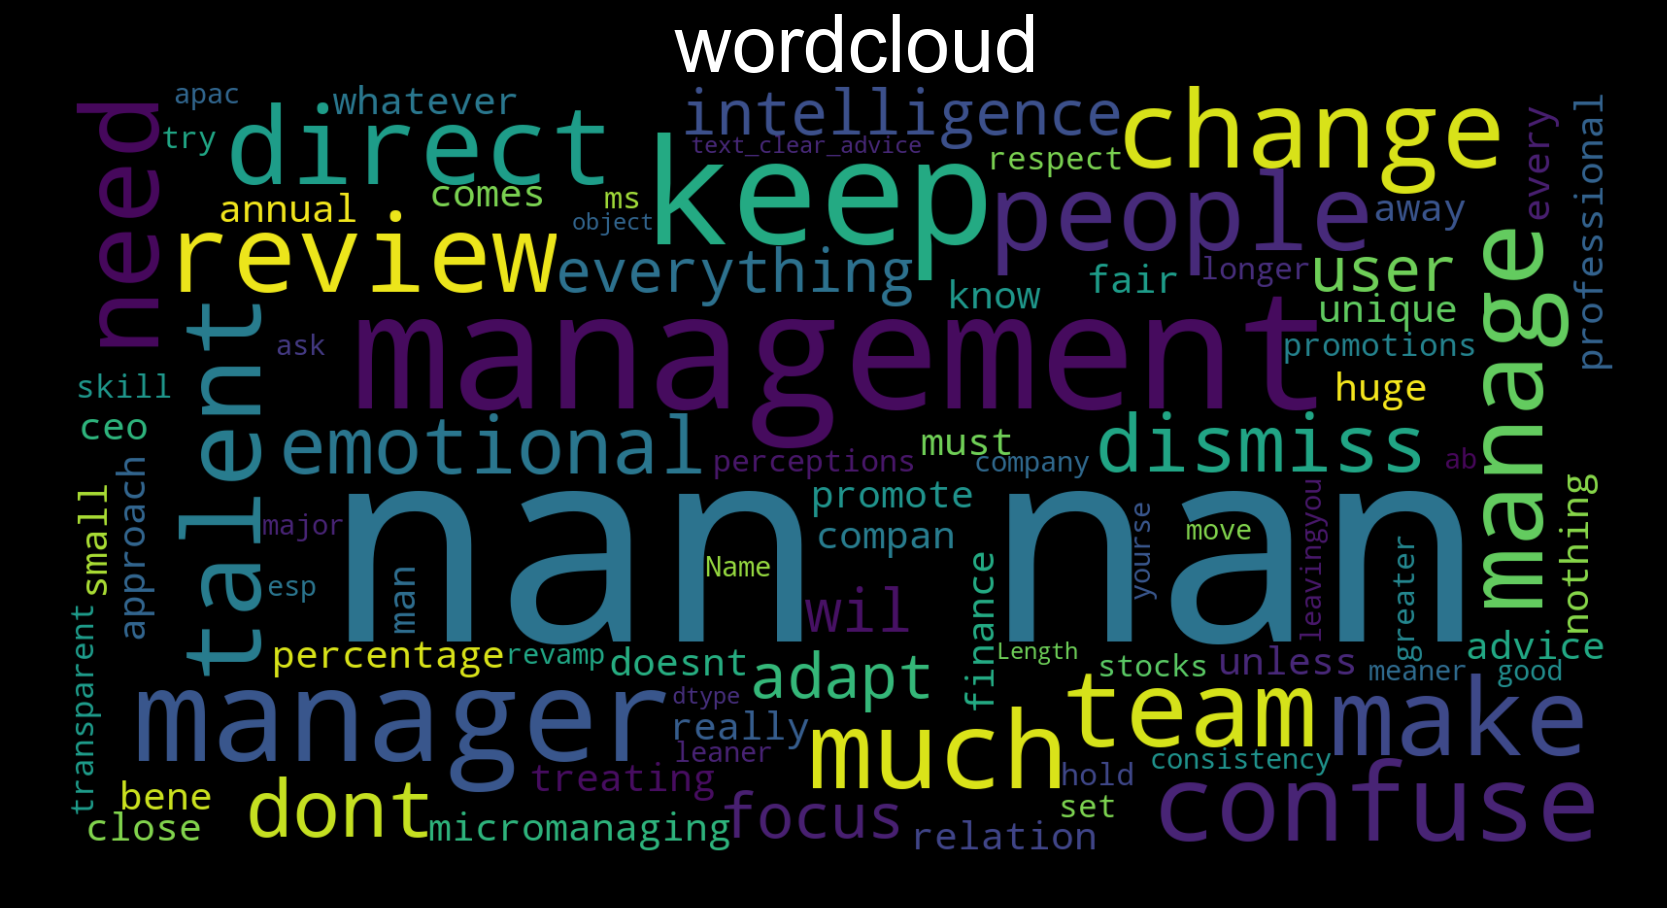

In [136]:
# difine wordcloud function from wordcloud library. set some parameteres for beatuful plotting
wc = WordCloud(width=1600, height=800, random_state=1, max_words=200000000)
# generate word cloud using df_yelp_tip_top['text_clear']
wc.generate(str(df['text_clear_advice']))
# declare our figure 
plt.figure(figsize=(20,10), facecolor='k')
# add title to the graph
plt.title(" wordcloud", fontsize=40,color='white')
plt.imshow(wc, interpolation='bilinear')
plt.axis('off')
plt.tight_layout(pad=10)
# after lot of congiguration finally plot the graph
plt.show()